<a href="https://colab.research.google.com/github/aadityasikder/Neural-Network-from-Scratch-/blob/main/Neural_network_from_Scratch(only_Numpy).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Neural Network from Scratch

In this notebook, I implemented a neural network with only using Numpy without using libraries like Tensorflow and Pytorch.

The neural network have input layer with 784 neurons. Then, two hidden layers with 132 and 40 neurons respectively. Lastly, output neuron of 10 neurons.

Sigmoid function was used as activation function for each neuron.

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
#!pip install kaggle


In [ ]:
#!mkdir ~/.kaggle
#!cp kaggle.json ~/.kaggle/

#!chmod 600 ~/.kaggle/kaggle.json
#!kaggle datasets download -d zalando-research/fashionmnist
#!unzip fashionmnist.zip

In [ ]:
df = pd.read_csv('/content/sample_data/mnist_train_small.csv')

#Data Visualization of Train Data

In [ ]:
df

6  0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  ...  0.581  0.582  0.583  \
0      5  0    0    0    0    0    0    0    0    0  ...      0      0      0   
1      7  0    0    0    0    0    0    0    0    0  ...      0      0      0   
2      9  0    0    0    0    0    0    0    0    0  ...      0      0      0   
3      5  0    0    0    0    0    0    0    0    0  ...      0      0      0   
4      2  0    0    0    0    0    0    0    0    0  ...      0      0      0   
...   .. ..  ...  ...  ...  ...  ...  ...  ...  ...  ...    ...    ...    ...   
19994  0  0    0    0    0    0    0    0    0    0  ...      0      0      0   
19995  1  0    0    0    0    0    0    0    0    0  ...      0      0      0   
19996  2  0    0    0    0    0    0    0    0    0  ...      0      0      0   
19997  9  0    0    0    0    0    0    0    0    0  ...      0      0      0   
19998  5  0    0    0    0    0    0    0    0    0  ...      0      0      0   

       0.584  0.585  0.586  0.587  0.588  0.589  0.590  
0          0      0      0      0      0      0      0  
1          0      0      0      0      0      0      0  
2          0      0      0      0      0      0      0  
3          0      0      0      0      0      0      0  
4          0      0      0      0      0      0      0  
...      ...    ...    ...    ...    ...    ...    ...  
19994      0      0      0      0      0      0      0  
19995      0      0      0      0      0      0      0  
19996      0      0      0      0      0      0      0  
19997      0      0      0      0      0      0      0  
19998      0      0      0      0      0      0      0  

[19999 rows x 785 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19999 entries, 0 to 19998
Columns: 785 entries, 6 to 0.590
dtypes: int64(785)
memory usage: 119.8 MB


In [ ]:
selected_num= df.iloc[0]

In [ ]:
image = np.array(selected_num[1:]).reshape(28, 28)

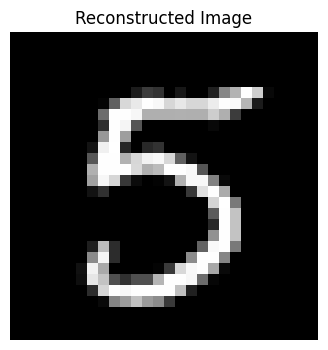

In [ ]:
plt.figure(figsize=(4, 4))
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.title('Reconstructed Image')
plt.show()

# Building The Neural Network and Training

-This part is first randomly initializing the weights and bias of the neural network where weights are set between -0.5 to 0.5 and bias is set as 1.

-Sigmoid function code section is also made which acts as activition function

-learning rate is set as 0.01 (can be adjusted)

-epocs rate is also set

-gives train accuracy




### Forward Propagation:

1. **Sigmoid Activation Function**:
   - **Formula**: $ \sigma(z) = \frac{1}{1 + e^{-z}} $
   - The sigmoid function squashes the input into the range (0, 1), which is useful for modeling probabilities or binary classification.

2. **Forward Pass**:
   - For each layer \( l \), compute the weighted sum of inputs \( z^l \) and apply the activation function \( \sigma \) to get the output \( h^l \).
   - **Formula**:
     
     $ z^l = w^l \cdot h^{l-1} + b^l $
     
     $ h^l = \sigma(z^l) $

### Backpropagation:

1. **Derivative of Sigmoid Function**:
   - **Formula**: $ \sigma'(z) = \sigma(z) \cdot (1 - \sigma(z)) $
   - The derivative of the sigmoid function is used in backpropagation to compute gradients.

2. **Error Calculation**:
   - Compute the error between the predicted output \( h^L \) and the true output \( y \) at the output layer.
   - **Formula**:
     $ \delta^L = h^L - y $

3. **Backward Pass**:
   - Propagate the error backward through the layers to compute the gradients of the cost function with respect to weights and biases.
   - **Formulas**:
     $ \delta^l = ((w^{l+1})^T \cdot \delta^{l+1}) \odot \sigma'(z^l) $
     $ \frac{\partial C}{\partial w^l} = \delta^l \cdot (h^{l-1})^T $
     $ \frac{\partial C}{\partial b^l} = \delta^l $

4. **Weight and Bias Update**:
   - Update weights and biases using gradient descent or its variants.
   - **Formulas**:
     $ w^l = w^l - \eta \frac{\partial C}{\partial w^l} $
     $ b^l = b^l - \eta \frac{\partial C}{\partial b^l} $
   - Where $ \eta $ is the learning rate.

### Description:

This code implements a neural network with three hidden layers to recognize handwritten digits. It follows the standard procedure of forward propagation to compute predictions and backward propagation to update weights and biases. The network uses the sigmoid activation function for each neuron and the mean squared error as the loss function. The training process involves iteratively adjusting the weights and biases to minimize the error between predicted and actual outputs. The accuracy of the model is calculated after each epoch to monitor its performance.

In [34]:
#weights and bias for first hidden layer with 132 neurons
w1 = np.random.uniform(-0.5, 0.5, (132, 784))
b1 = np.zeros((132, 1))

In [35]:
#weights and bias for second hidden layer with 40 neurons
w2 = np.random.uniform(-0.5, 0.5, (40, 132))
b2 = np.zeros((40, 1))

In [36]:
#weights and bias for output layer
w3= np.random.uniform(-0.5,0.5,(10,40))
b3=np.zeros((10,1))

In [37]:
#sigmoid activation function
def sigmoid(z):
  return (1/(1+np.exp(-z)))

In [38]:
learning_rate=0.01

In [39]:
epochs=6

In [40]:
for __ in range(epochs):
  count=0
  for i in range (19999):
    select_row = df.iloc[i]


    y=np.zeros((10, 1))
    y[select_row[0]]=1 #making the wanted output matrix y

    x1= (select_row.drop(select_row.index[0]))/255 #x is the value input(divided with 255 to have better calculation with sigmoid)
    x_1=x1.values
    x=x_1.reshape((784, 1)) # converting vector to matrix form (also considered as input layer)

    #forwardpropagation
    z1=w1@x + b1
    h1=sigmoid(z1)

    z2=w2@h1 + b2
    h2=sigmoid(z2)

    z3=w3@h2 + b3
    h3=sigmoid(z3)

    if np.argmax(h3) == np.argmax(y):
      count=count+1

    #Backpropagation

    #updating output layer weights
    del_3=h3-y
    w3+=-learning_rate*del_3 @ np.transpose(h2)
    b3+= -learning_rate * del_3

    #updating second hidden layer weights
    del_2=np.transpose(w3) @ del_3 * (h2 * (1-h2)) # h2 * (1-h2) - derivation of sigmoid activation function
    w2 += -learning_rate * del_2 @ np.transpose(h1)
    b2 += -learning_rate * del_2

    #updating first hidden layer weights
    del_1=np.transpose(w2) @ del_2 * (h1 * (1-h1))
    w1 += -learning_rate * del_1 @ np.transpose(x)
    b1 += -learning_rate * del_1

#train accuracy each epoch
  accuracy= (count/19999)*100
  print('Train Accuracy: ',accuracy)

Train Accuracy:  77.81889094454722
Train Accuracy:  91.01455072753637
Train Accuracy:  93.23466173308665
Train Accuracy:  94.53472673633682
Train Accuracy:  95.49477473873694
Train Accuracy:  96.06480324016201


# Test data

In [41]:
test=pd.read_csv('/content/sample_data/mnist_test.csv')

In [42]:
test

7  0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  ...  0.658  0.659  0.660  \
0     2  0    0    0    0    0    0    0    0    0  ...      0      0      0   
1     1  0    0    0    0    0    0    0    0    0  ...      0      0      0   
2     0  0    0    0    0    0    0    0    0    0  ...      0      0      0   
3     4  0    0    0    0    0    0    0    0    0  ...      0      0      0   
4     1  0    0    0    0    0    0    0    0    0  ...      0      0      0   
...  .. ..  ...  ...  ...  ...  ...  ...  ...  ...  ...    ...    ...    ...   
9994  2  0    0    0    0    0    0    0    0    0  ...      0      0      0   
9995  3  0    0    0    0    0    0    0    0    0  ...      0      0      0   
9996  4  0    0    0    0    0    0    0    0    0  ...      0      0      0   
9997  5  0    0    0    0    0    0    0    0    0  ...      0      0      0   
9998  6  0    0    0    0    0    0    0    0    0  ...      0      0      0   

      0.661  0.662  0.663  0.664  0.665  0.666  0.667  
0         0      0      0      0      0      0      0  
1         0      0      0      0      0      0      0  
2         0      0      0      0      0      0      0  
3         0      0      0      0      0      0      0  
4         0      0      0      0      0      0      0  
...     ...    ...    ...    ...    ...    ...    ...  
9994      0      0      0      0      0      0      0  
9995      0      0      0      0      0      0      0  
9996      0      0      0      0      0      0      0  
9997      0      0      0      0      0      0      0  
9998      0      0      0      0      0      0      0  

[9999 rows x 785 columns]

Testing with updated weights and biases

Test accuracy

In [43]:
count=0
a=[]
real_out=[]
predicted_out=[]
for i in range (9999):
    select_row = test.iloc[i]


    y=np.zeros((10, 1))
    y[select_row[0]]=1

    x1= (select_row.drop(select_row.index[0]))/255
    x_1=x1.values
    x=x_1.reshape((784, 1))

    #forwardpropagation
    z1=w1@x + b1
    h1=sigmoid(z1)

    z2=w2@h1 + b2
    h2=sigmoid(z2)

    z3=w3@h2 + b3
    h3=sigmoid(z3)

    if np.argmax(h3) == np.argmax(y):
      count=count+1
    else:
      a.append(i)
      real_out.append(np.argmax(y))
      predicted_out.append(np.argmax(h3))

#test accuracy each epoch
accuracy= (count/9999)*100
print('Test accuracy:', accuracy)

Test accuracy: 95.08950895089508


Images that the neural network failed to detect-

Expected Output   : 5
Predicted Output : 6


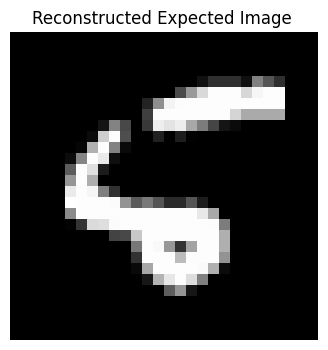

Expected Output   : 7
Predicted Output : 4


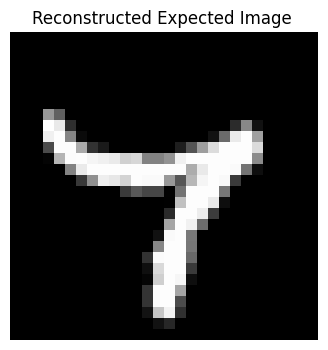

Expected Output   : 2
Predicted Output : 9


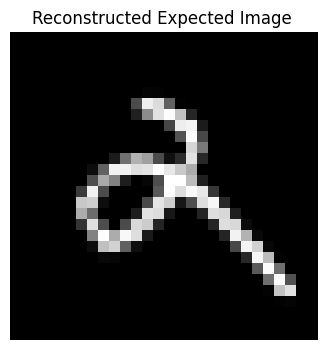

Expected Output   : 3
Predicted Output : 2


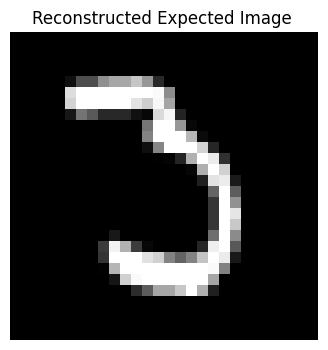

Expected Output   : 3
Predicted Output : 5


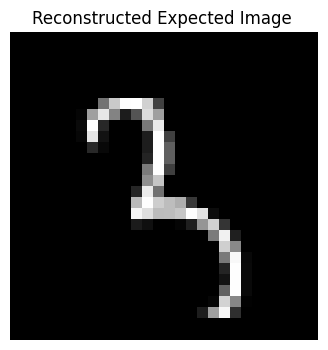

Expected Output   : 6
Predicted Output : 5


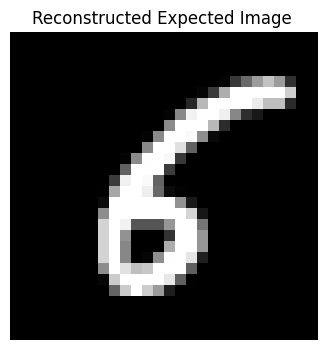

Expected Output   : 8
Predicted Output : 7


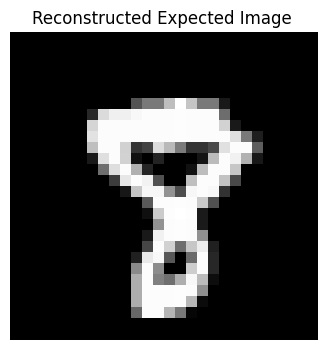

Expected Output   : 9
Predicted Output : 8


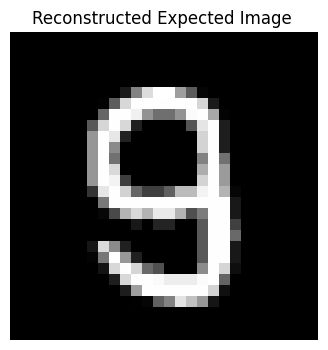

Expected Output   : 3
Predicted Output : 5


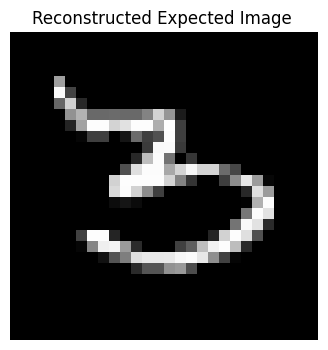

Expected Output   : 4
Predicted Output : 2


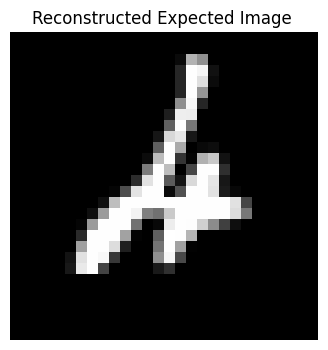

Expected Output   : 6
Predicted Output : 0


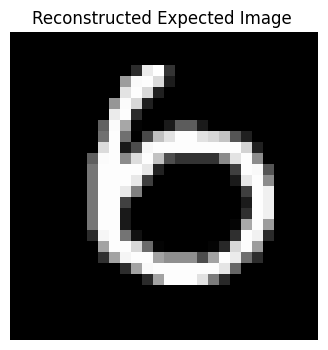

Expected Output   : 3
Predicted Output : 5


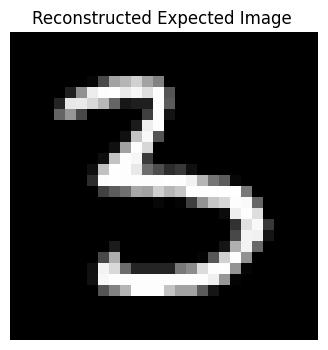

Expected Output   : 2
Predicted Output : 7


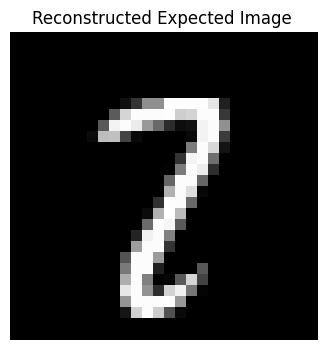

Expected Output   : 5
Predicted Output : 3


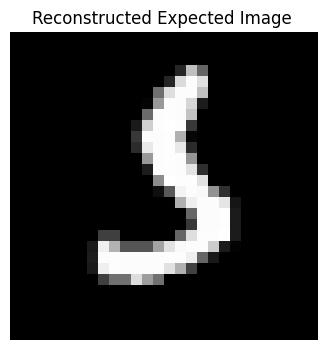

Expected Output   : 5
Predicted Output : 0


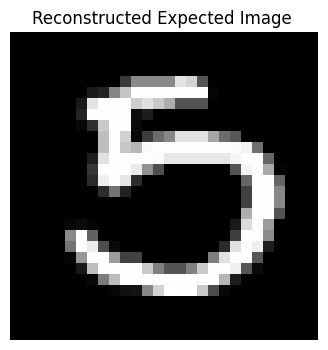

Expected Output   : 2
Predicted Output : 7


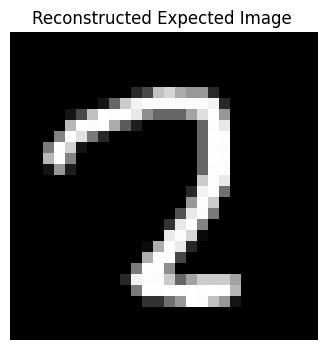

Expected Output   : 3
Predicted Output : 7


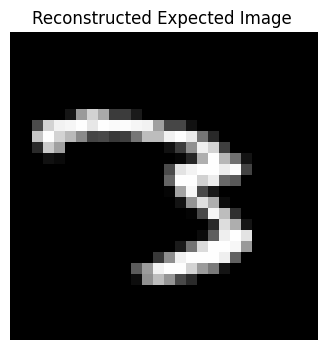

Expected Output   : 6
Predicted Output : 0


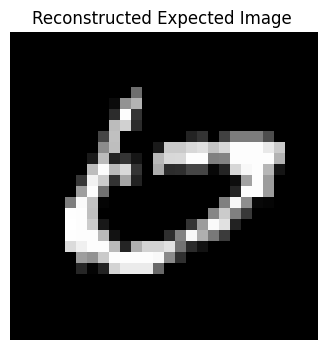

Expected Output   : 4
Predicted Output : 9


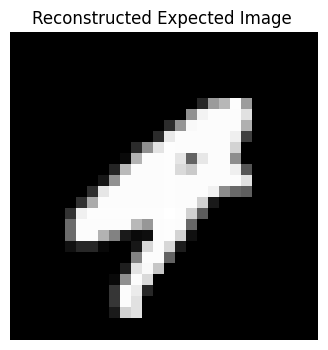

Expected Output   : 3
Predicted Output : 5


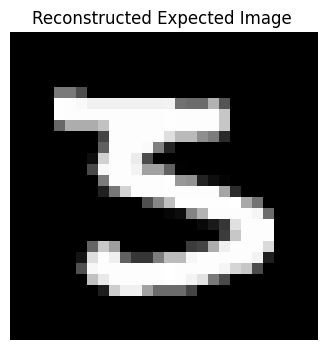

Expected Output   : 5
Predicted Output : 8


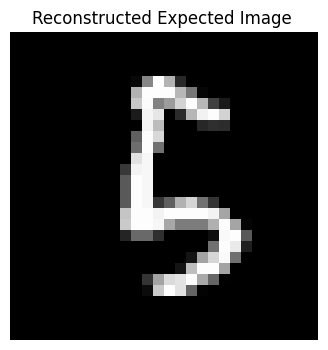

Expected Output   : 8
Predicted Output : 0


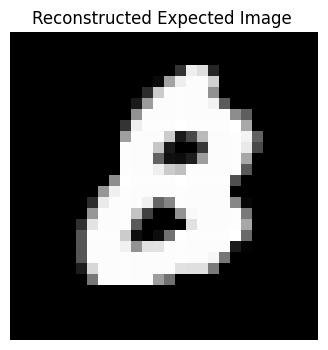

Expected Output   : 3
Predicted Output : 5


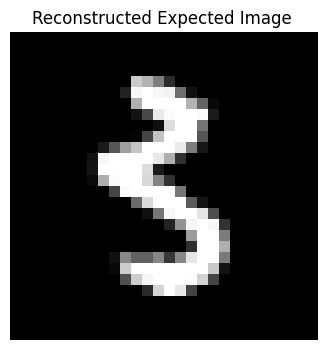

Expected Output   : 4
Predicted Output : 8


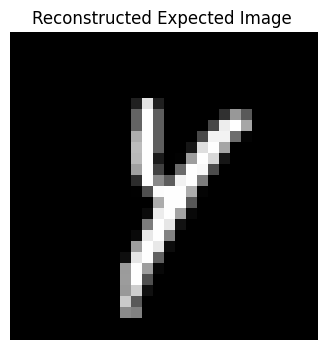

Expected Output   : 6
Predicted Output : 2


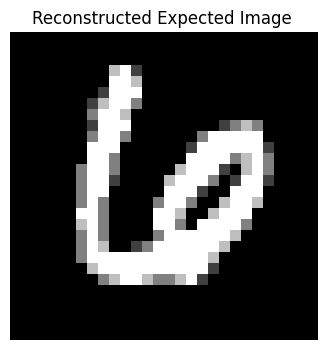

Expected Output   : 8
Predicted Output : 4


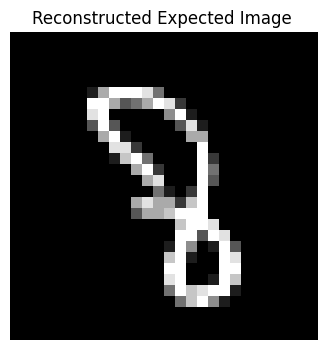

Expected Output   : 7
Predicted Output : 1


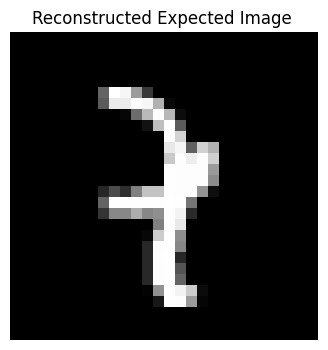

Expected Output   : 4
Predicted Output : 9


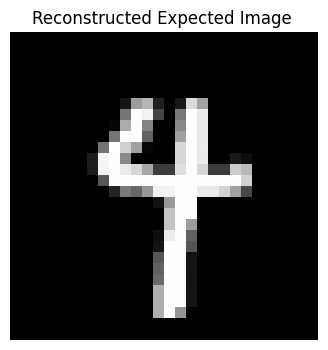

Expected Output   : 3
Predicted Output : 2


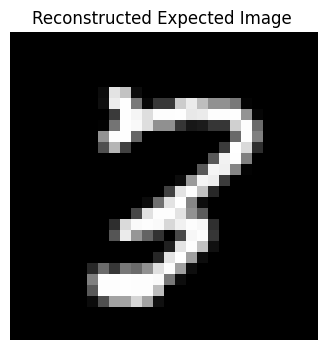

Expected Output   : 8
Predicted Output : 2


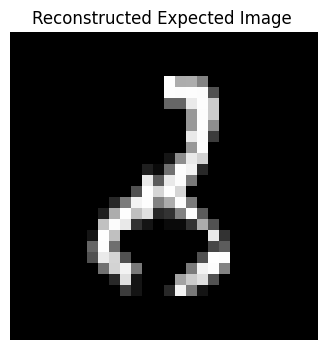

Expected Output   : 8
Predicted Output : 3


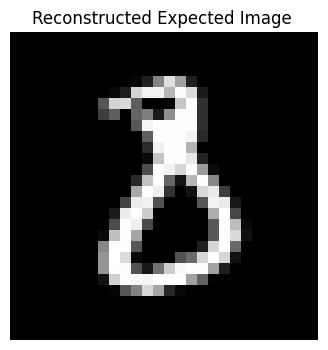

Expected Output   : 1
Predicted Output : 8


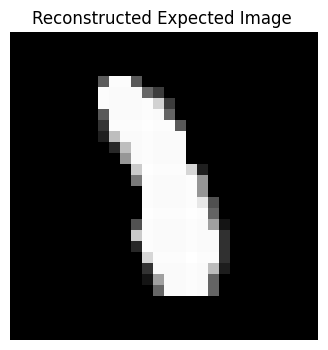

Expected Output   : 2
Predicted Output : 8


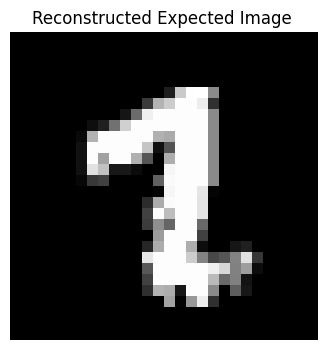

Expected Output   : 8
Predicted Output : 4


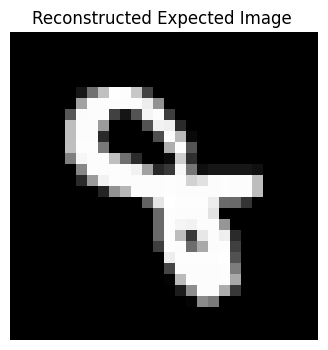

Expected Output   : 4
Predicted Output : 9


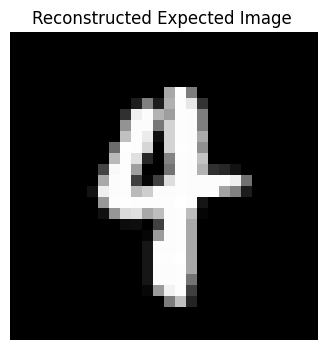

Expected Output   : 0
Predicted Output : 6


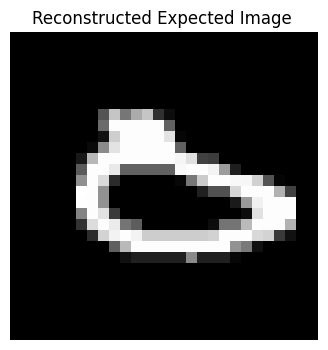

Expected Output   : 5
Predicted Output : 8


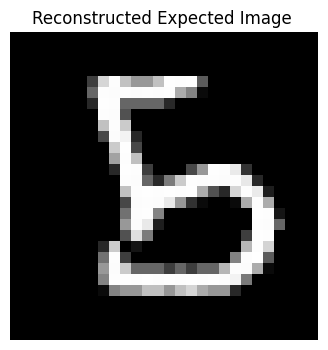

Expected Output   : 4
Predicted Output : 9


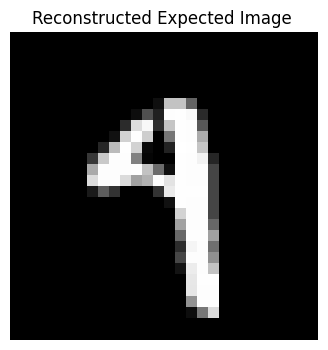

Expected Output   : 4
Predicted Output : 9


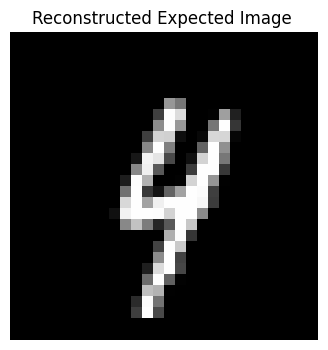

Expected Output   : 8
Predicted Output : 7


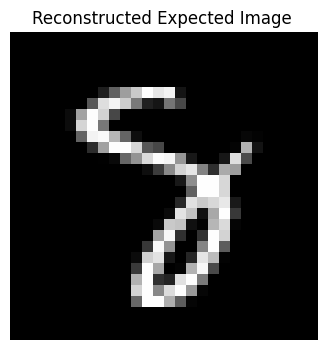

Expected Output   : 4
Predicted Output : 9


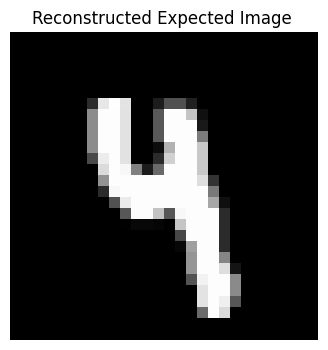

Expected Output   : 3
Predicted Output : 5


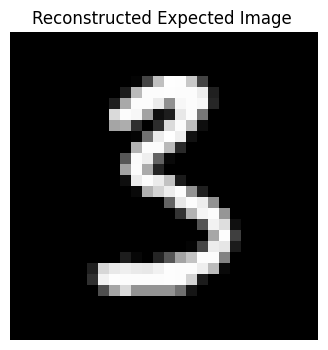

Expected Output   : 1
Predicted Output : 3


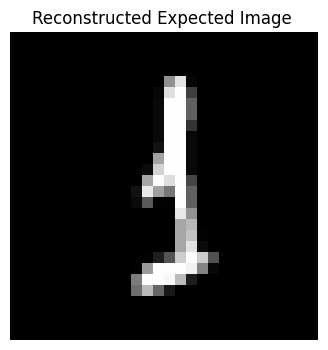

Expected Output   : 2
Predicted Output : 7


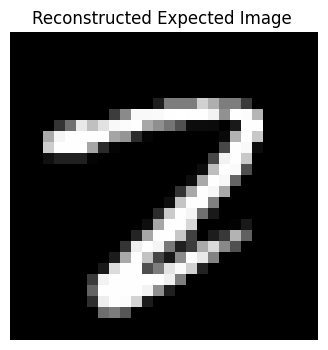

Expected Output   : 3
Predicted Output : 5


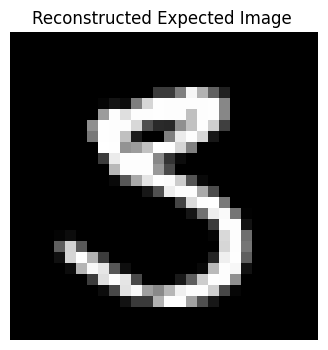

Expected Output   : 8
Predicted Output : 9


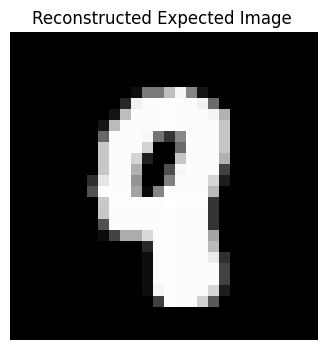

Expected Output   : 7
Predicted Output : 2


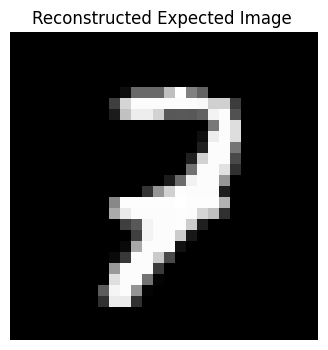

Expected Output   : 5
Predicted Output : 4


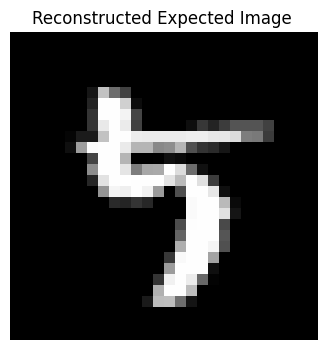

Expected Output   : 1
Predicted Output : 2


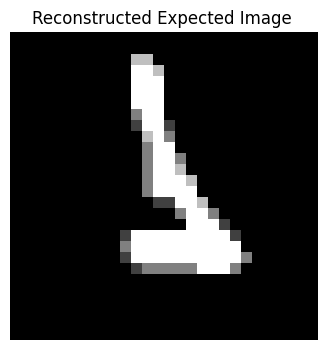

Expected Output   : 4
Predicted Output : 9


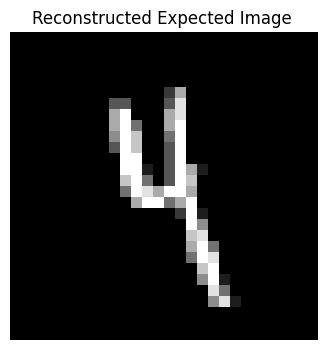

Expected Output   : 6
Predicted Output : 0


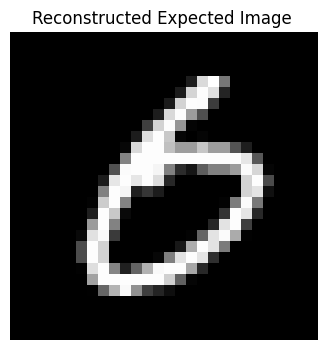

Expected Output   : 3
Predicted Output : 2


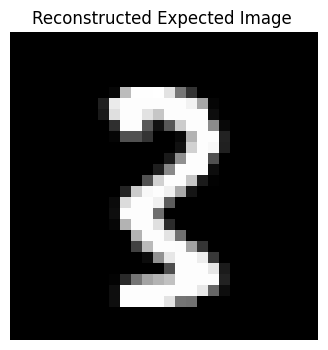

Expected Output   : 5
Predicted Output : 3


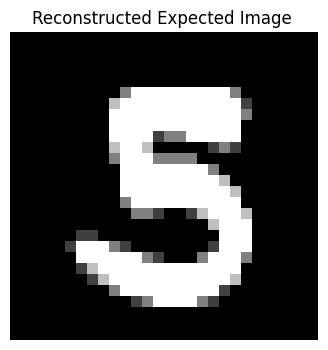

Expected Output   : 6
Predicted Output : 5


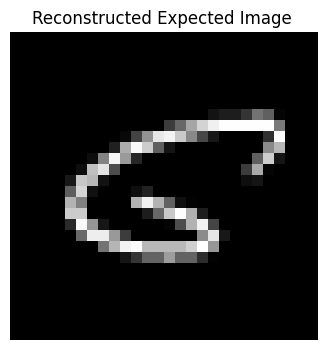

Expected Output   : 5
Predicted Output : 8


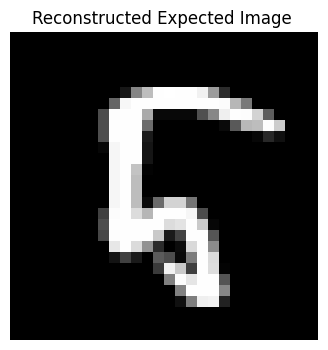

Expected Output   : 7
Predicted Output : 1


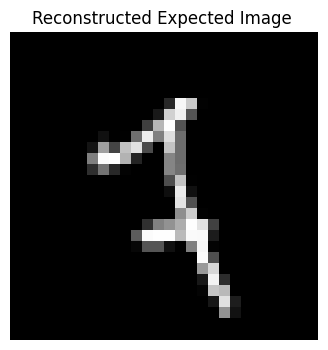

Expected Output   : 6
Predicted Output : 2


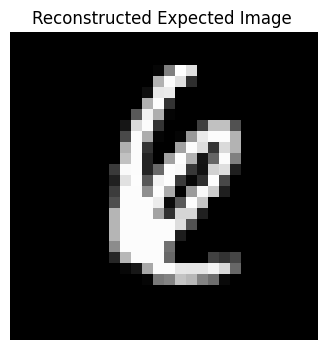

Expected Output   : 3
Predicted Output : 7


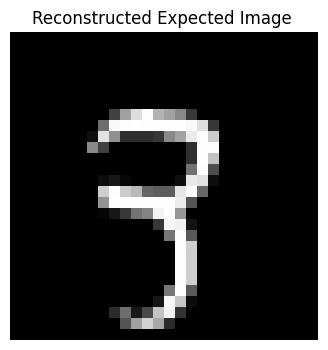

Expected Output   : 8
Predicted Output : 4


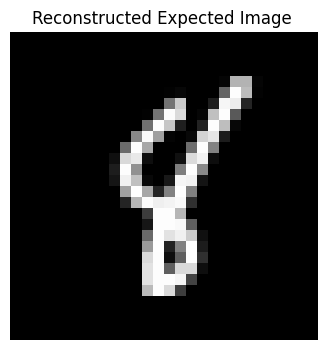

Expected Output   : 4
Predicted Output : 6


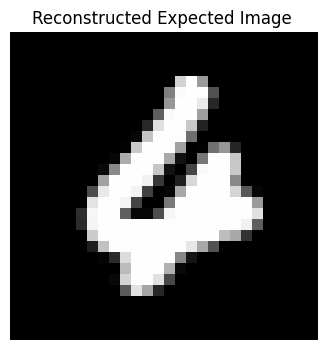

Expected Output   : 3
Predicted Output : 8


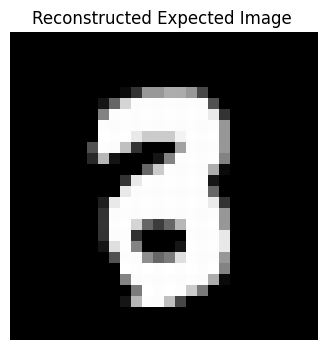

Expected Output   : 8
Predicted Output : 7


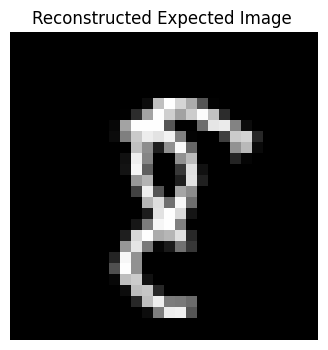

Expected Output   : 8
Predicted Output : 9


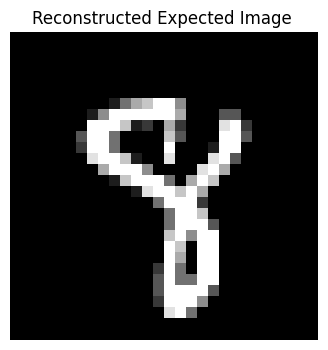

Expected Output   : 4
Predicted Output : 9


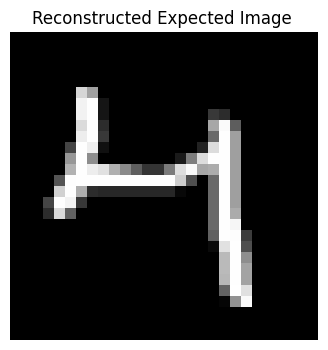

Expected Output   : 6
Predicted Output : 1


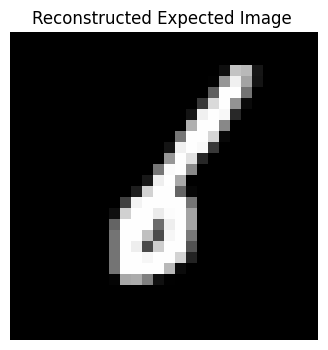

Expected Output   : 0
Predicted Output : 7


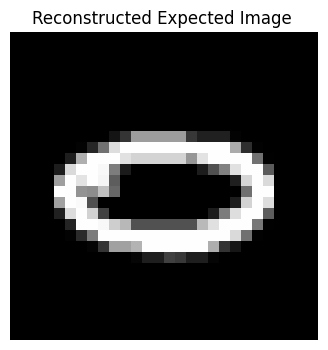

Expected Output   : 9
Predicted Output : 4


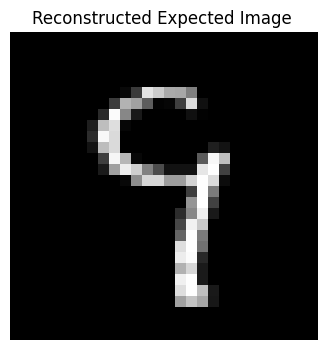

Expected Output   : 8
Predicted Output : 4


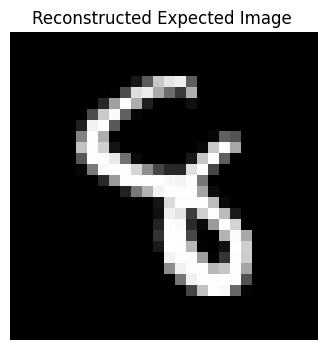

Expected Output   : 3
Predicted Output : 7


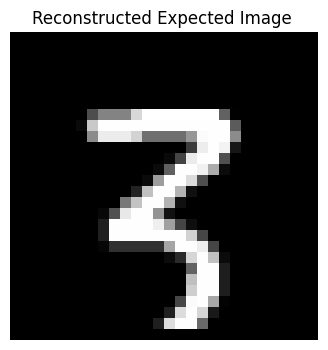

Expected Output   : 7
Predicted Output : 2


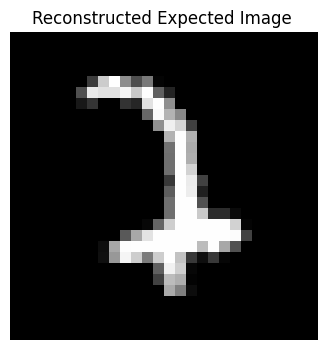

Expected Output   : 9
Predicted Output : 4


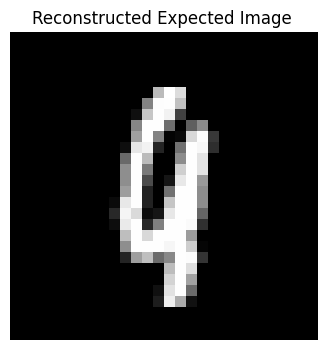

Expected Output   : 4
Predicted Output : 9


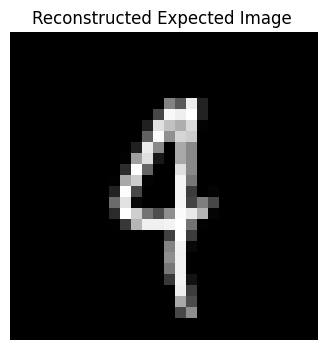

Expected Output   : 9
Predicted Output : 0


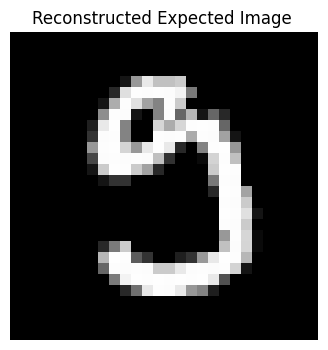

Expected Output   : 7
Predicted Output : 1


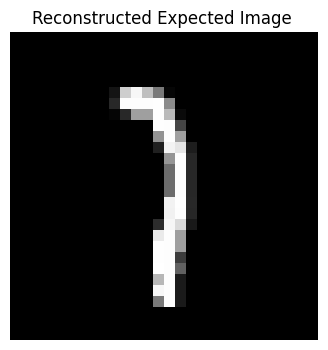

Expected Output   : 7
Predicted Output : 2


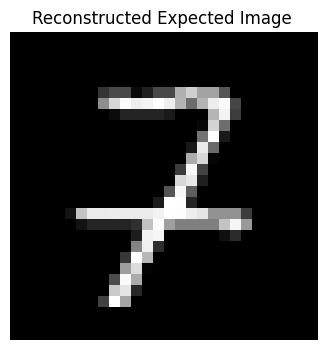

Expected Output   : 5
Predicted Output : 9


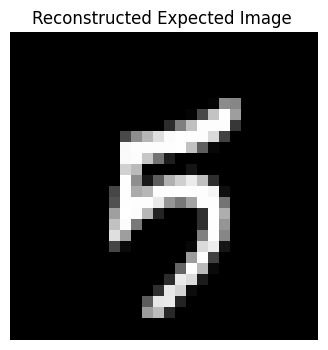

Expected Output   : 5
Predicted Output : 7


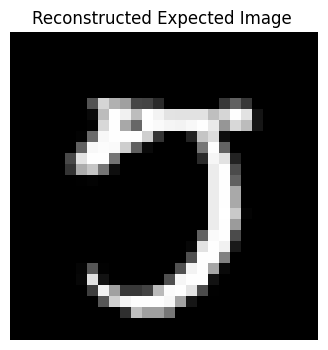

Expected Output   : 8
Predicted Output : 3


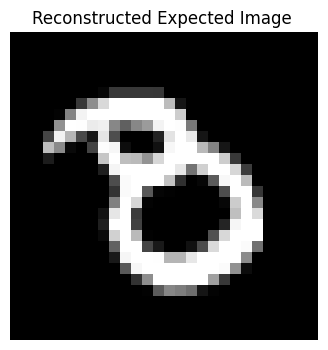

Expected Output   : 8
Predicted Output : 6


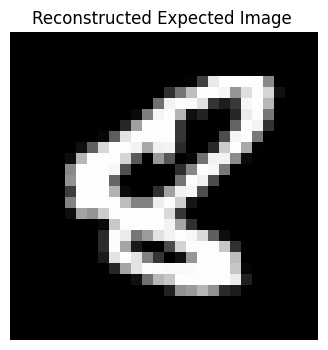

Expected Output   : 7
Predicted Output : 1


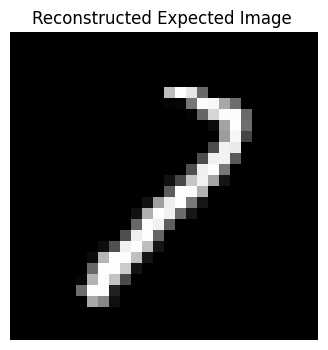

Expected Output   : 7
Predicted Output : 9


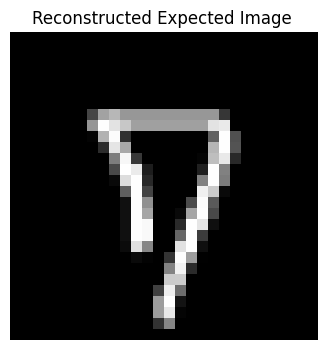

Expected Output   : 8
Predicted Output : 2


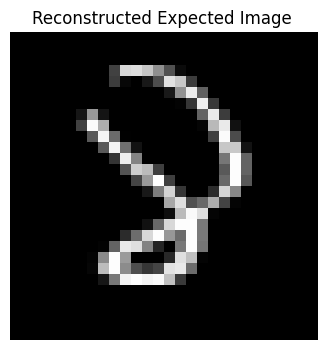

Expected Output   : 5
Predicted Output : 6


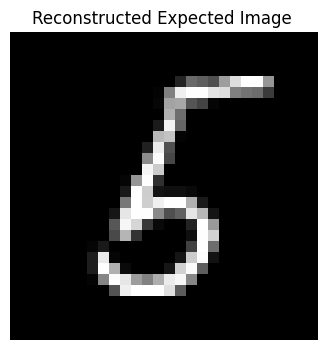

Expected Output   : 4
Predicted Output : 9


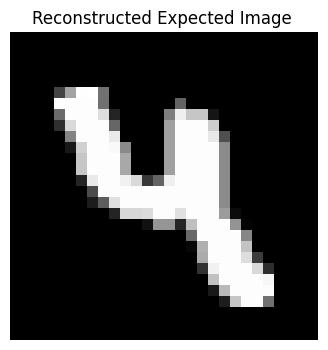

Expected Output   : 5
Predicted Output : 3


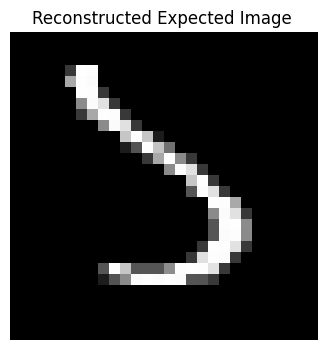

Expected Output   : 2
Predicted Output : 7


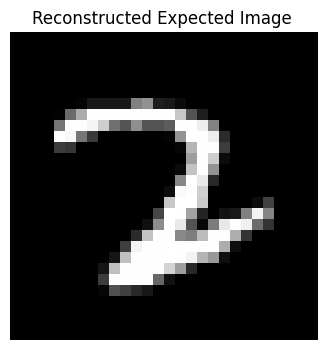

Expected Output   : 1
Predicted Output : 8


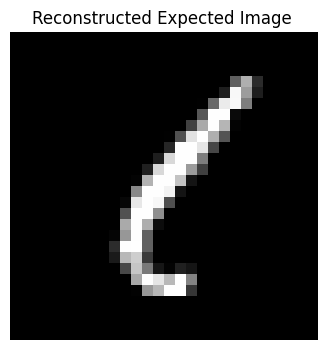

Expected Output   : 4
Predicted Output : 9


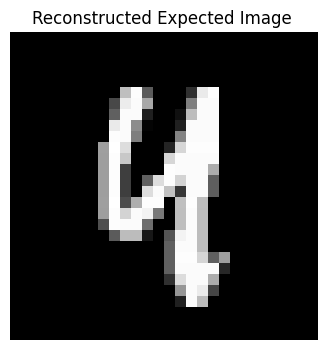

Expected Output   : 4
Predicted Output : 9


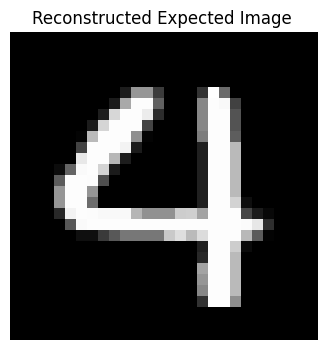

Expected Output   : 6
Predicted Output : 4


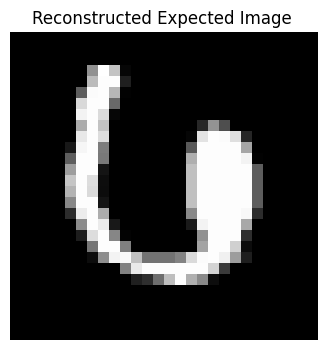

Expected Output   : 4
Predicted Output : 9


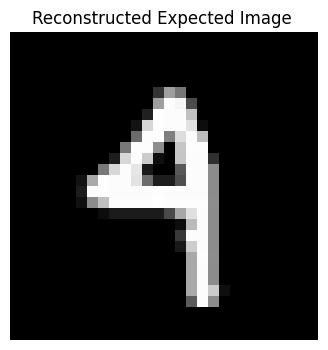

Expected Output   : 5
Predicted Output : 3


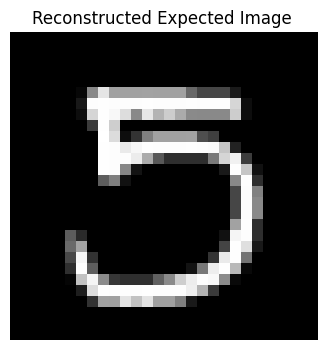

Expected Output   : 5
Predicted Output : 9


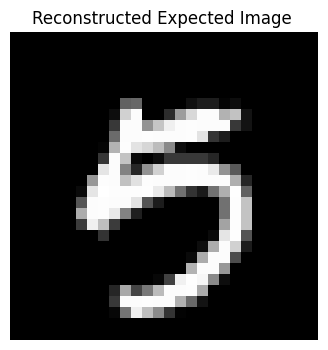

Expected Output   : 3
Predicted Output : 2


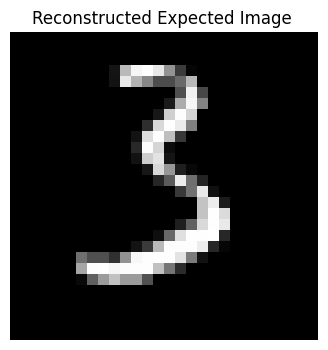

Expected Output   : 7
Predicted Output : 9


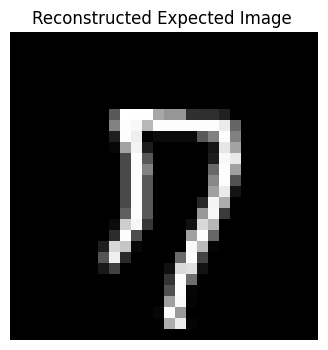

Expected Output   : 7
Predicted Output : 1


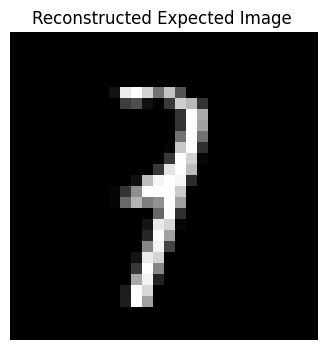

Expected Output   : 7
Predicted Output : 9


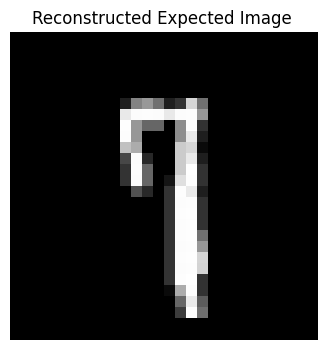

Expected Output   : 5
Predicted Output : 0


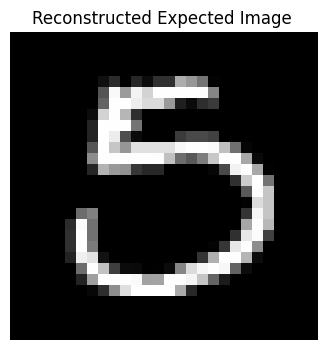

Expected Output   : 1
Predicted Output : 6


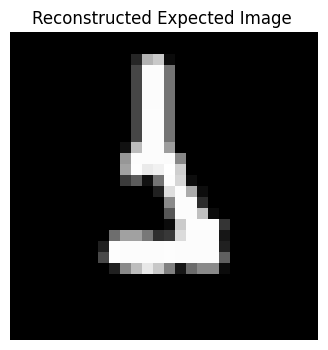

Expected Output   : 8
Predicted Output : 7


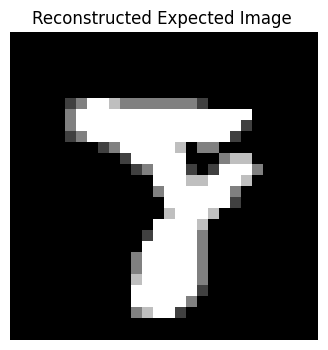

Expected Output   : 3
Predicted Output : 5


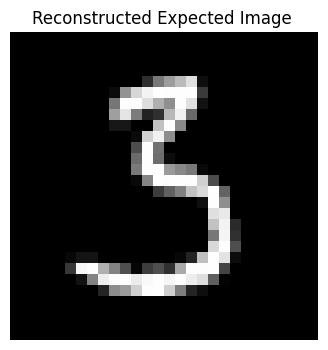

Expected Output   : 4
Predicted Output : 6


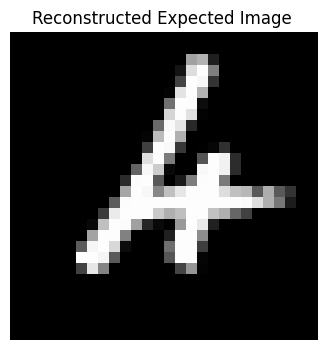

Expected Output   : 9
Predicted Output : 8


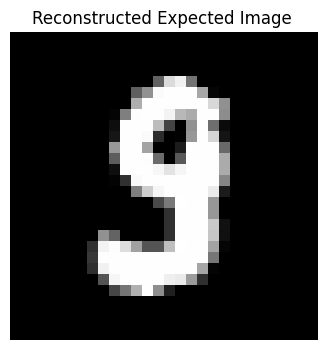

Expected Output   : 6
Predicted Output : 4


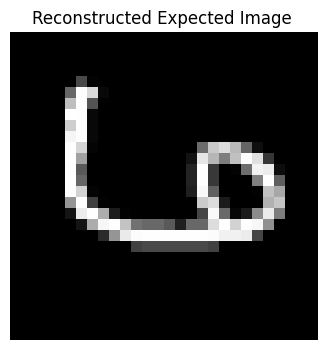

Expected Output   : 4
Predicted Output : 9


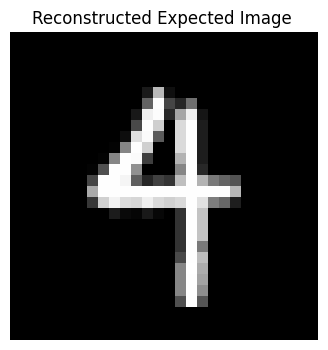

Expected Output   : 7
Predicted Output : 9


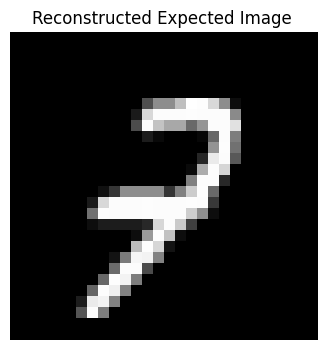

Expected Output   : 8
Predicted Output : 9


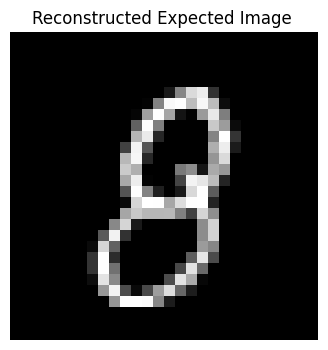

Expected Output   : 6
Predicted Output : 5


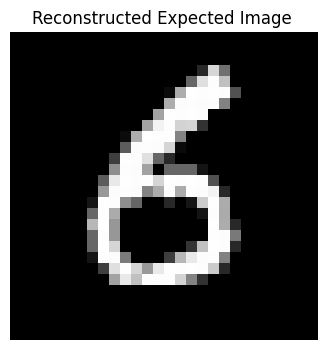

Expected Output   : 2
Predicted Output : 6


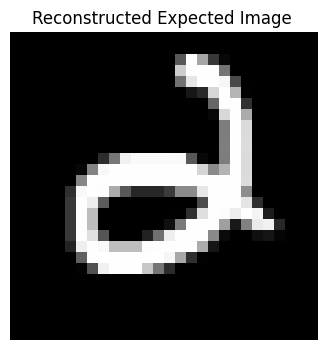

Expected Output   : 3
Predicted Output : 2


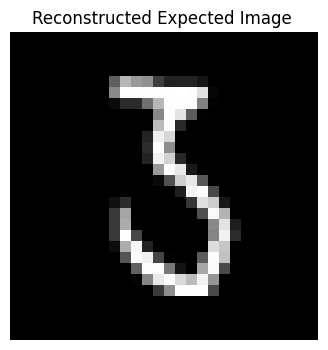

Expected Output   : 0
Predicted Output : 6


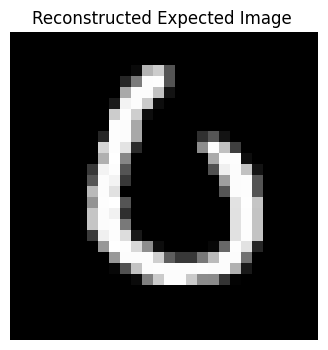

Expected Output   : 6
Predicted Output : 5


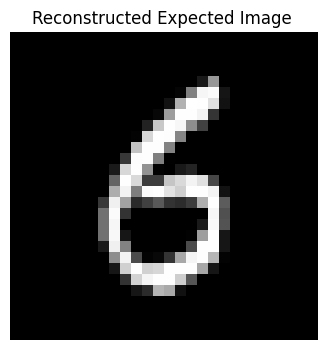

Expected Output   : 4
Predicted Output : 7


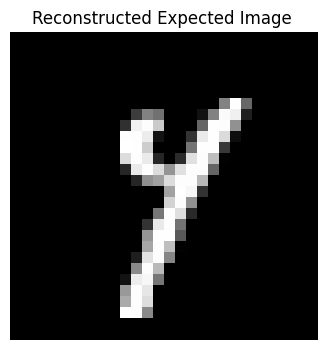

Expected Output   : 7
Predicted Output : 3


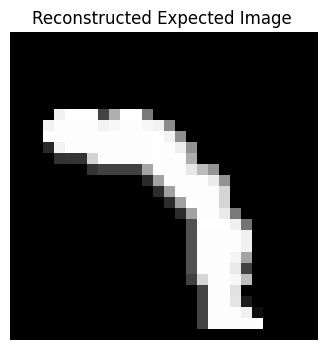

Expected Output   : 2
Predicted Output : 0


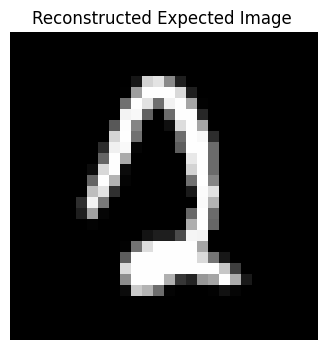

Expected Output   : 3
Predicted Output : 7


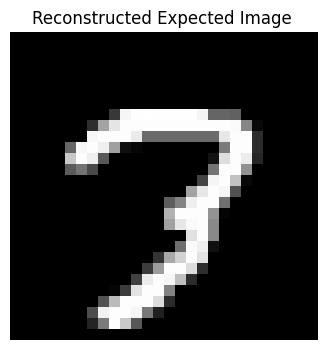

Expected Output   : 9
Predicted Output : 5


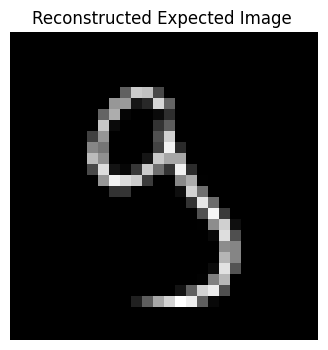

Expected Output   : 8
Predicted Output : 0


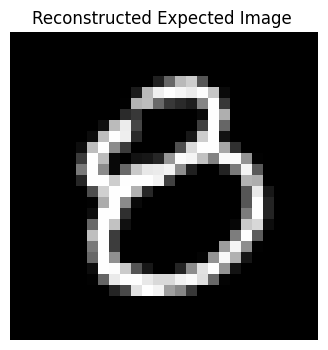

Expected Output   : 3
Predicted Output : 8


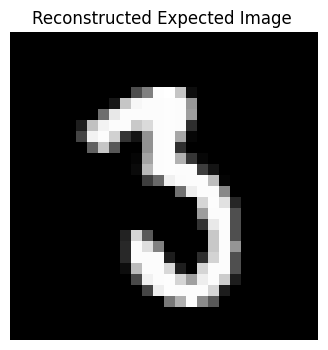

Expected Output   : 9
Predicted Output : 5


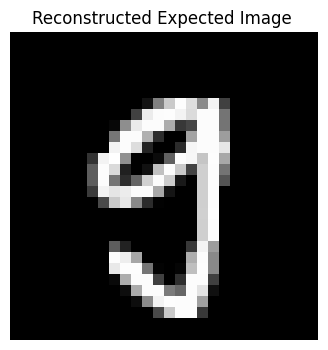

Expected Output   : 5
Predicted Output : 2


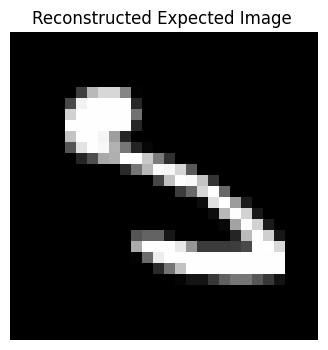

Expected Output   : 4
Predicted Output : 2


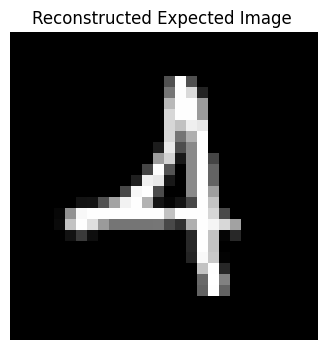

Expected Output   : 7
Predicted Output : 2


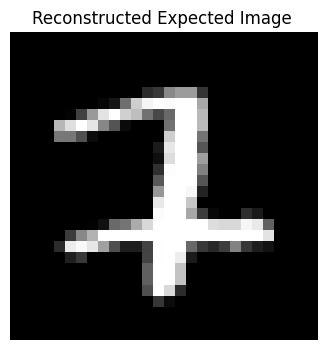

Expected Output   : 7
Predicted Output : 4


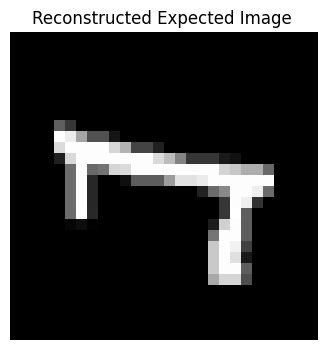

Expected Output   : 1
Predicted Output : 8


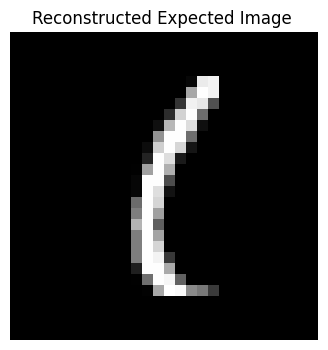

Expected Output   : 2
Predicted Output : 7


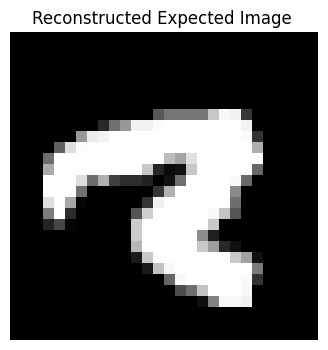

Expected Output   : 6
Predicted Output : 4


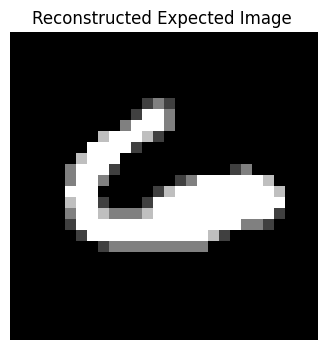

Expected Output   : 8
Predicted Output : 9


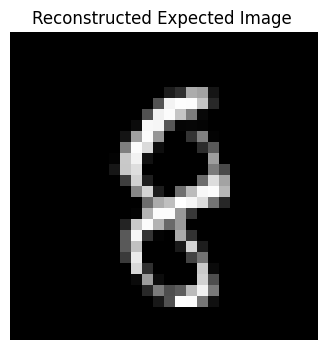

Expected Output   : 3
Predicted Output : 7


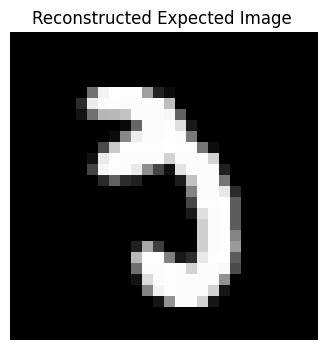

Expected Output   : 8
Predicted Output : 7


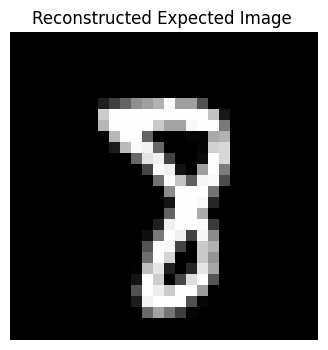

Expected Output   : 6
Predicted Output : 4


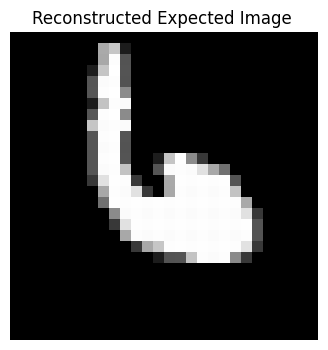

Expected Output   : 4
Predicted Output : 9


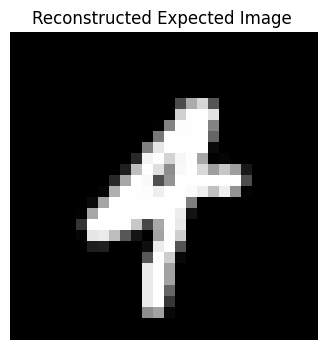

Expected Output   : 8
Predicted Output : 3


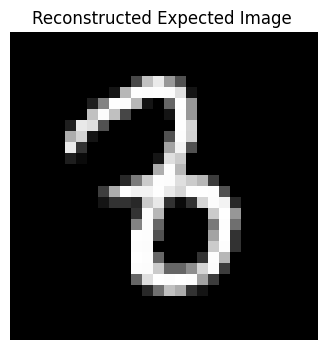

Expected Output   : 7
Predicted Output : 9


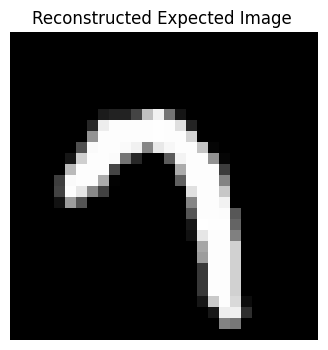

Expected Output   : 9
Predicted Output : 4


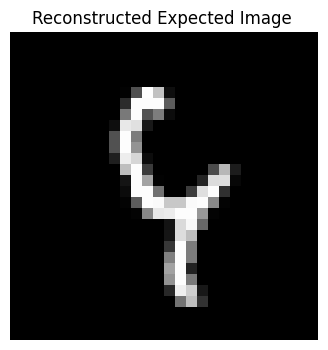

Expected Output   : 5
Predicted Output : 0


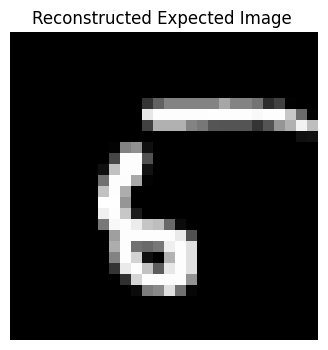

Expected Output   : 3
Predicted Output : 2


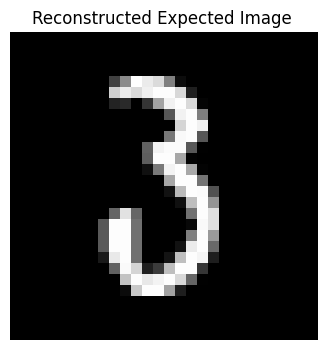

Expected Output   : 7
Predicted Output : 4


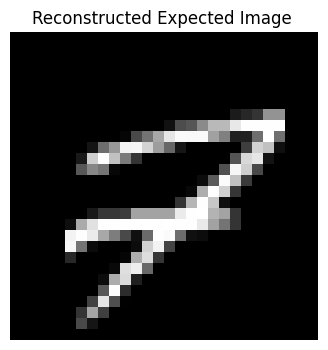

Expected Output   : 9
Predicted Output : 5


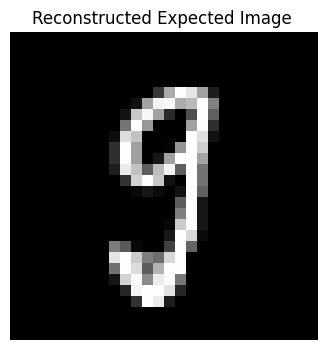

Expected Output   : 8
Predicted Output : 2


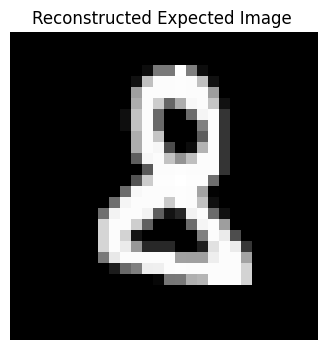

Expected Output   : 7
Predicted Output : 2


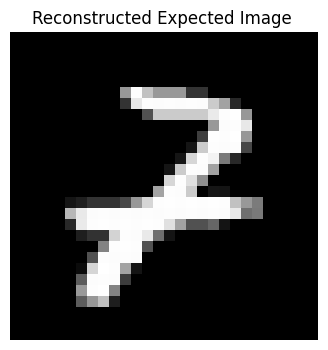

Expected Output   : 5
Predicted Output : 3


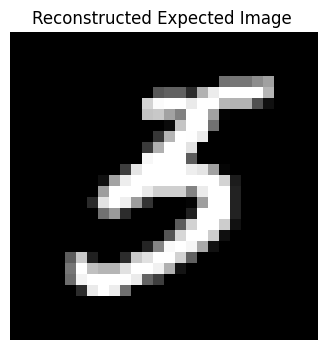

Expected Output   : 5
Predicted Output : 4


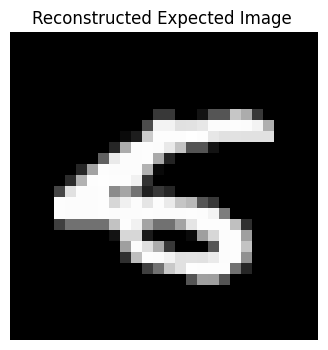

Expected Output   : 4
Predicted Output : 8


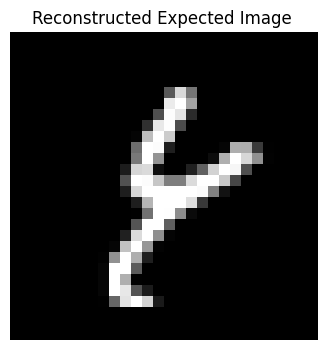

Expected Output   : 2
Predicted Output : 7


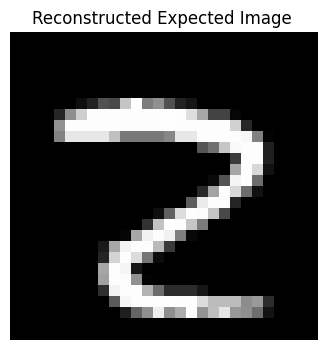

Expected Output   : 8
Predicted Output : 2


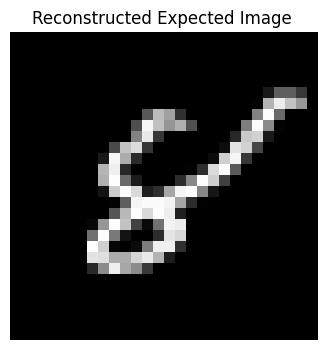

Expected Output   : 4
Predicted Output : 9


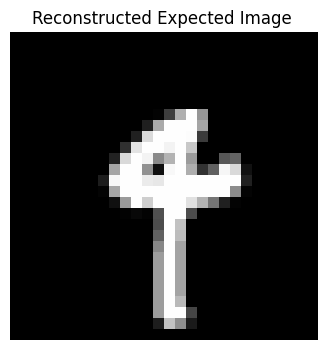

Expected Output   : 7
Predicted Output : 9


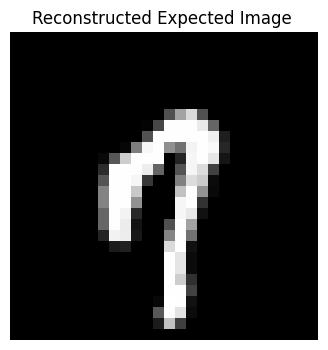

Expected Output   : 8
Predicted Output : 3


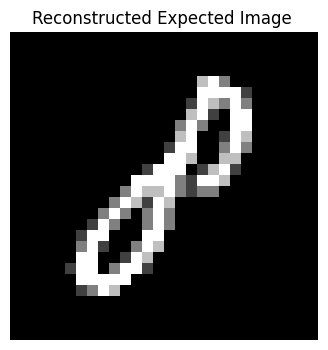

Expected Output   : 8
Predicted Output : 0


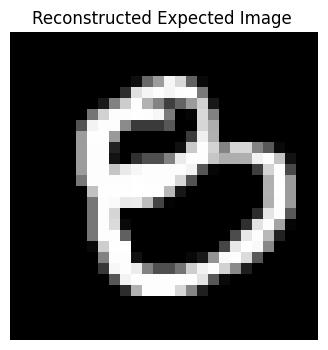

Expected Output   : 3
Predicted Output : 7


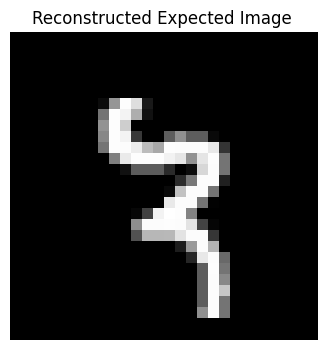

Expected Output   : 6
Predicted Output : 0


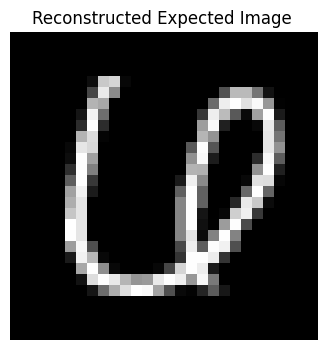

Expected Output   : 5
Predicted Output : 9


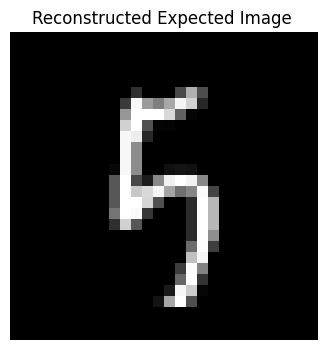

Expected Output   : 9
Predicted Output : 2


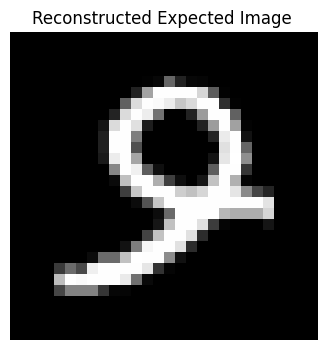

Expected Output   : 4
Predicted Output : 9


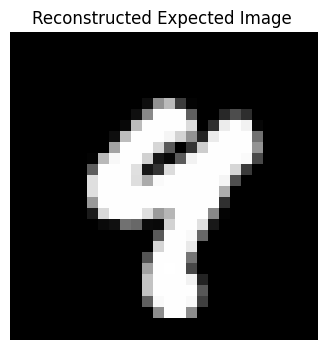

Expected Output   : 6
Predicted Output : 1


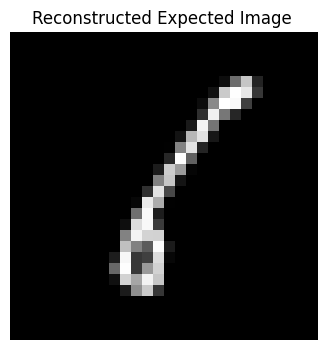

Expected Output   : 4
Predicted Output : 9


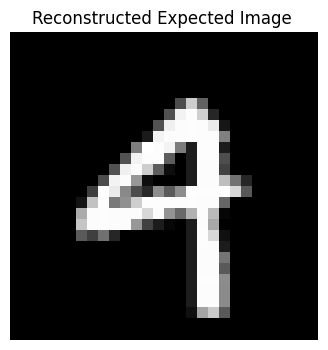

Expected Output   : 1
Predicted Output : 2


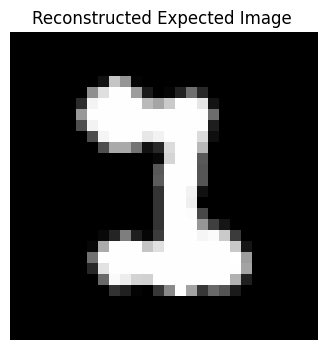

Expected Output   : 0
Predicted Output : 5


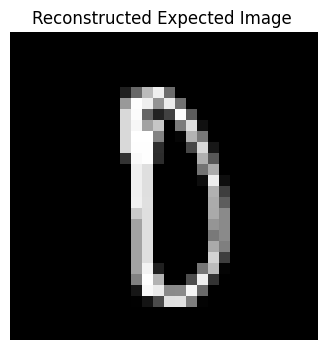

Expected Output   : 2
Predicted Output : 3


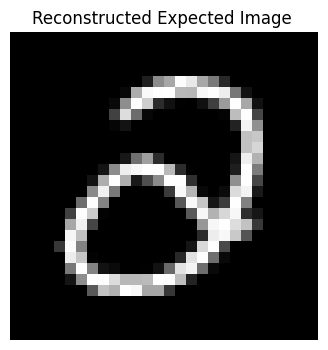

Expected Output   : 5
Predicted Output : 8


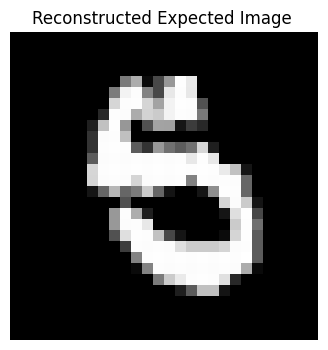

Expected Output   : 5
Predicted Output : 6


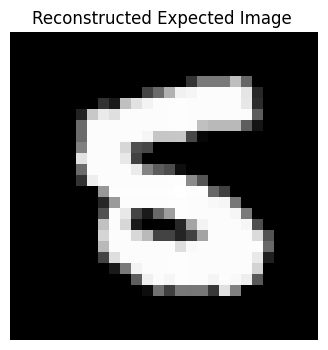

Expected Output   : 1
Predicted Output : 6


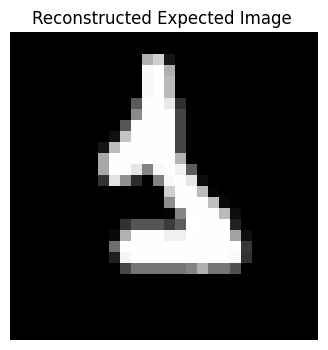

Expected Output   : 8
Predicted Output : 0


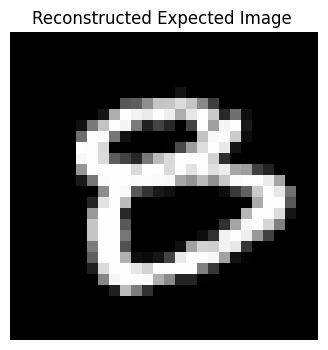

Expected Output   : 9
Predicted Output : 6


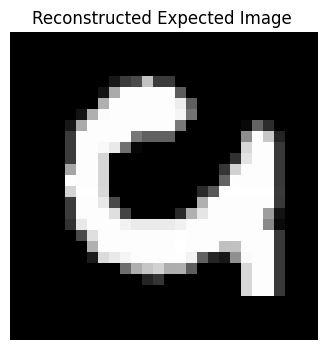

Expected Output   : 2
Predicted Output : 7


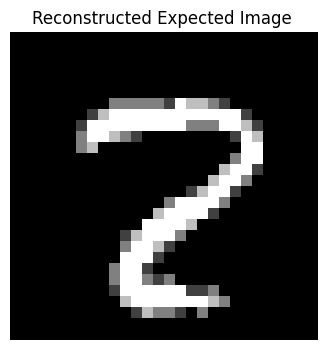

Expected Output   : 7
Predicted Output : 2


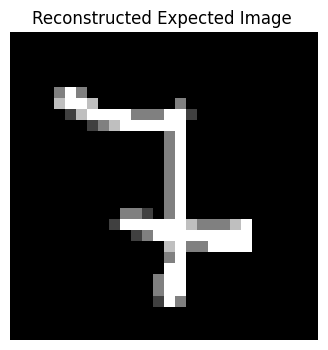

Expected Output   : 0
Predicted Output : 2


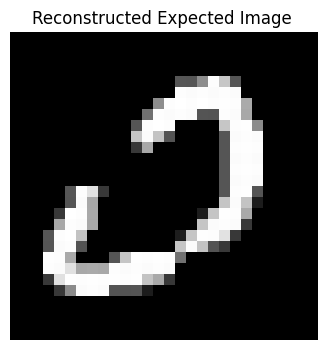

Expected Output   : 5
Predicted Output : 9


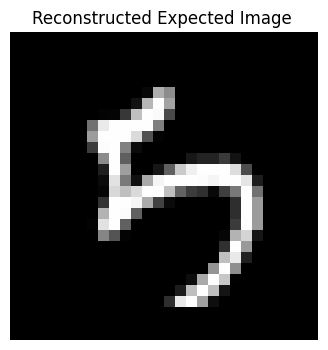

Expected Output   : 4
Predicted Output : 9


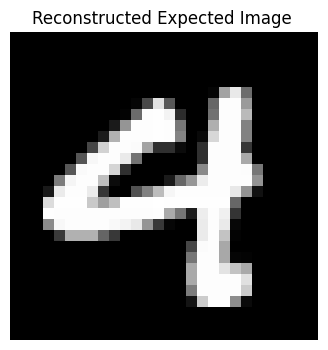

Expected Output   : 8
Predicted Output : 3


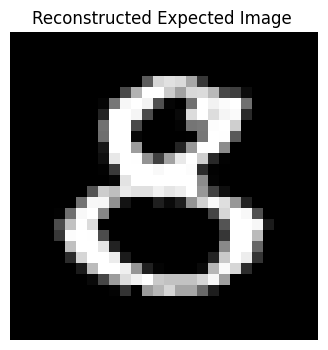

Expected Output   : 4
Predicted Output : 9


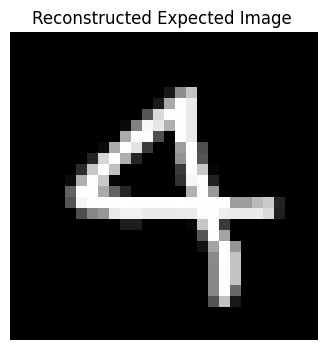

Expected Output   : 9
Predicted Output : 8


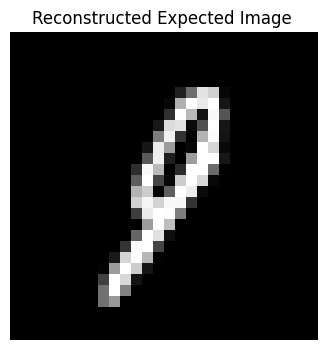

Expected Output   : 3
Predicted Output : 9


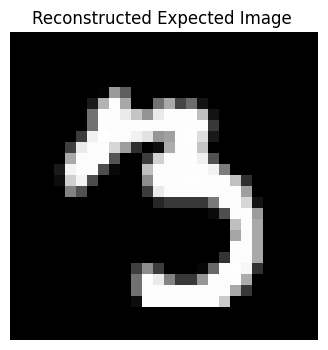

Expected Output   : 6
Predicted Output : 4


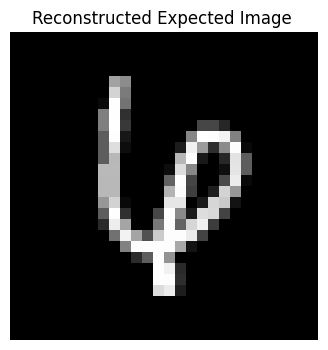

Expected Output   : 8
Predicted Output : 9


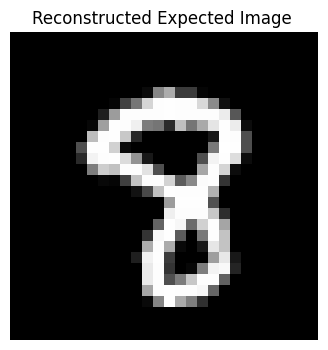

Expected Output   : 8
Predicted Output : 3


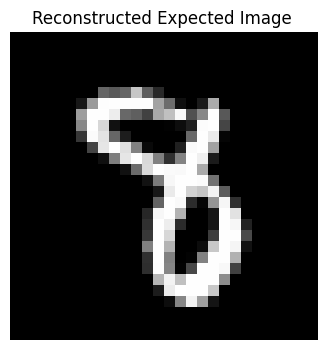

Expected Output   : 4
Predicted Output : 9


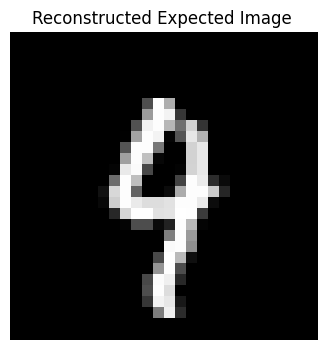

Expected Output   : 2
Predicted Output : 6


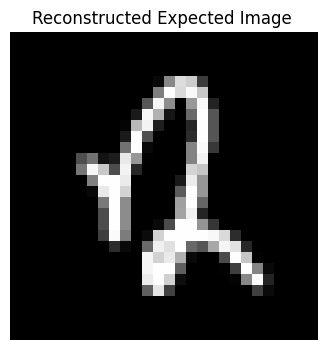

Expected Output   : 4
Predicted Output : 9


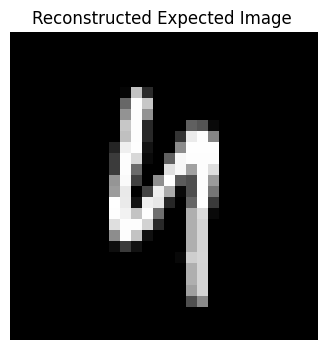

Expected Output   : 5
Predicted Output : 6


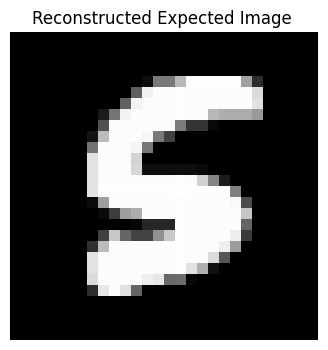

Expected Output   : 3
Predicted Output : 5


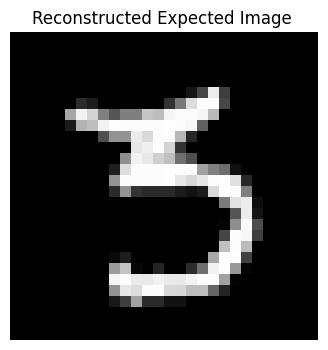

Expected Output   : 3
Predicted Output : 2


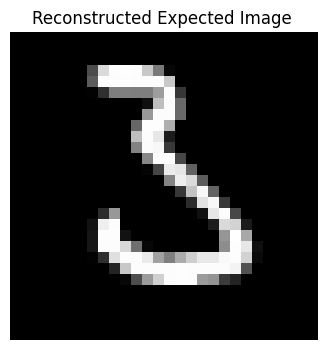

Expected Output   : 5
Predicted Output : 8


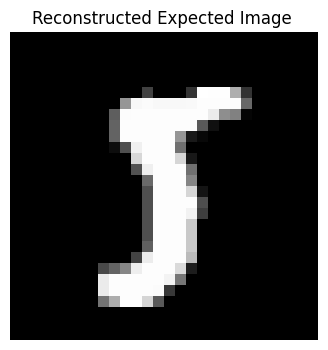

Expected Output   : 5
Predicted Output : 7


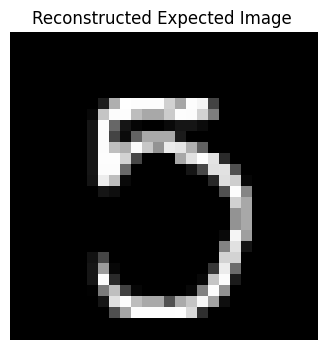

Expected Output   : 8
Predicted Output : 2


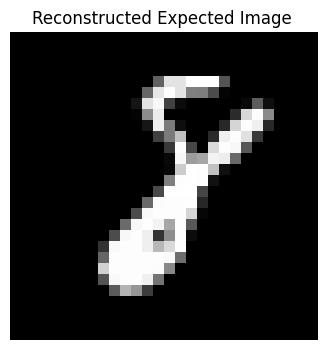

Expected Output   : 7
Predicted Output : 1


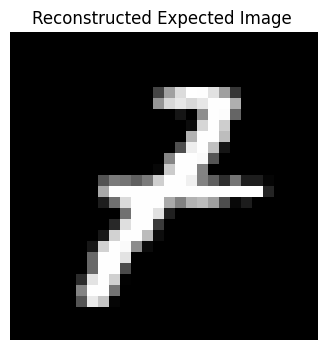

Expected Output   : 0
Predicted Output : 6


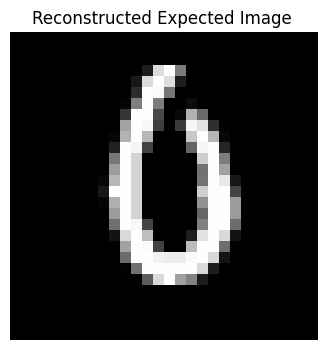

Expected Output   : 2
Predicted Output : 7


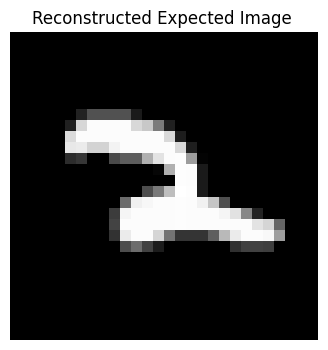

Expected Output   : 9
Predicted Output : 0


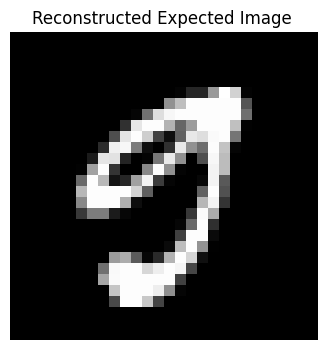

Expected Output   : 6
Predicted Output : 1


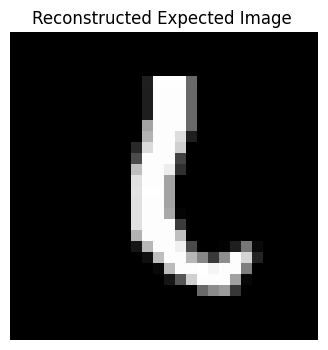

Expected Output   : 5
Predicted Output : 0


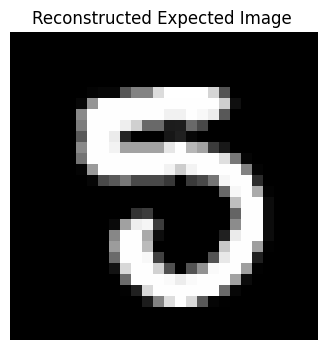

Expected Output   : 7
Predicted Output : 4


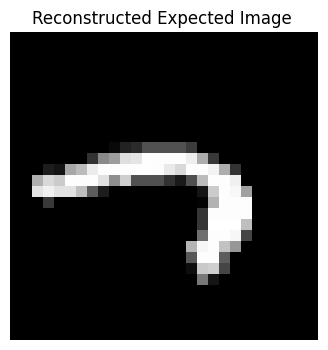

Expected Output   : 6
Predicted Output : 2


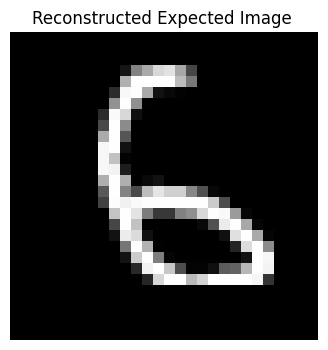

Expected Output   : 6
Predicted Output : 0


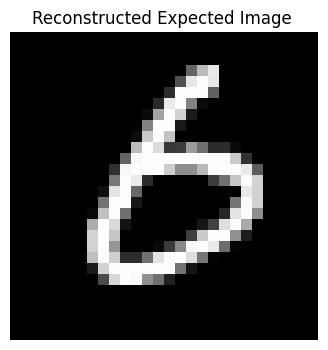

Expected Output   : 3
Predicted Output : 2


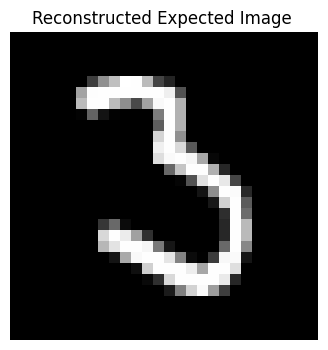

Expected Output   : 3
Predicted Output : 6


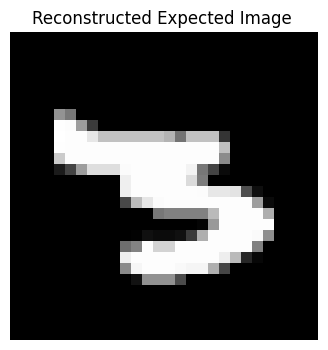

Expected Output   : 4
Predicted Output : 9


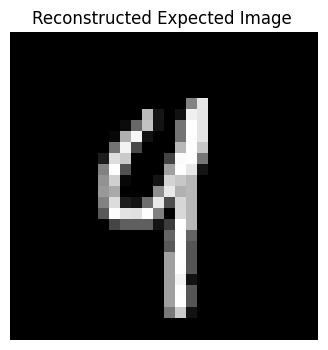

Expected Output   : 5
Predicted Output : 0


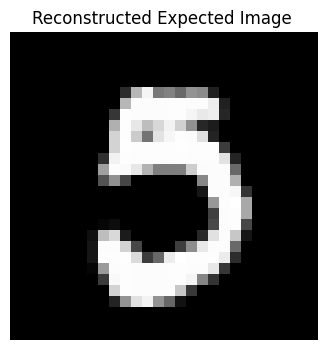

Expected Output   : 5
Predicted Output : 3


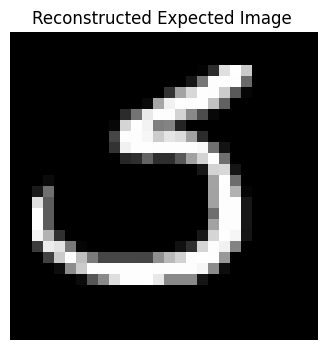

Expected Output   : 8
Predicted Output : 0


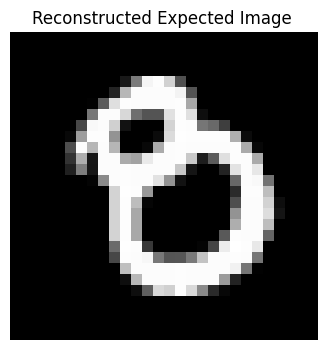

Expected Output   : 4
Predicted Output : 9


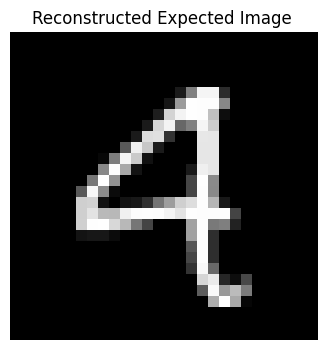

Expected Output   : 5
Predicted Output : 0


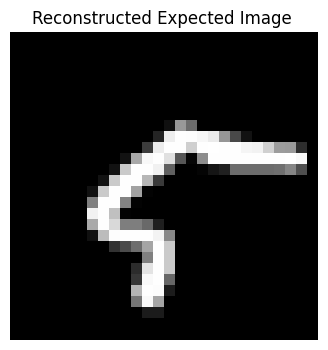

Expected Output   : 3
Predicted Output : 2


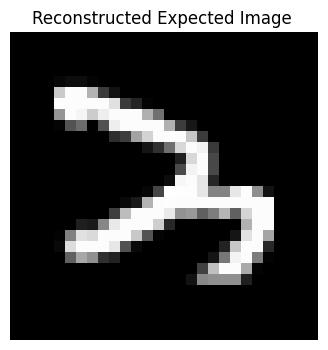

Expected Output   : 3
Predicted Output : 7


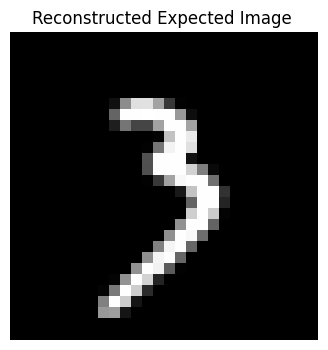

Expected Output   : 3
Predicted Output : 5


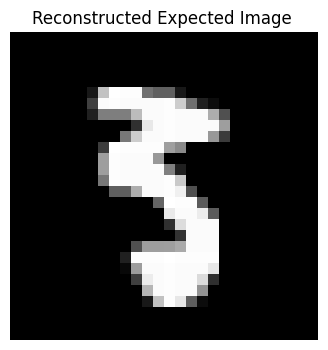

Expected Output   : 5
Predicted Output : 7


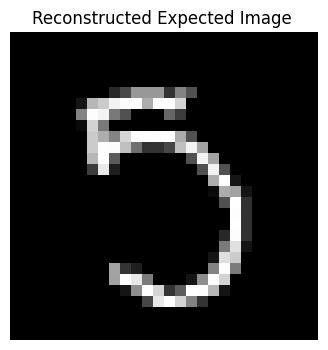

Expected Output   : 8
Predicted Output : 9


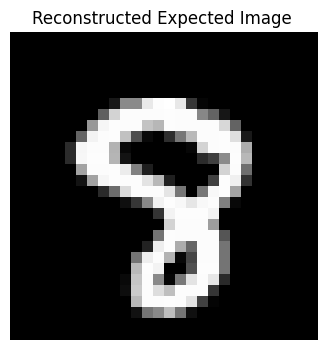

Expected Output   : 6
Predicted Output : 8


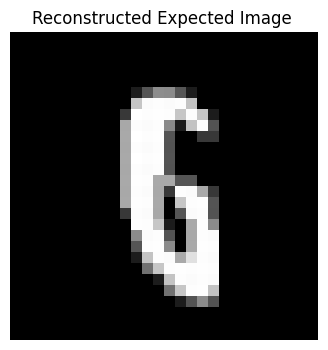

Expected Output   : 9
Predicted Output : 7


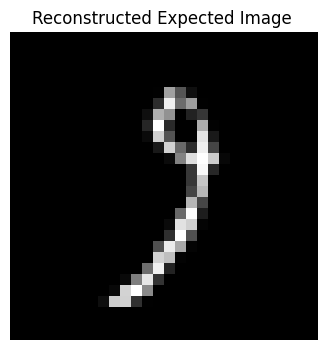

Expected Output   : 1
Predicted Output : 2


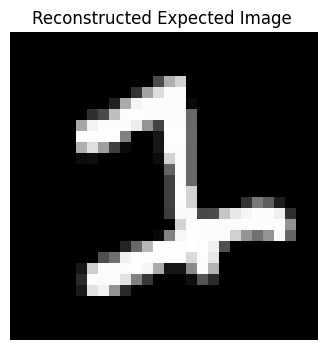

Expected Output   : 3
Predicted Output : 5


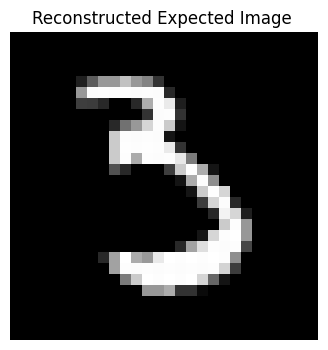

Expected Output   : 5
Predicted Output : 9


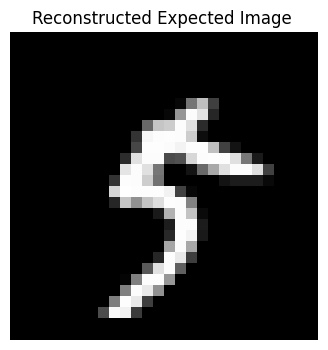

Expected Output   : 6
Predicted Output : 0


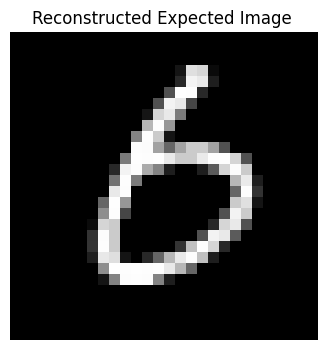

Expected Output   : 4
Predicted Output : 9


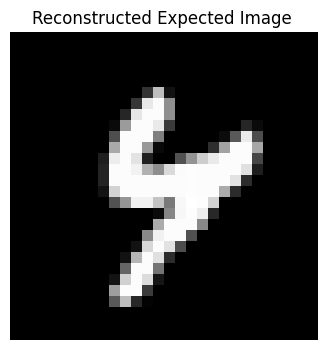

Expected Output   : 7
Predicted Output : 9


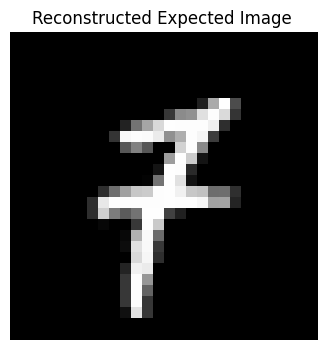

Expected Output   : 5
Predicted Output : 9


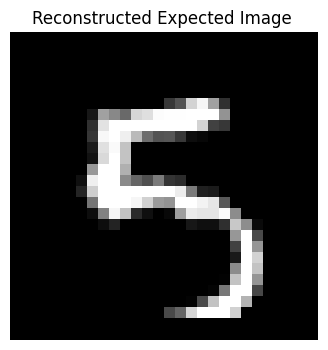

Expected Output   : 7
Predicted Output : 4


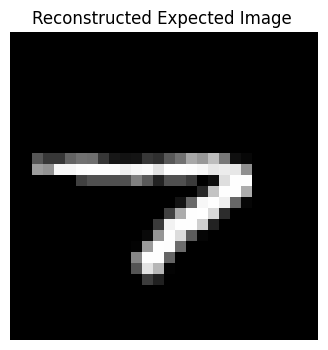

Expected Output   : 8
Predicted Output : 3


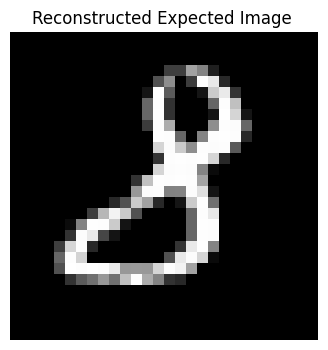

Expected Output   : 6
Predicted Output : 2


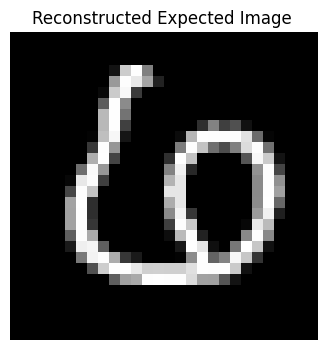

Expected Output   : 7
Predicted Output : 3


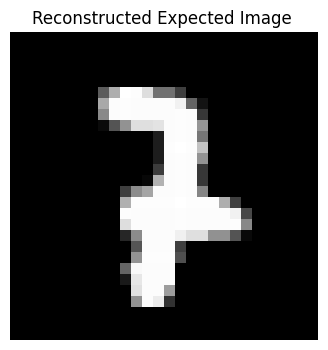

Expected Output   : 7
Predicted Output : 9


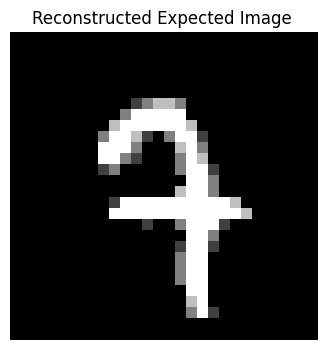

Expected Output   : 4
Predicted Output : 9


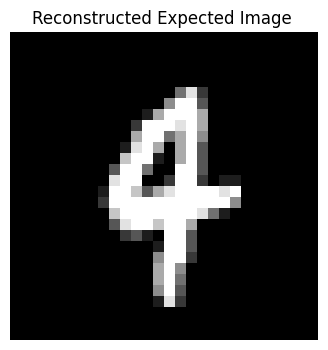

Expected Output   : 4
Predicted Output : 9


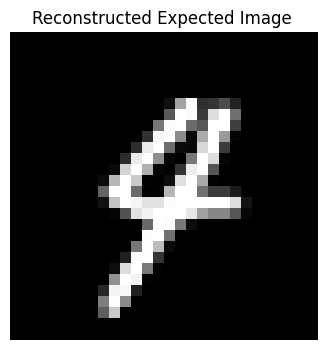

Expected Output   : 6
Predicted Output : 0


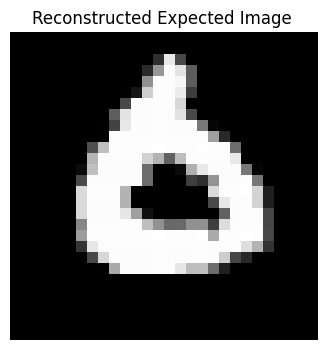

Expected Output   : 2
Predicted Output : 7


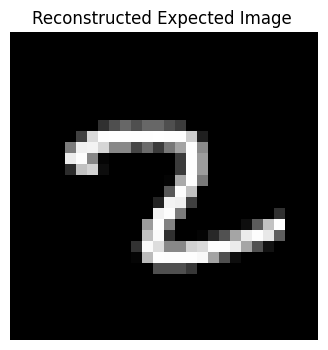

Expected Output   : 6
Predicted Output : 4


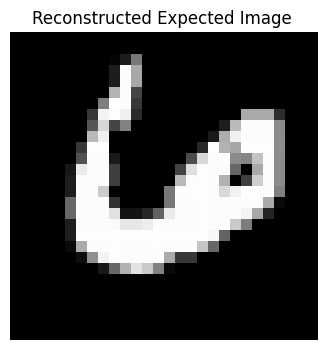

Expected Output   : 4
Predicted Output : 9


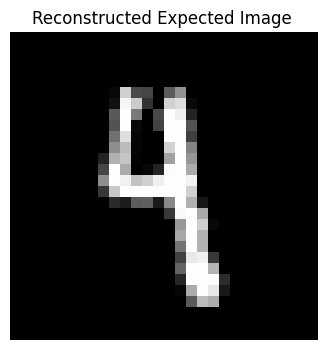

Expected Output   : 9
Predicted Output : 1


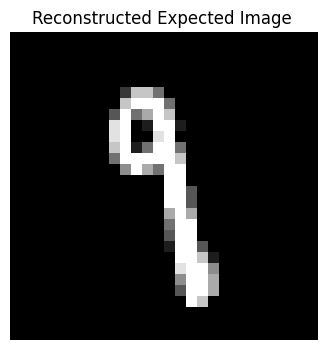

Expected Output   : 6
Predicted Output : 4


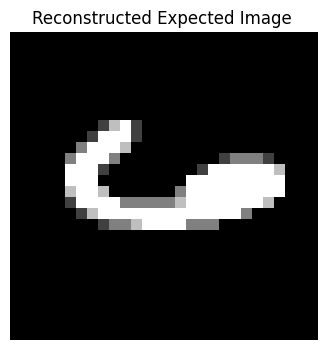

Expected Output   : 4
Predicted Output : 9


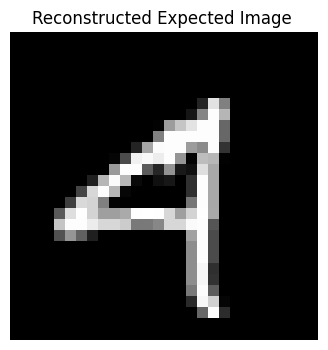

Expected Output   : 3
Predicted Output : 2


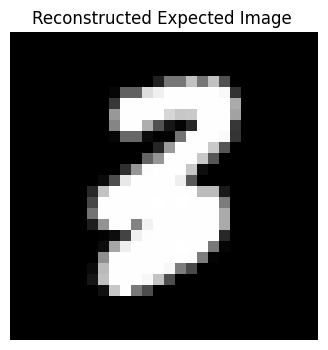

Expected Output   : 5
Predicted Output : 0


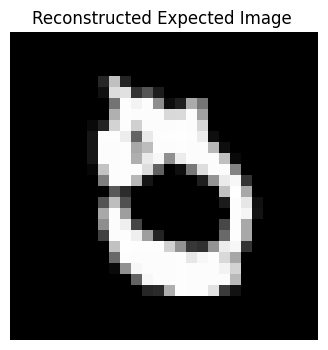

Expected Output   : 8
Predicted Output : 0


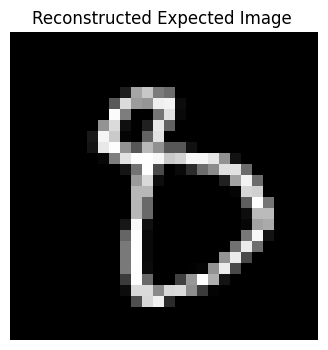

Expected Output   : 8
Predicted Output : 5


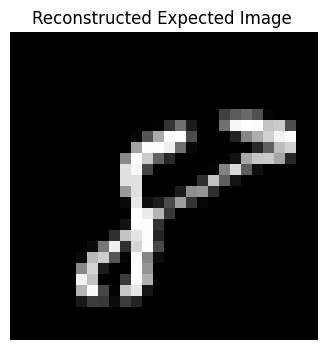

Expected Output   : 7
Predicted Output : 4


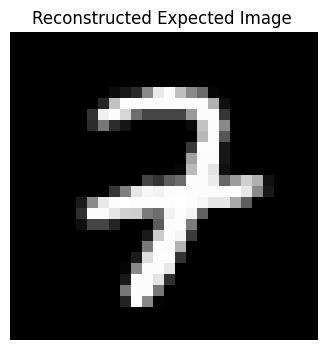

Expected Output   : 9
Predicted Output : 3


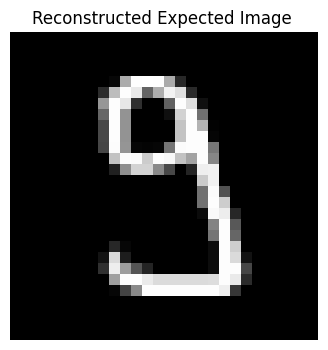

Expected Output   : 7
Predicted Output : 4


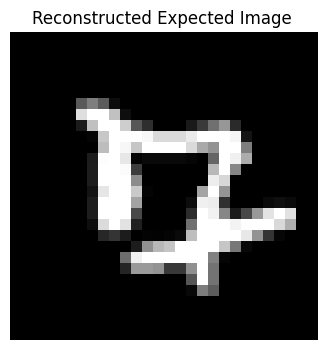

Expected Output   : 8
Predicted Output : 3


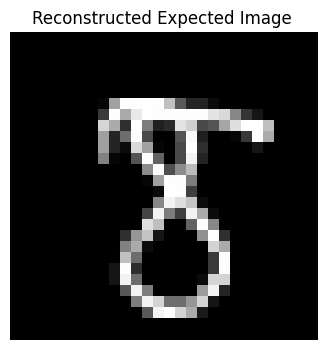

Expected Output   : 4
Predicted Output : 9


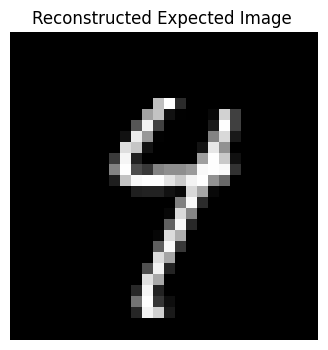

Expected Output   : 4
Predicted Output : 9


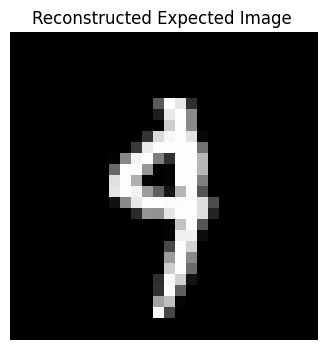

Expected Output   : 7
Predicted Output : 1


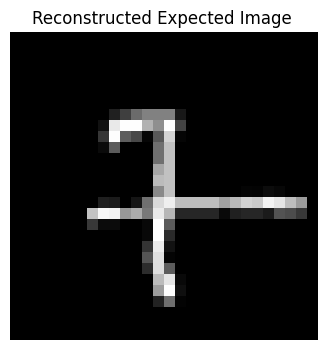

Expected Output   : 8
Predicted Output : 3


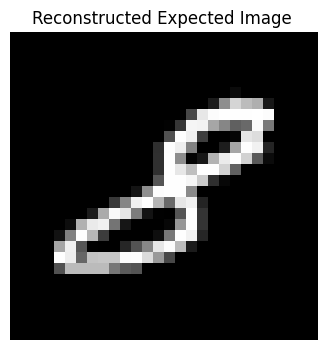

Expected Output   : 7
Predicted Output : 2


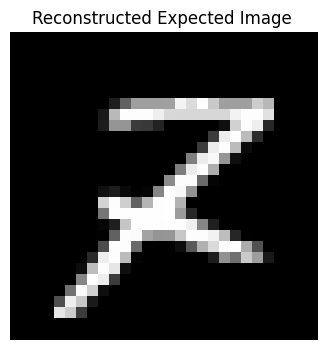

Expected Output   : 5
Predicted Output : 8


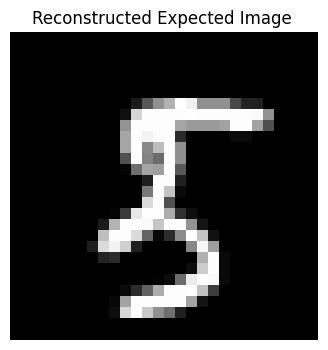

Expected Output   : 4
Predicted Output : 2


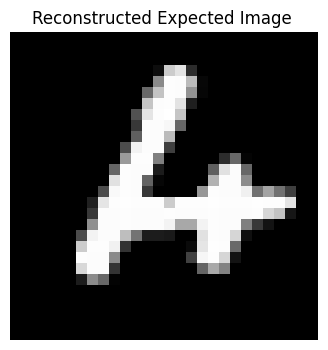

Expected Output   : 7
Predicted Output : 3


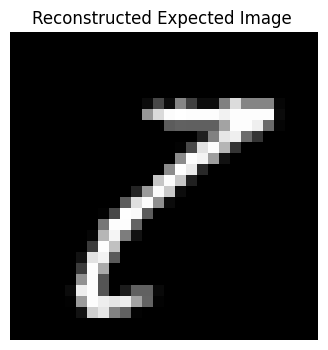

Expected Output   : 2
Predicted Output : 4


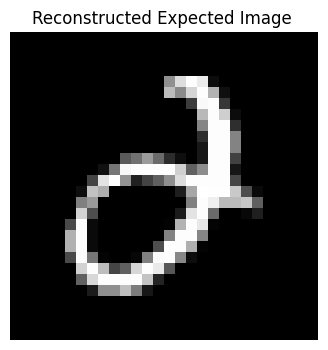

Expected Output   : 2
Predicted Output : 8


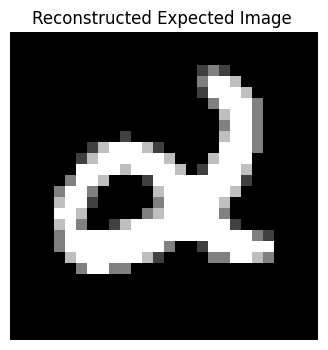

Expected Output   : 0
Predicted Output : 6


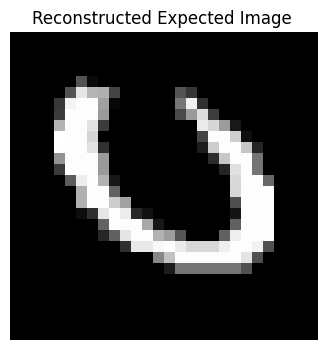

Expected Output   : 9
Predicted Output : 4


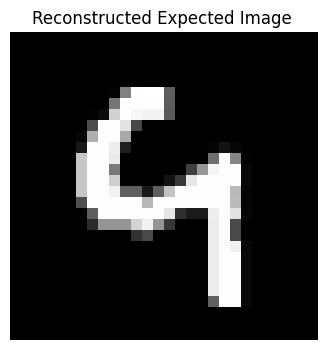

Expected Output   : 7
Predicted Output : 1


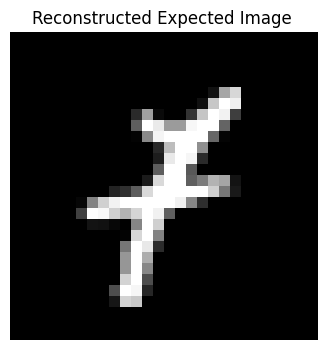

Expected Output   : 6
Predicted Output : 2


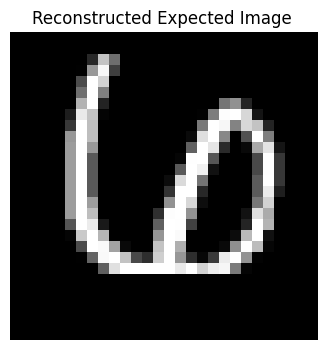

Expected Output   : 7
Predicted Output : 3


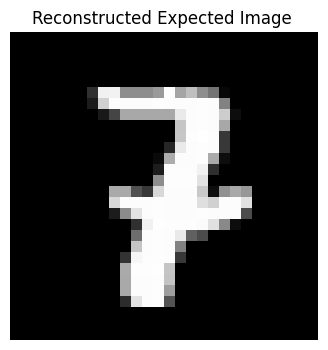

Expected Output   : 6
Predicted Output : 5


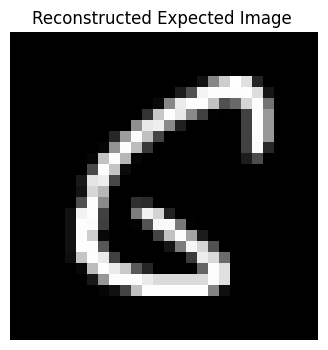

Expected Output   : 9
Predicted Output : 4


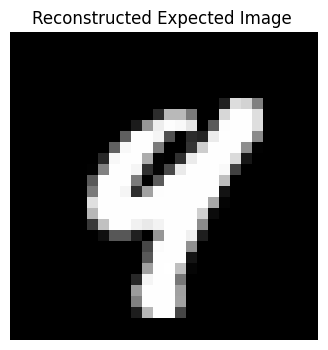

Expected Output   : 8
Predicted Output : 3


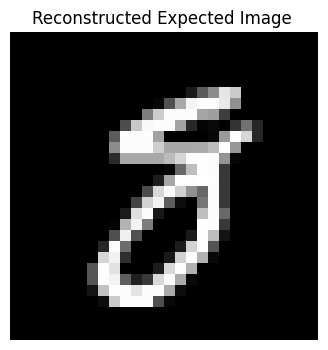

Expected Output   : 5
Predicted Output : 6


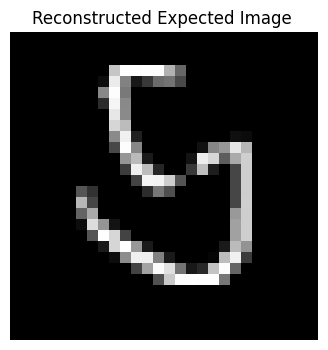

Expected Output   : 5
Predicted Output : 3


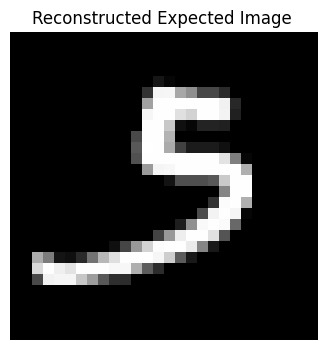

Expected Output   : 1
Predicted Output : 3


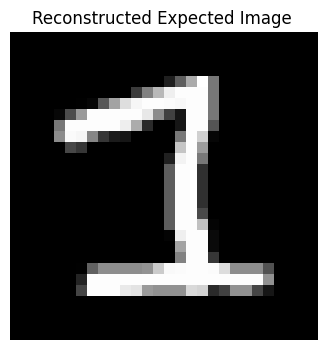

Expected Output   : 9
Predicted Output : 3


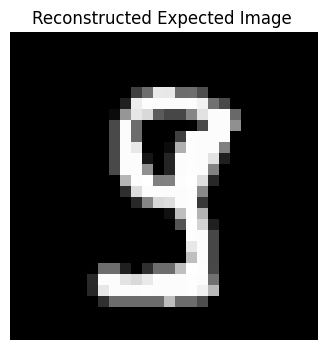

Expected Output   : 4
Predicted Output : 6


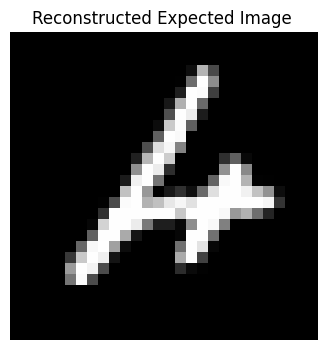

Expected Output   : 3
Predicted Output : 5


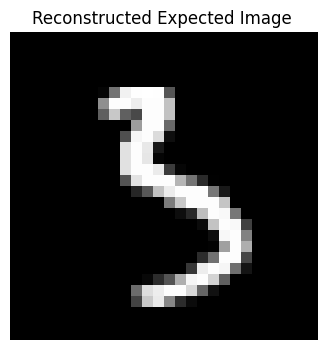

Expected Output   : 2
Predicted Output : 8


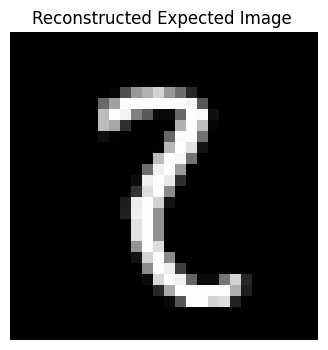

Expected Output   : 8
Predicted Output : 2


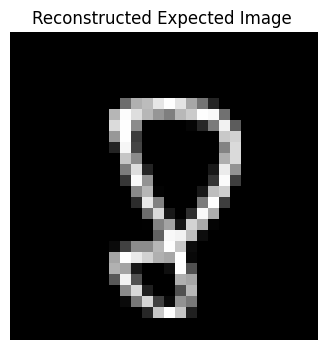

Expected Output   : 3
Predicted Output : 4


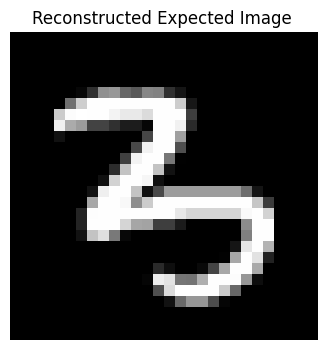

Expected Output   : 5
Predicted Output : 3


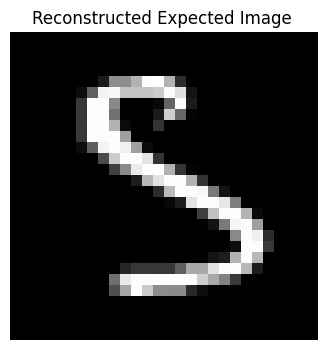

Expected Output   : 7
Predicted Output : 1


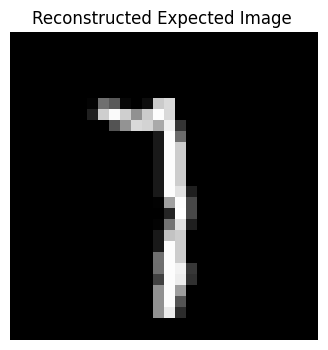

Expected Output   : 4
Predicted Output : 9


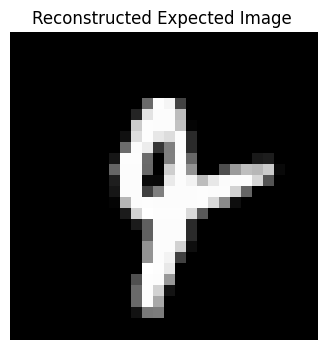

Expected Output   : 3
Predicted Output : 5


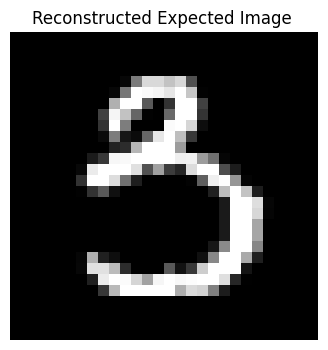

Expected Output   : 6
Predicted Output : 5


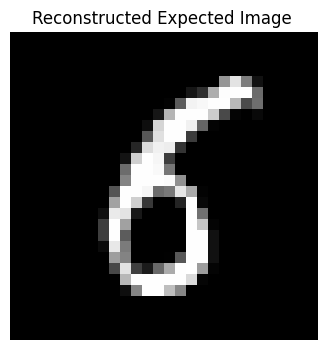

Expected Output   : 0
Predicted Output : 9


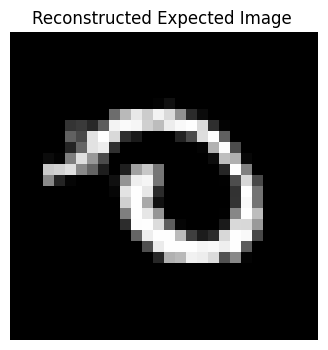

Expected Output   : 8
Predicted Output : 0


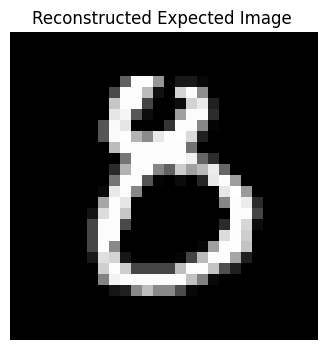

Expected Output   : 9
Predicted Output : 3


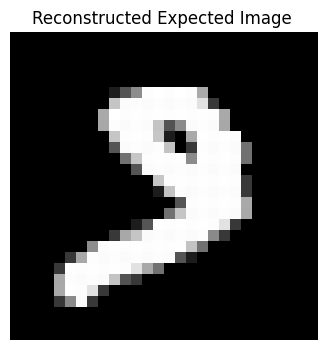

Expected Output   : 9
Predicted Output : 4


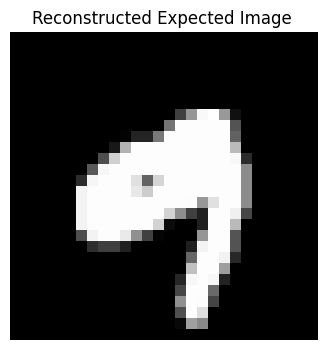

Expected Output   : 8
Predicted Output : 2


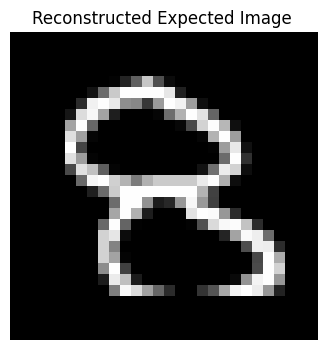

Expected Output   : 5
Predicted Output : 1


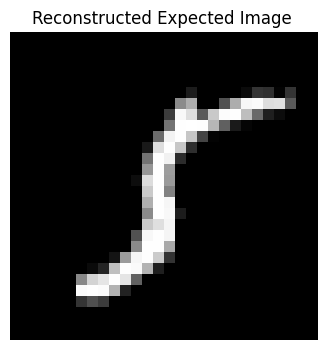

Expected Output   : 9
Predicted Output : 4


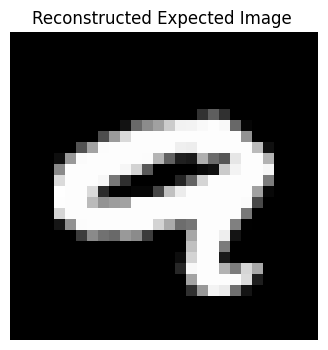

Expected Output   : 9
Predicted Output : 0


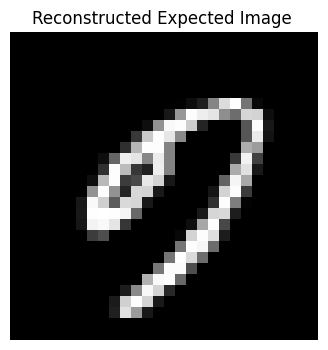

Expected Output   : 2
Predicted Output : 7


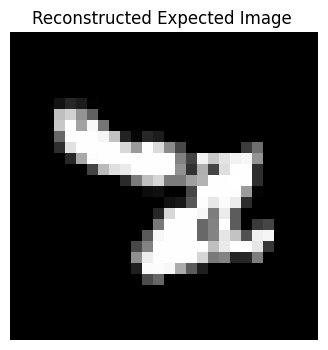

Expected Output   : 7
Predicted Output : 9


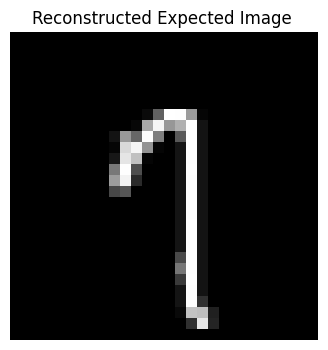

Expected Output   : 1
Predicted Output : 5


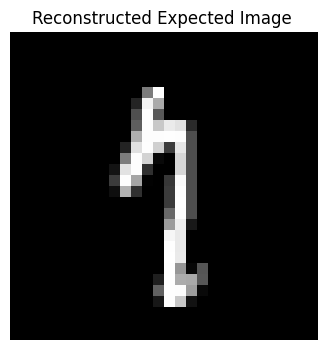

Expected Output   : 6
Predicted Output : 5


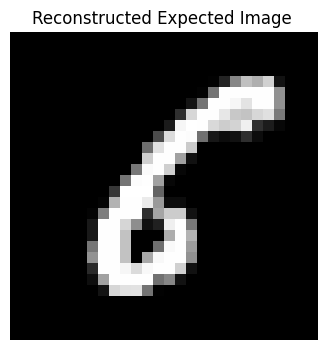

Expected Output   : 1
Predicted Output : 3


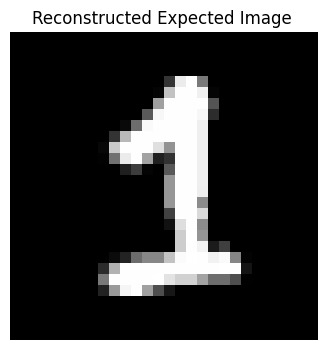

Expected Output   : 9
Predicted Output : 7


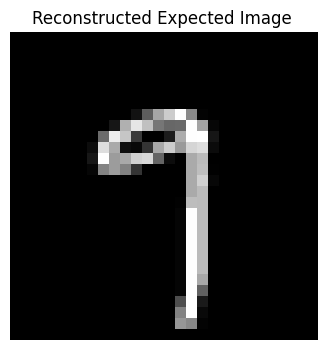

Expected Output   : 7
Predicted Output : 9


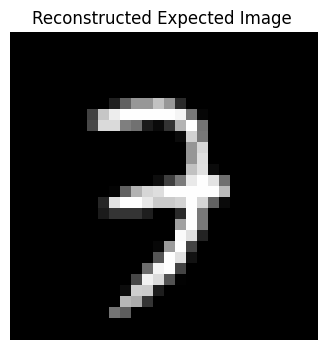

Expected Output   : 2
Predicted Output : 5


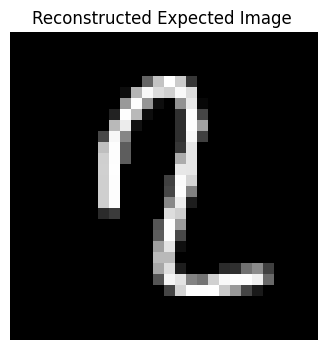

Expected Output   : 3
Predicted Output : 2


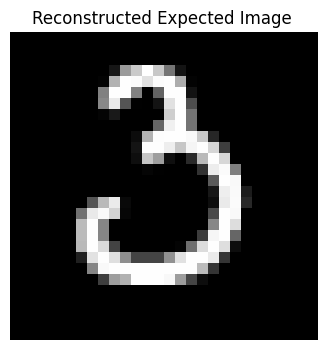

Expected Output   : 2
Predicted Output : 7


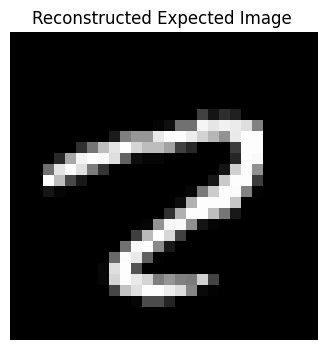

Expected Output   : 5
Predicted Output : 9


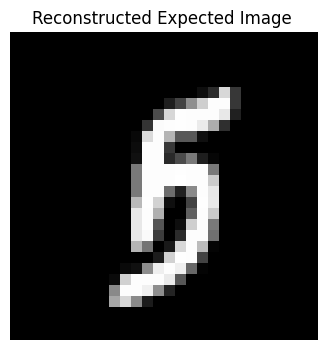

Expected Output   : 3
Predicted Output : 7


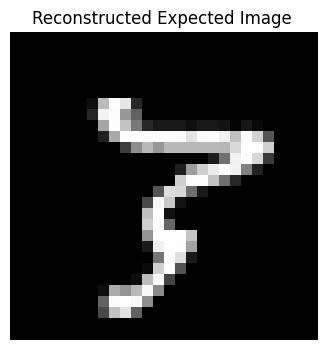

Expected Output   : 3
Predicted Output : 9


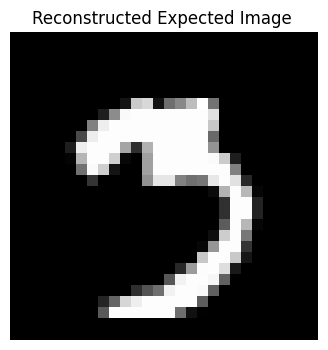

Expected Output   : 2
Predicted Output : 3


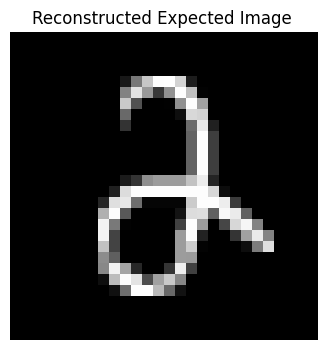

Expected Output   : 4
Predicted Output : 9


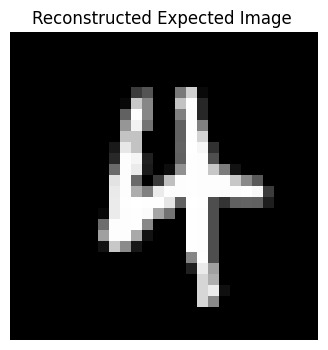

Expected Output   : 5
Predicted Output : 6


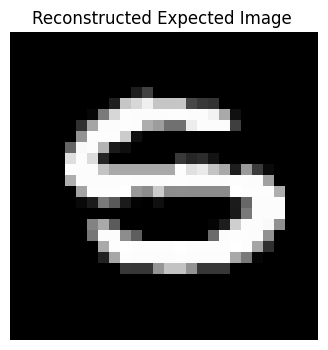

Expected Output   : 7
Predicted Output : 4


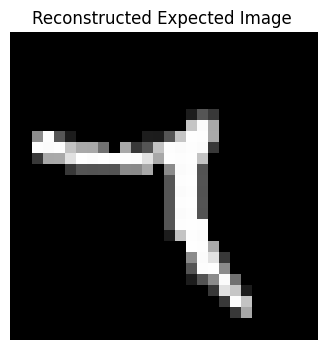

Expected Output   : 3
Predicted Output : 7


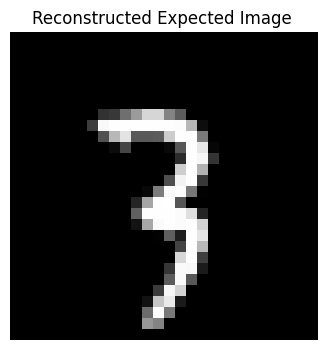

Expected Output   : 6
Predicted Output : 0


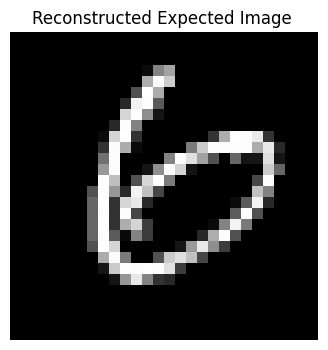

Expected Output   : 0
Predicted Output : 5


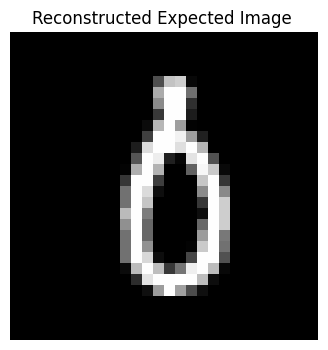

Expected Output   : 8
Predicted Output : 7


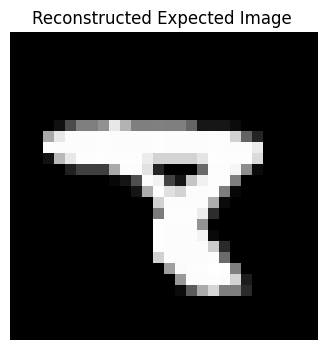

Expected Output   : 7
Predicted Output : 8


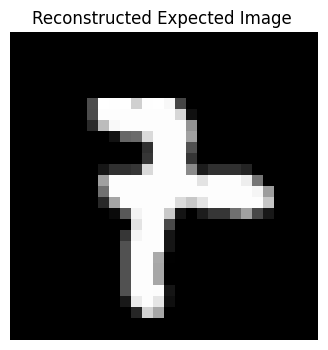

Expected Output   : 2
Predicted Output : 7


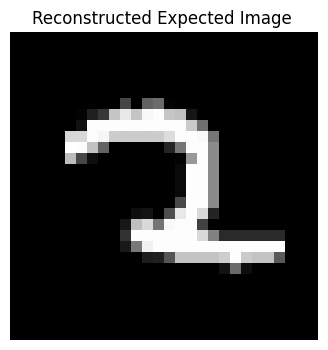

Expected Output   : 8
Predicted Output : 3


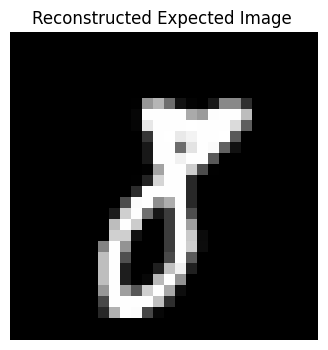

Expected Output   : 5
Predicted Output : 0


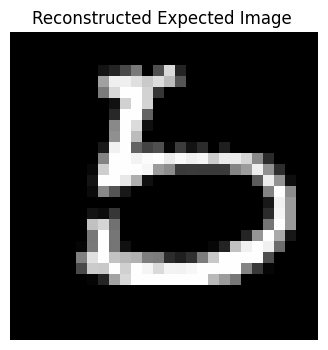

Expected Output   : 4
Predicted Output : 9


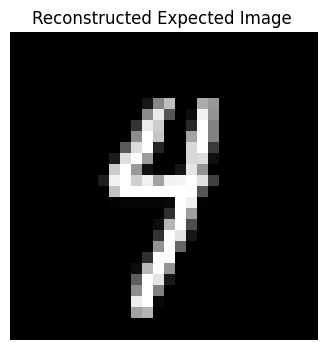

Expected Output   : 6
Predicted Output : 8


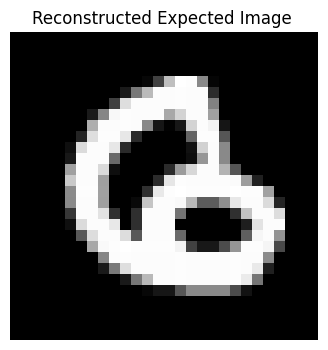

Expected Output   : 4
Predicted Output : 2


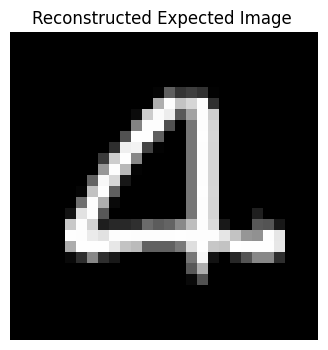

Expected Output   : 7
Predicted Output : 9


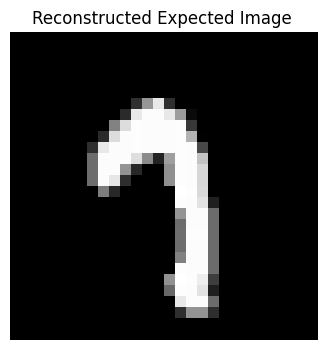

Expected Output   : 8
Predicted Output : 4


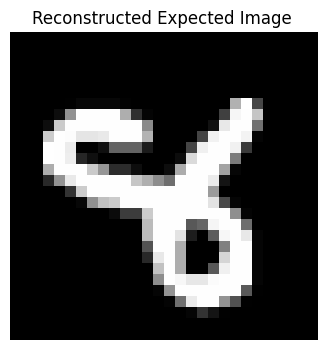

Expected Output   : 2
Predicted Output : 4


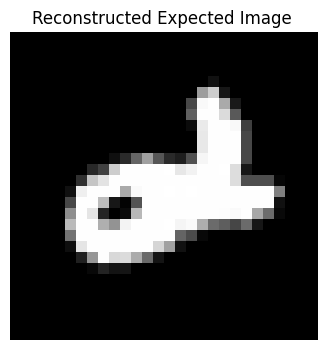

Expected Output   : 3
Predicted Output : 5


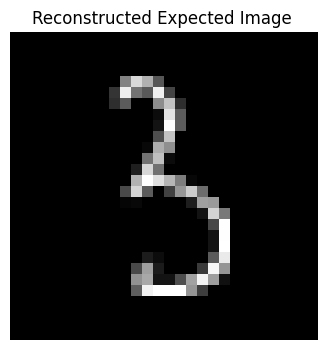

Expected Output   : 8
Predicted Output : 9


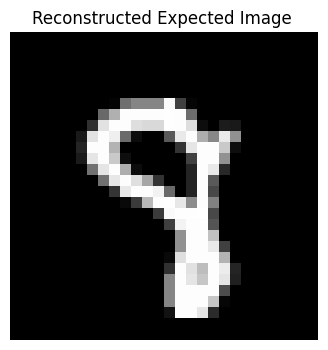

Expected Output   : 7
Predicted Output : 2


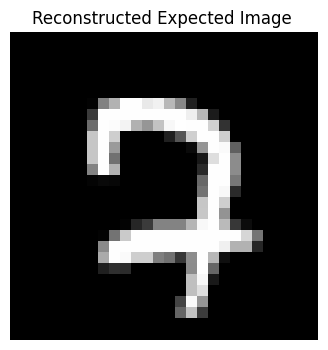

Expected Output   : 8
Predicted Output : 7


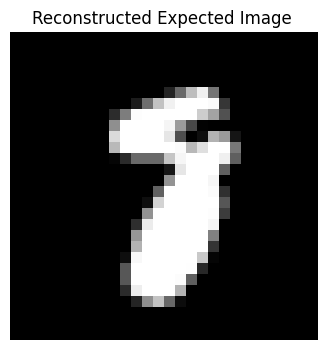

Expected Output   : 9
Predicted Output : 4


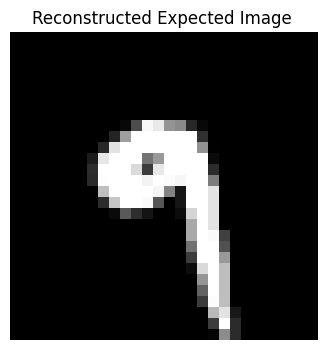

Expected Output   : 3
Predicted Output : 5


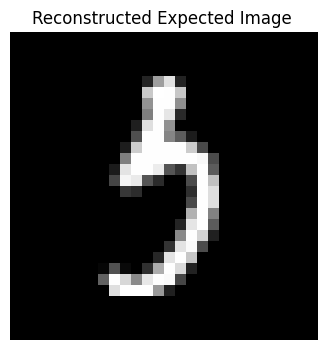

Expected Output   : 4
Predicted Output : 6


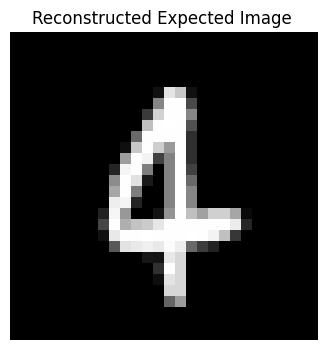

Expected Output   : 9
Predicted Output : 8


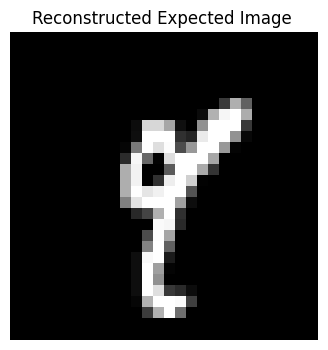

Expected Output   : 3
Predicted Output : 8


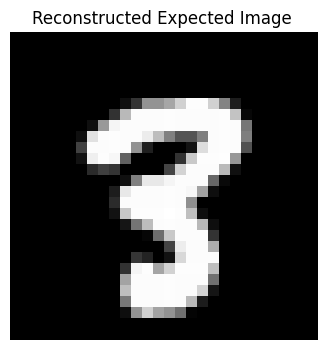

Expected Output   : 8
Predicted Output : 3


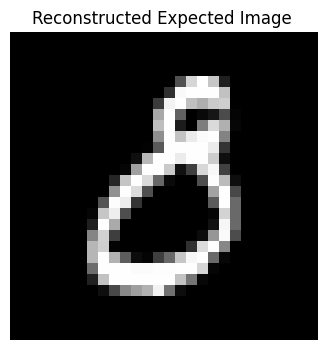

Expected Output   : 3
Predicted Output : 5


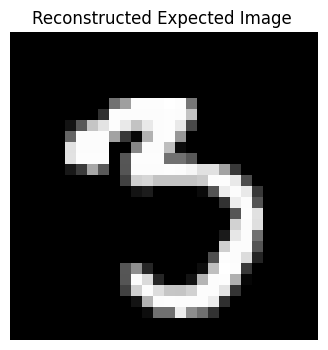

Expected Output   : 6
Predicted Output : 0


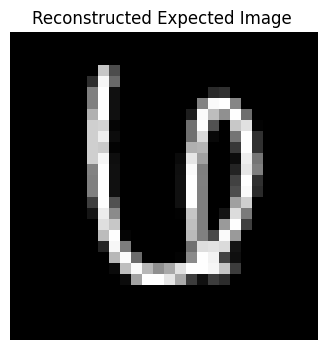

Expected Output   : 9
Predicted Output : 4


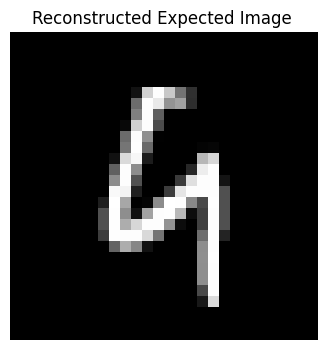

Expected Output   : 7
Predicted Output : 2


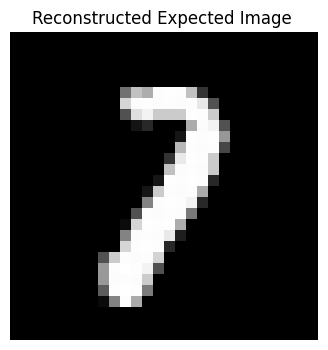

Expected Output   : 4
Predicted Output : 9


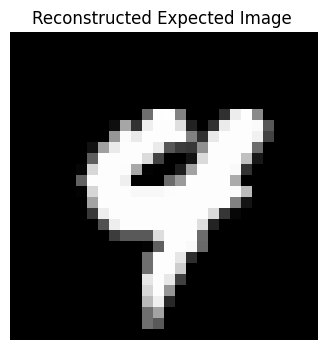

Expected Output   : 8
Predicted Output : 9


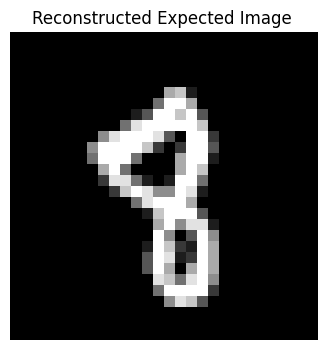

Expected Output   : 2
Predicted Output : 4


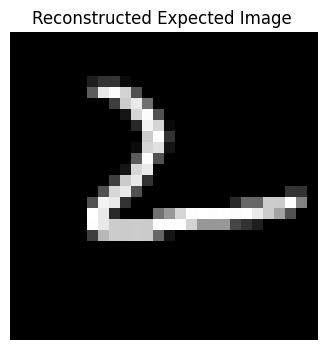

Expected Output   : 8
Predicted Output : 6


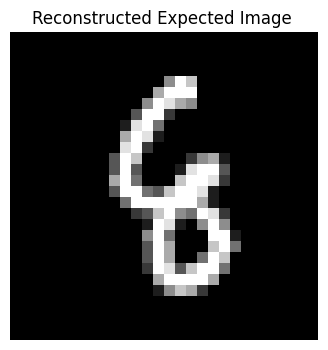

Expected Output   : 0
Predicted Output : 8


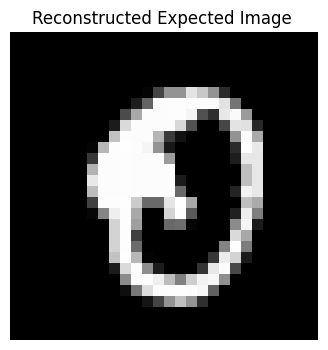

Expected Output   : 7
Predicted Output : 1


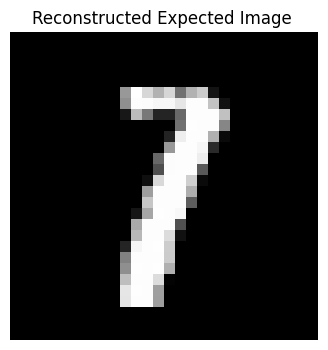

Expected Output   : 4
Predicted Output : 9


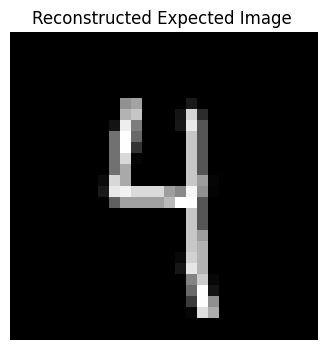

Expected Output   : 4
Predicted Output : 9


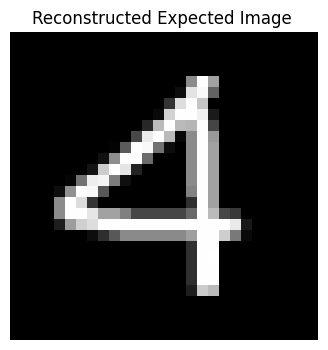

Expected Output   : 5
Predicted Output : 8


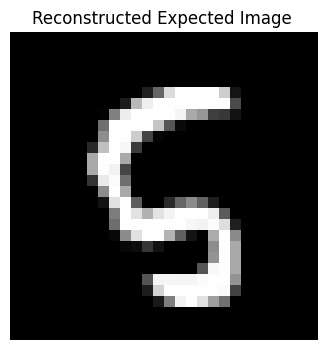

Expected Output   : 2
Predicted Output : 7


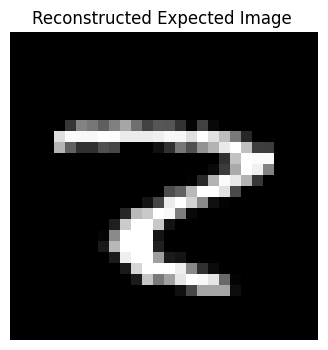

Expected Output   : 2
Predicted Output : 3


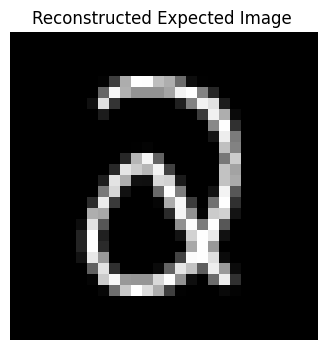

Expected Output   : 8
Predicted Output : 4


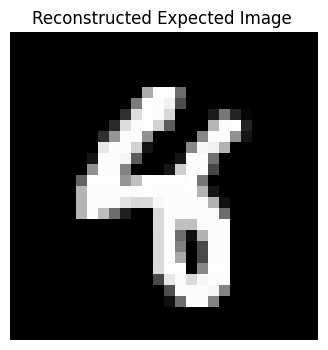

Expected Output   : 7
Predicted Output : 1


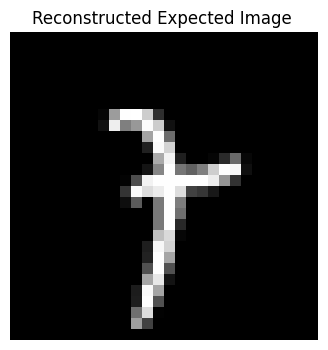

Expected Output   : 8
Predicted Output : 7


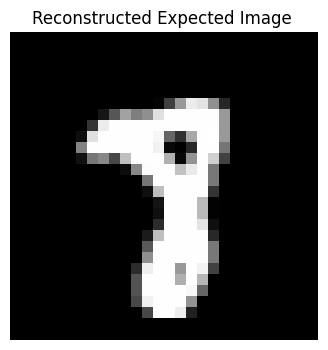

Expected Output   : 3
Predicted Output : 2


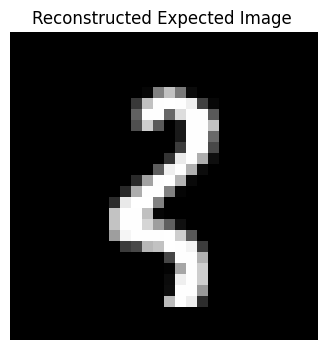

Expected Output   : 3
Predicted Output : 2


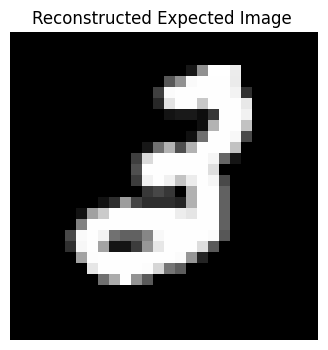

Expected Output   : 3
Predicted Output : 2


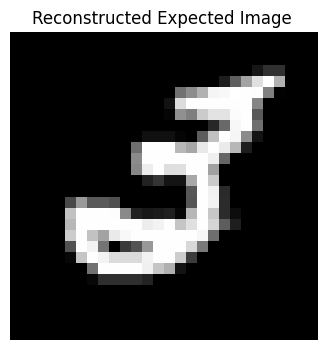

Expected Output   : 9
Predicted Output : 7


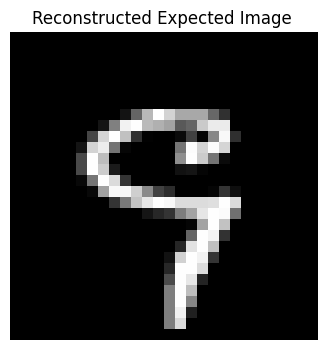

Expected Output   : 1
Predicted Output : 6


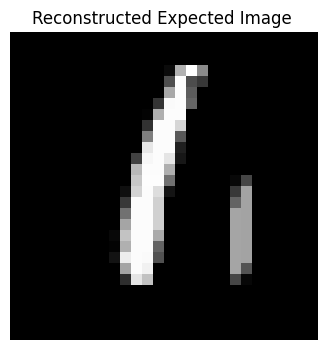

Expected Output   : 1
Predicted Output : 8


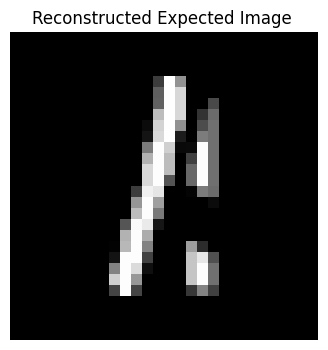

Expected Output   : 7
Predicted Output : 9


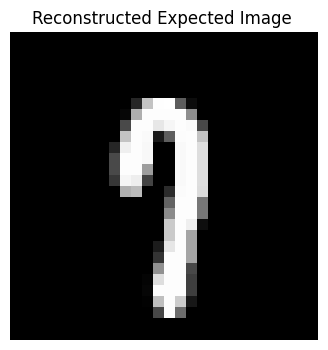

Expected Output   : 8
Predicted Output : 6


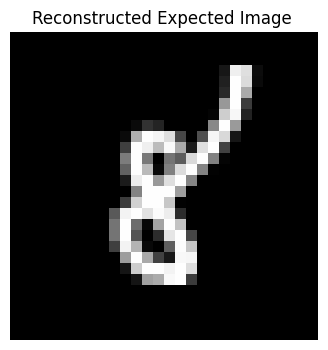

Expected Output   : 7
Predicted Output : 9


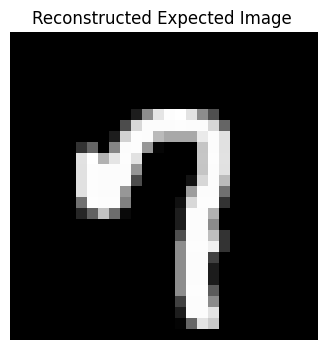

Expected Output   : 1
Predicted Output : 5


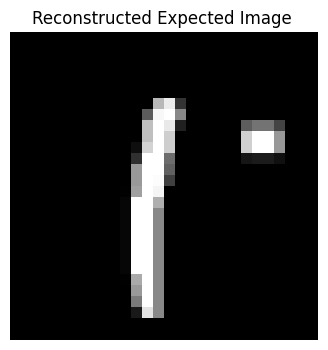

Expected Output   : 0
Predicted Output : 6


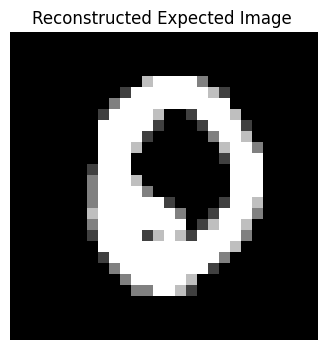

Expected Output   : 7
Predicted Output : 9


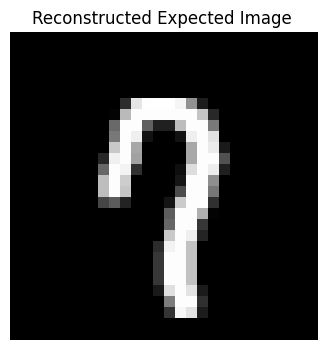

Expected Output   : 3
Predicted Output : 7


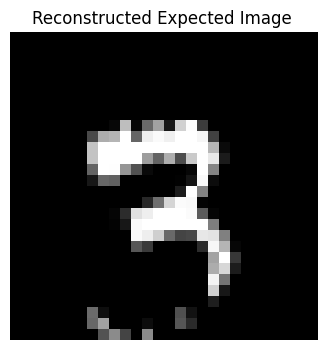

Expected Output   : 0
Predicted Output : 5


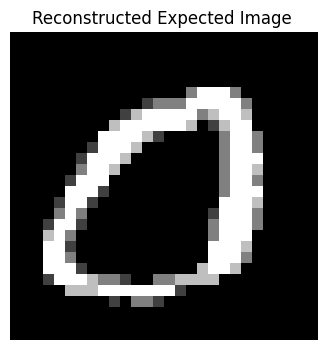

Expected Output   : 8
Predicted Output : 6


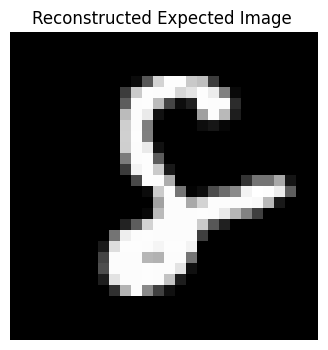

Expected Output   : 6
Predicted Output : 0


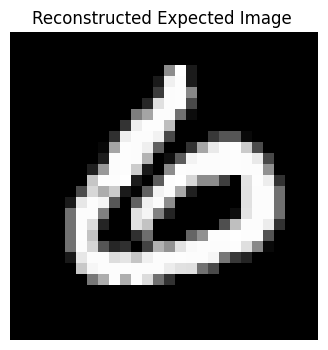

Expected Output   : 7
Predicted Output : 9


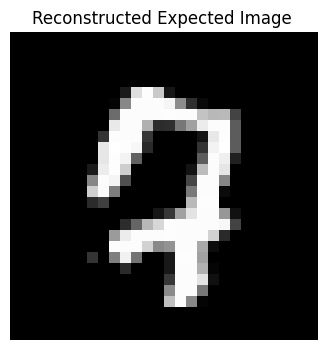

Expected Output   : 4
Predicted Output : 7


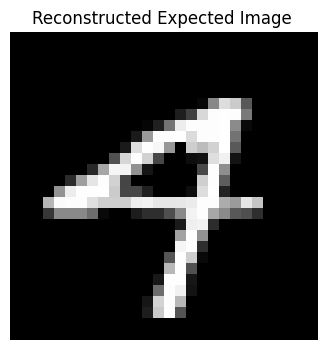

Expected Output   : 7
Predicted Output : 9


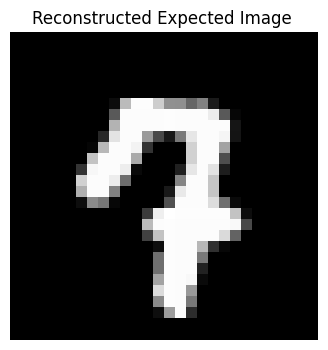

Expected Output   : 7
Predicted Output : 0


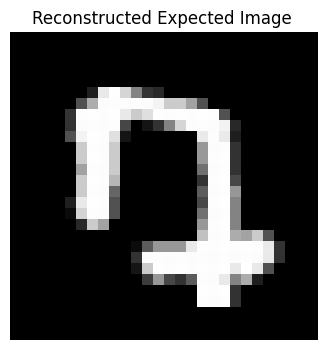

Expected Output   : 4
Predicted Output : 0


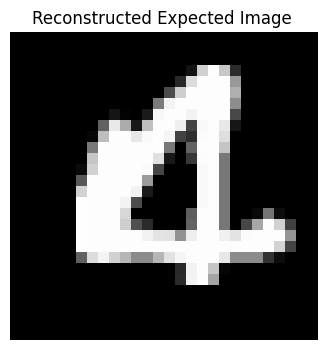

Expected Output   : 5
Predicted Output : 2


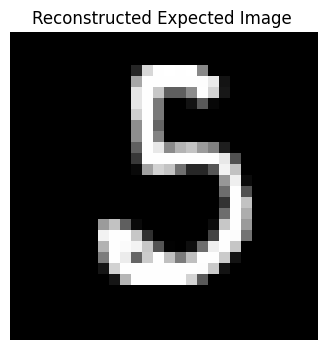

Expected Output   : 5
Predicted Output : 3


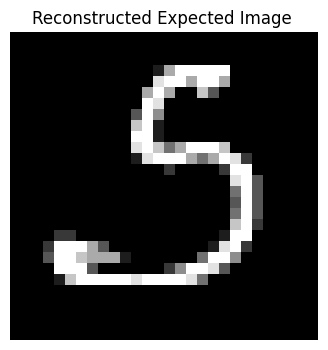

Expected Output   : 5
Predicted Output : 3


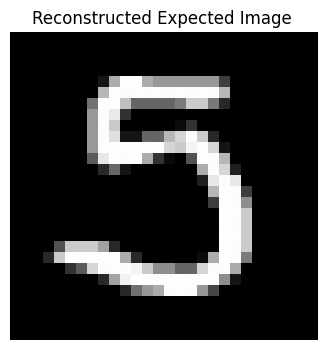

Expected Output   : 4
Predicted Output : 9


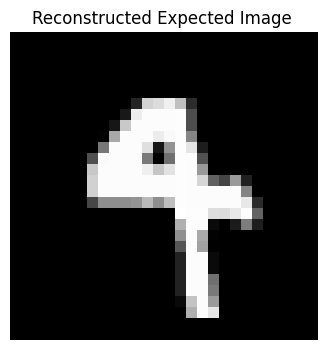

Expected Output   : 5
Predicted Output : 3


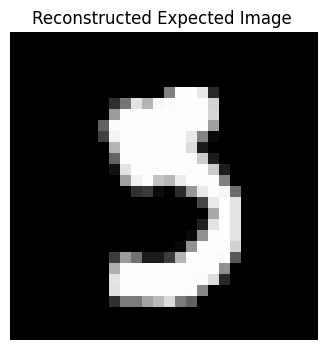

Expected Output   : 3
Predicted Output : 8


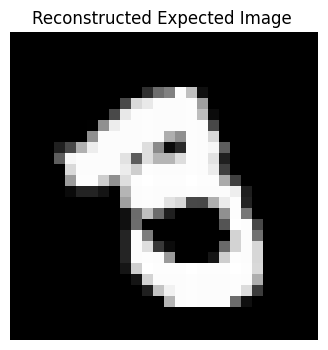

Expected Output   : 3
Predicted Output : 8


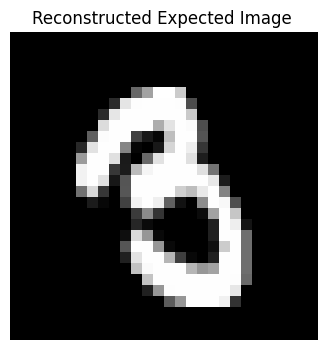

Expected Output   : 4
Predicted Output : 9


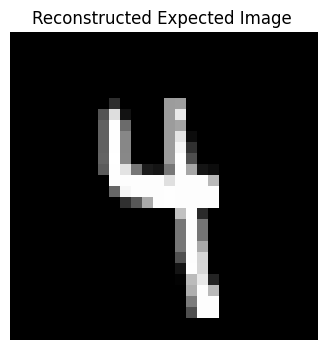

Expected Output   : 5
Predicted Output : 8


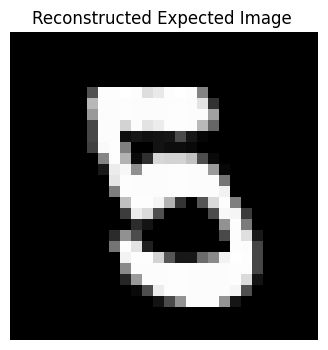

Expected Output   : 5
Predicted Output : 8


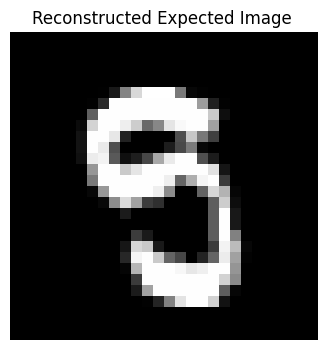

Expected Output   : 3
Predicted Output : 8


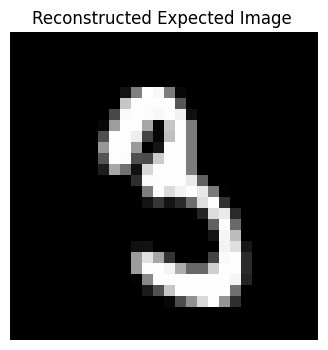

Expected Output   : 3
Predicted Output : 9


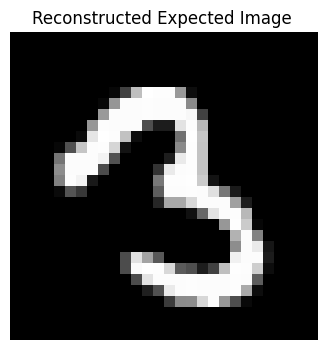

Expected Output   : 3
Predicted Output : 8


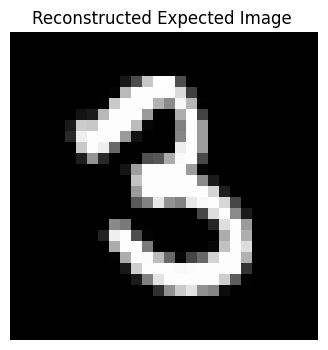

Expected Output   : 3
Predicted Output : 9


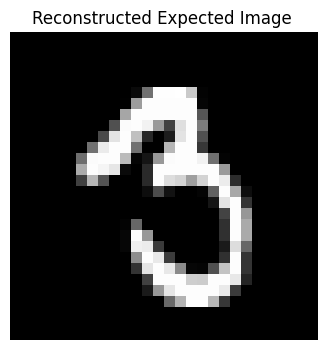

Expected Output   : 3
Predicted Output : 8


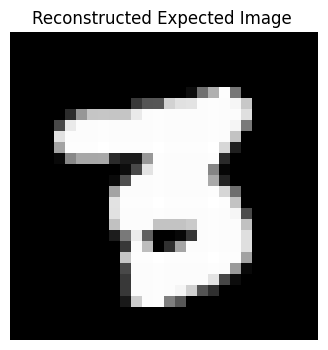

Expected Output   : 9
Predicted Output : 3


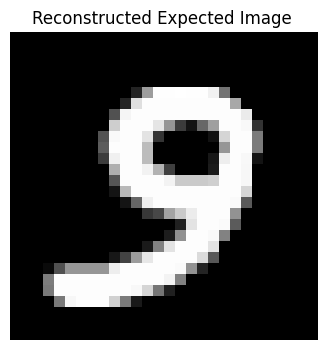

Expected Output   : 9
Predicted Output : 8


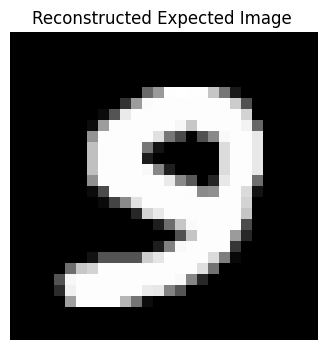

Expected Output   : 9
Predicted Output : 3


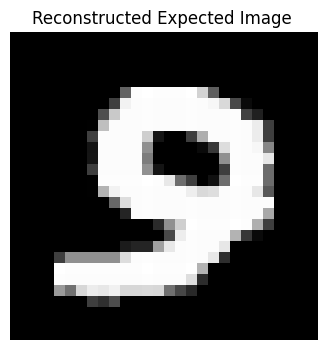

Expected Output   : 9
Predicted Output : 3


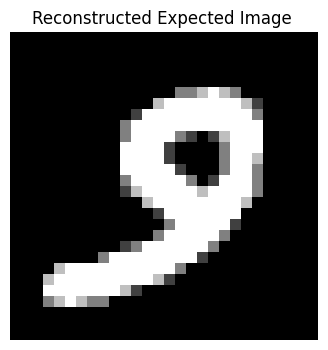

Expected Output   : 9
Predicted Output : 3


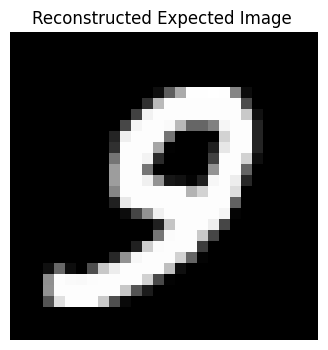

Expected Output   : 9
Predicted Output : 8


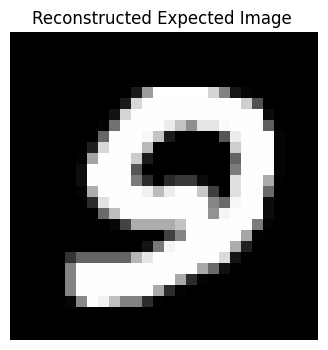

Expected Output   : 5
Predicted Output : 6


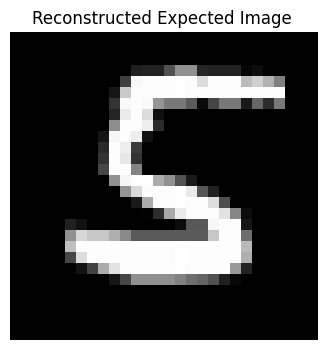

Expected Output   : 5
Predicted Output : 2


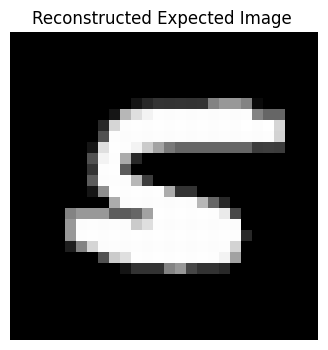

Expected Output   : 0
Predicted Output : 6


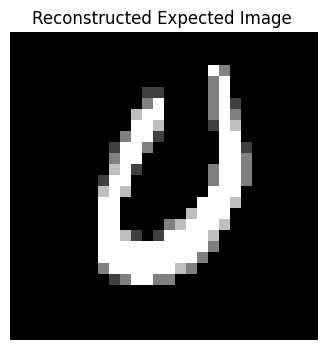

Expected Output   : 3
Predicted Output : 2


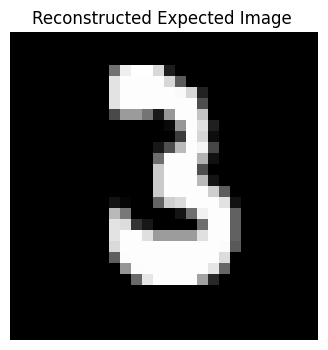

Expected Output   : 6
Predicted Output : 2


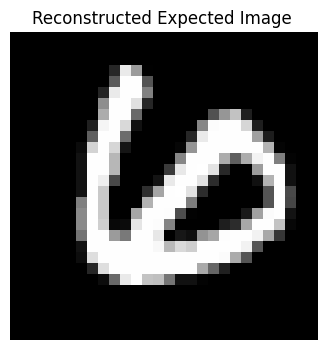

Expected Output   : 0
Predicted Output : 6


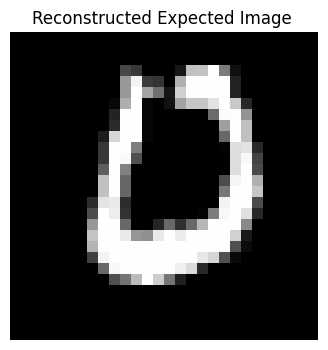

Expected Output   : 9
Predicted Output : 0


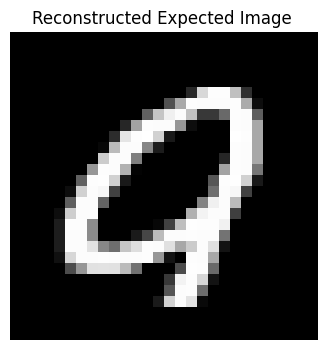

Expected Output   : 8
Predicted Output : 9


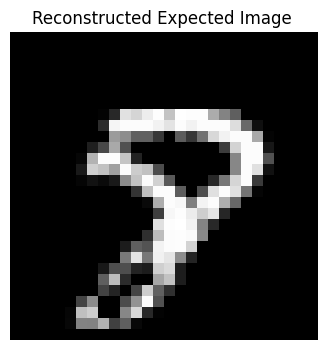

Expected Output   : 6
Predicted Output : 2


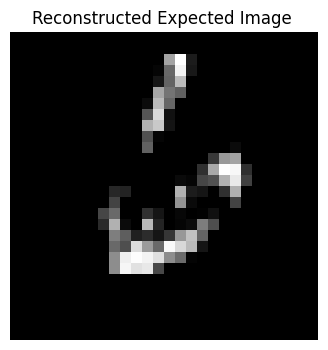

Expected Output   : 9
Predicted Output : 3


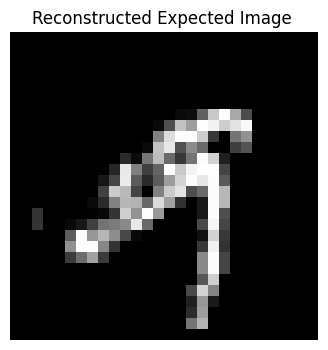

Expected Output   : 3
Predicted Output : 9


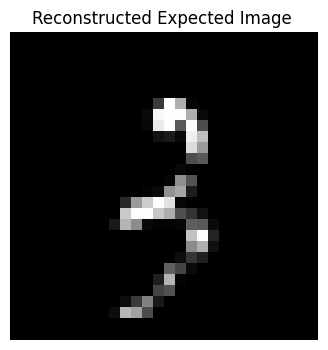

Expected Output   : 3
Predicted Output : 9


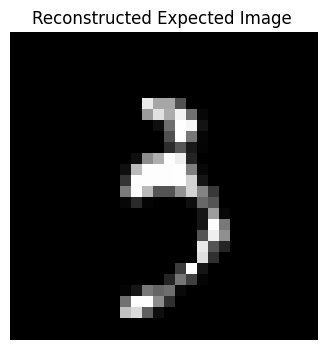

Expected Output   : 9
Predicted Output : 7


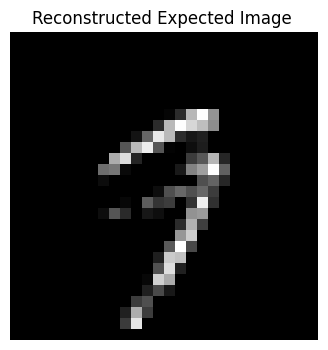

Expected Output   : 0
Predicted Output : 7


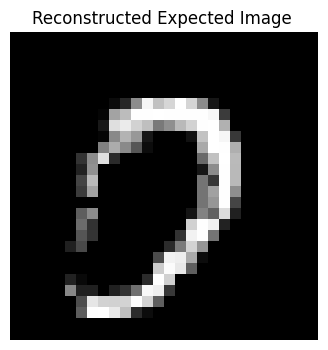

Expected Output   : 5
Predicted Output : 2


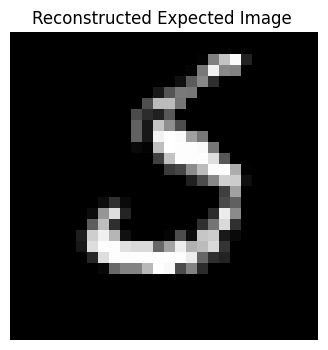

Expected Output   : 8
Predicted Output : 9


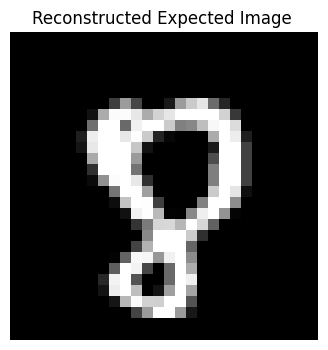

Expected Output   : 8
Predicted Output : 4


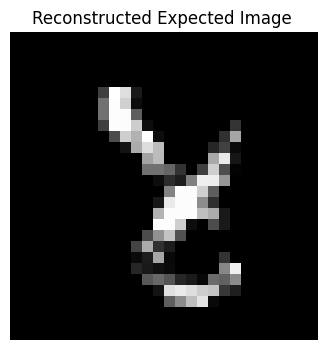

Expected Output   : 8
Predicted Output : 5


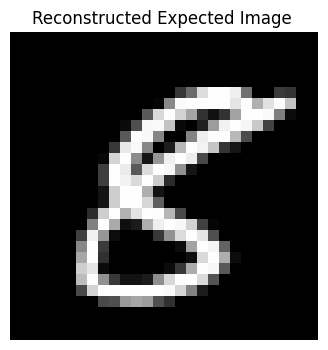

Expected Output   : 0
Predicted Output : 5


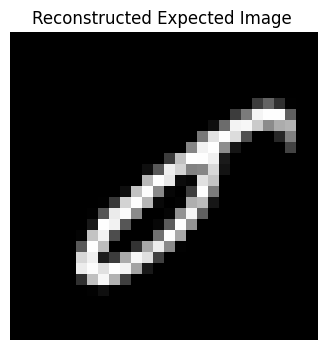

Expected Output   : 2
Predicted Output : 4


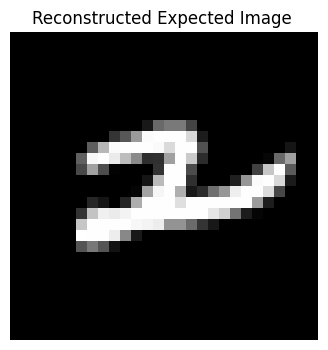

Expected Output   : 9
Predicted Output : 0


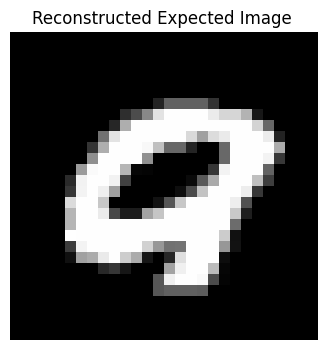

Expected Output   : 2
Predicted Output : 8


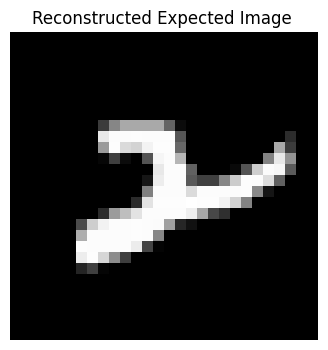

Expected Output   : 5
Predicted Output : 4


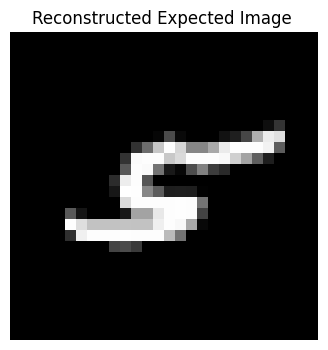

Expected Output   : 8
Predicted Output : 9


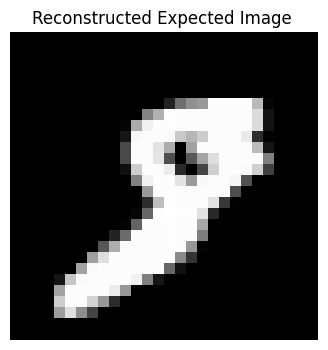

Expected Output   : 8
Predicted Output : 5


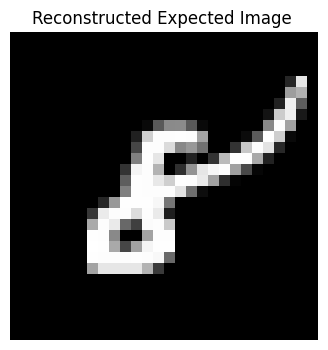

Expected Output   : 1
Predicted Output : 6


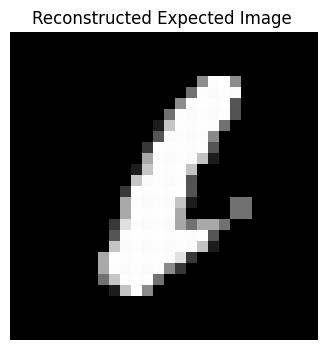

Expected Output   : 2
Predicted Output : 4


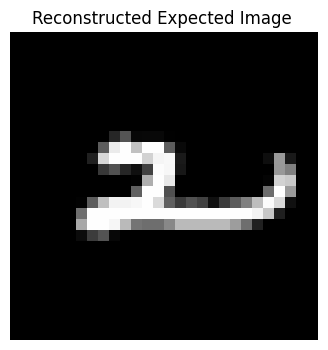

Expected Output   : 6
Predicted Output : 4


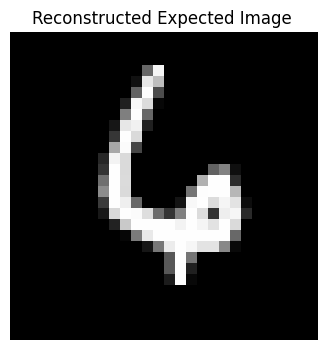

Expected Output   : 6
Predicted Output : 4


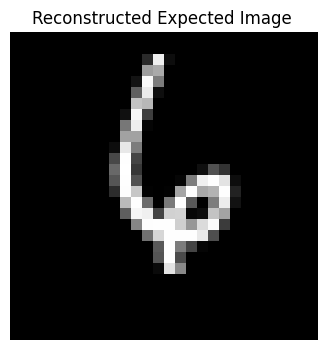

Expected Output   : 8
Predicted Output : 9


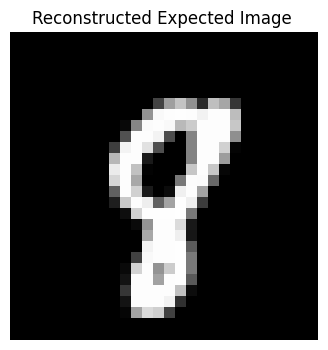

Expected Output   : 3
Predicted Output : 7


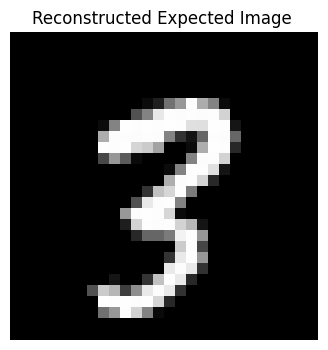

Expected Output   : 8
Predicted Output : 3


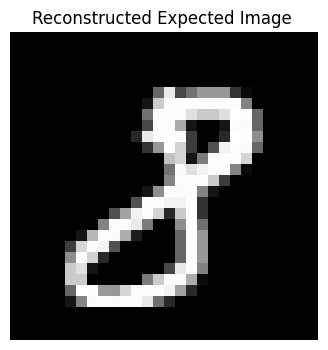

Expected Output   : 4
Predicted Output : 9


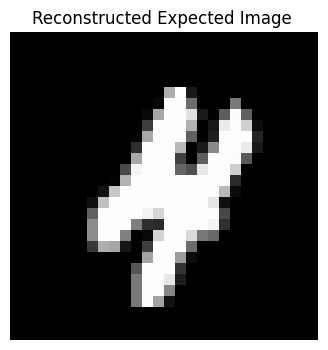

Expected Output   : 7
Predicted Output : 2


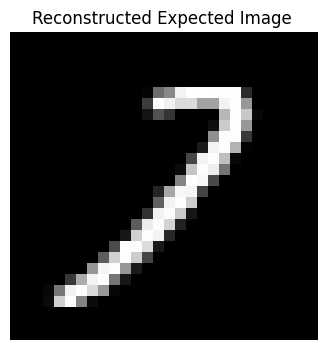

Expected Output   : 4
Predicted Output : 8


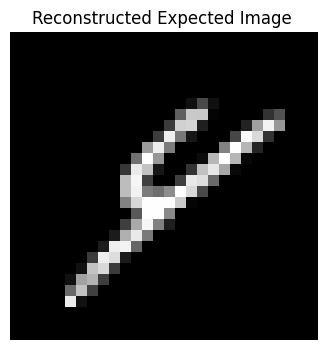

Expected Output   : 5
Predicted Output : 6


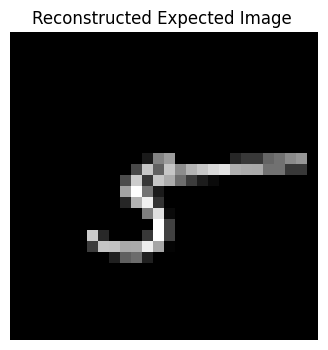

Expected Output   : 5
Predicted Output : 2


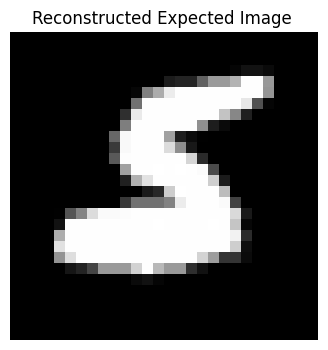

Expected Output   : 3
Predicted Output : 2


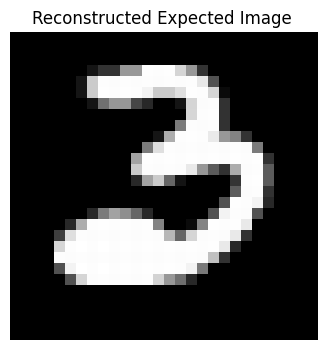

Expected Output   : 1
Predicted Output : 8


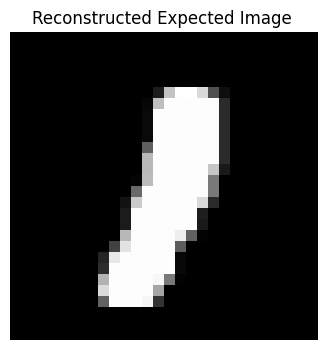

Expected Output   : 3
Predicted Output : 2


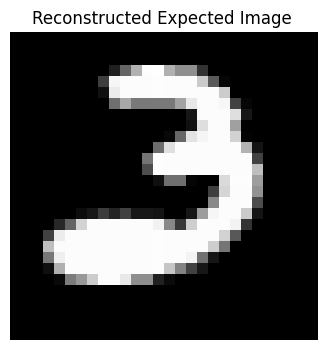

Expected Output   : 1
Predicted Output : 2


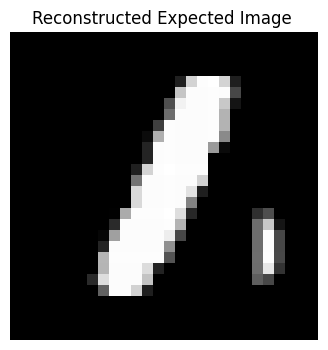

Expected Output   : 1
Predicted Output : 8


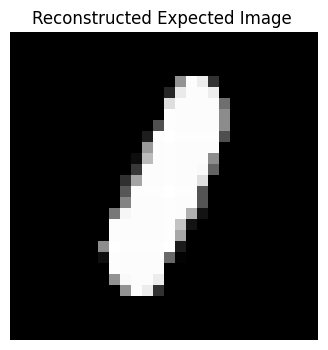

Expected Output   : 1
Predicted Output : 8


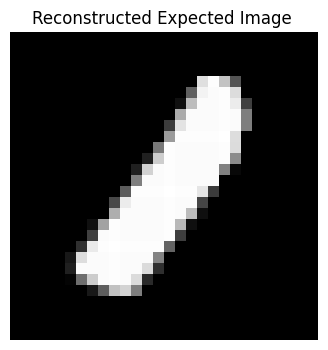

Expected Output   : 1
Predicted Output : 8


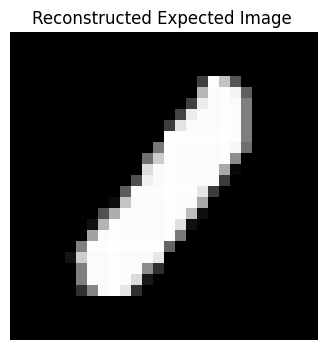

Expected Output   : 3
Predicted Output : 2


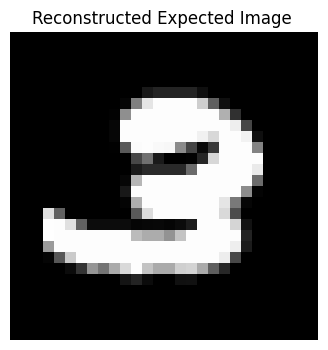

Expected Output   : 2
Predicted Output : 4


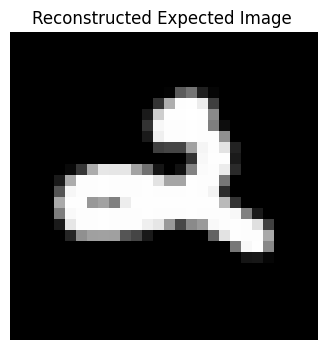

Expected Output   : 1
Predicted Output : 8


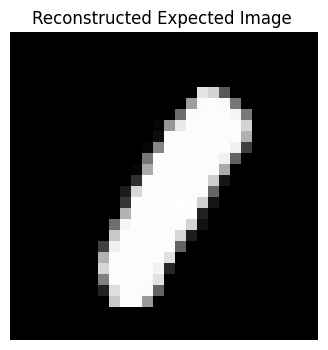

Expected Output   : 7
Predicted Output : 9


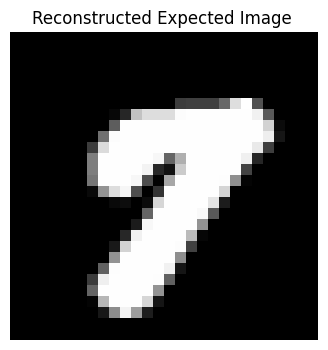

Expected Output   : 1
Predicted Output : 8


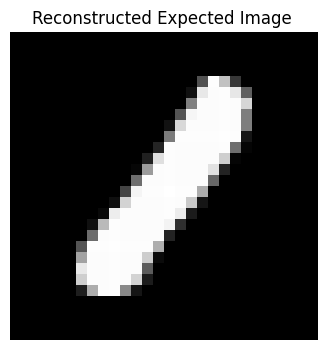

Expected Output   : 1
Predicted Output : 8


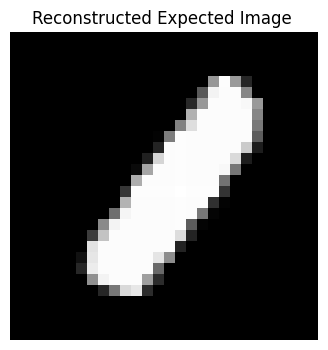

Expected Output   : 1
Predicted Output : 8


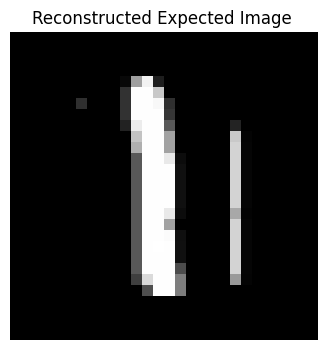

Expected Output   : 5
Predicted Output : 8


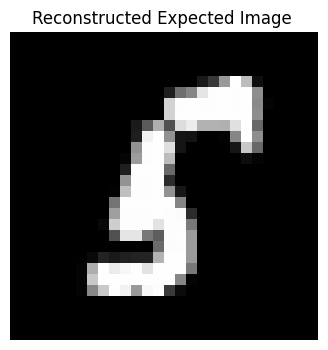

Expected Output   : 5
Predicted Output : 3


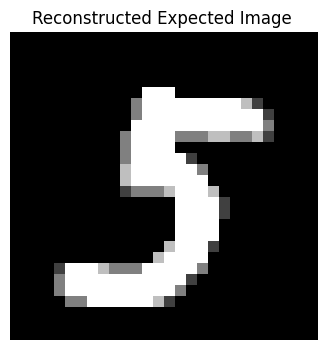

Expected Output   : 2
Predicted Output : 8


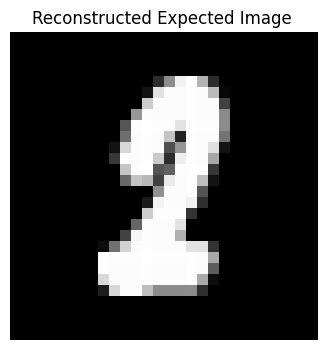

Expected Output   : 4
Predicted Output : 8


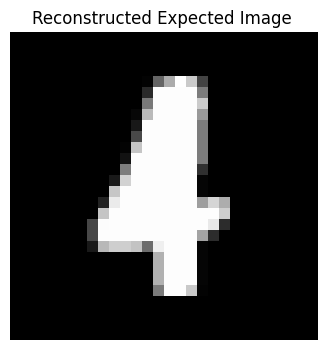

Expected Output   : 8
Predicted Output : 5


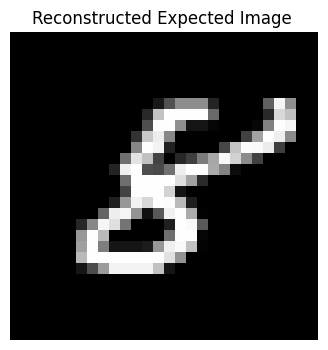

Expected Output   : 3
Predicted Output : 9


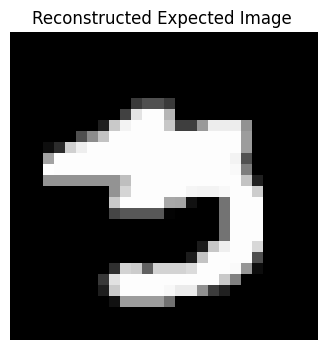

Expected Output   : 3
Predicted Output : 8


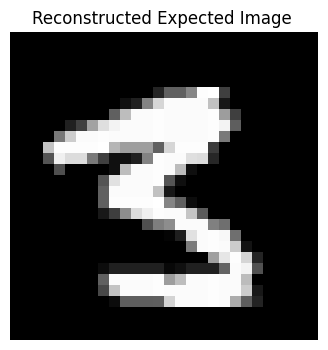

Expected Output   : 0
Predicted Output : 7


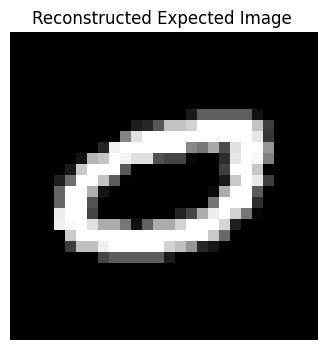

Expected Output   : 3
Predicted Output : 8


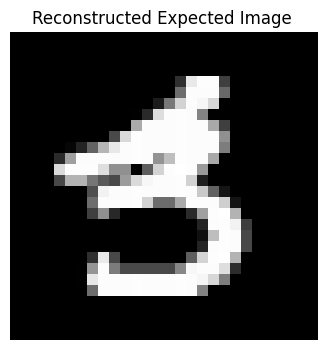

Expected Output   : 0
Predicted Output : 7


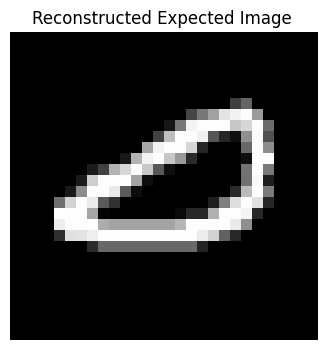

Expected Output   : 8
Predicted Output : 6


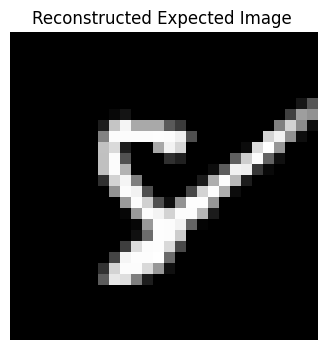

Expected Output   : 9
Predicted Output : 7


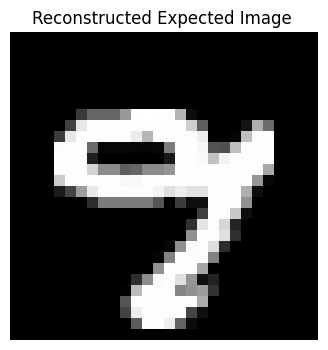

Expected Output   : 8
Predicted Output : 6


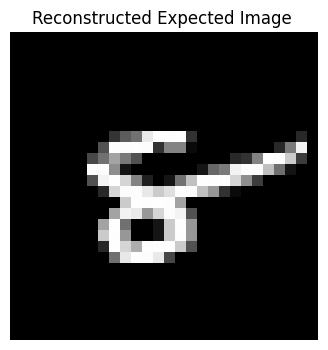

Expected Output   : 4
Predicted Output : 9


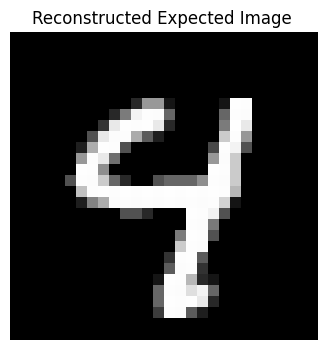

Expected Output   : 8
Predicted Output : 6


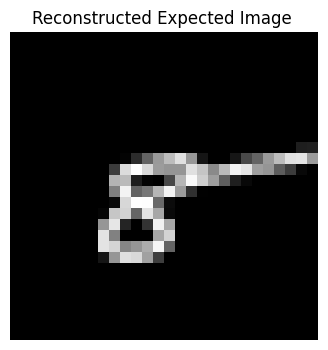

Expected Output   : 4
Predicted Output : 9


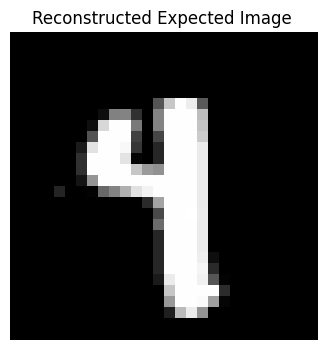

Expected Output   : 8
Predicted Output : 6


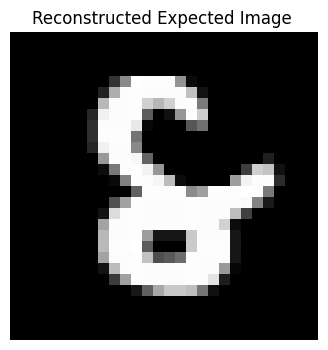

Expected Output   : 7
Predicted Output : 2


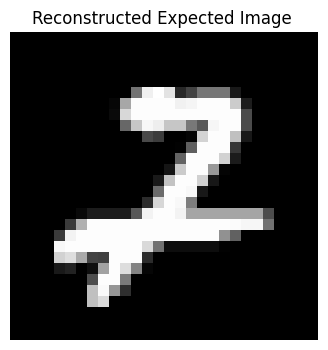

Expected Output   : 7
Predicted Output : 2


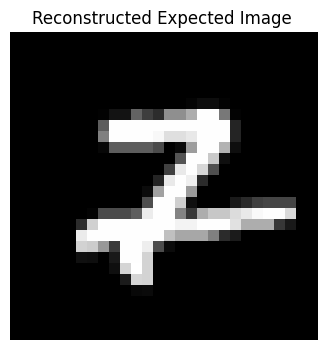

Expected Output   : 0
Predicted Output : 5


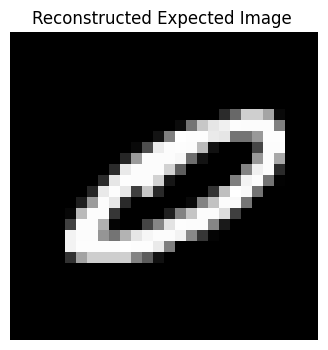

Expected Output   : 7
Predicted Output : 2


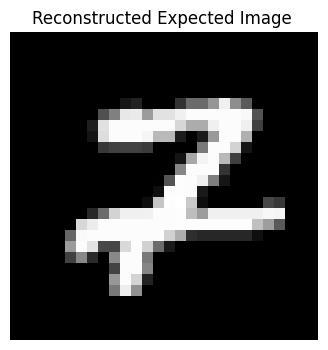

Expected Output   : 7
Predicted Output : 2


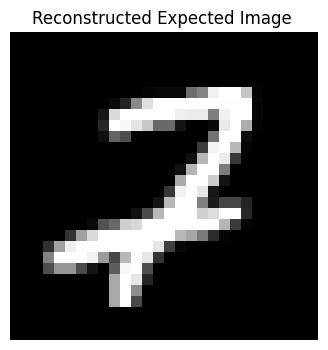

Expected Output   : 7
Predicted Output : 2


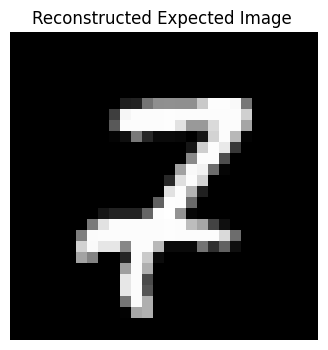

Expected Output   : 1
Predicted Output : 8


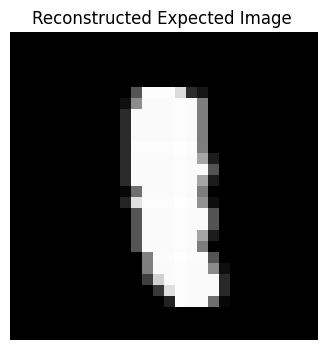

Expected Output   : 4
Predicted Output : 9


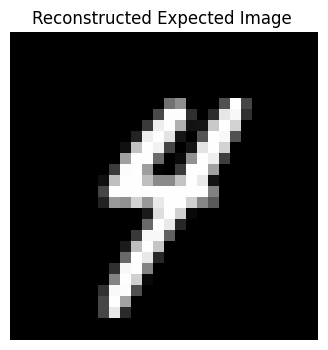

Expected Output   : 8
Predicted Output : 5


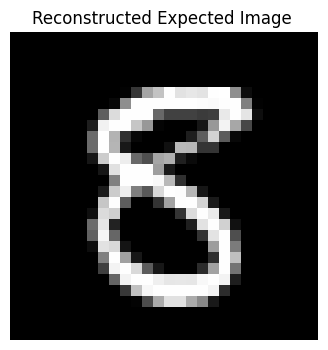

Expected Output   : 3
Predicted Output : 2


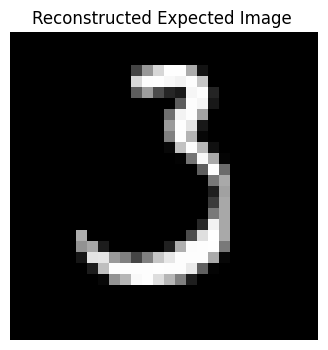

Expected Output   : 5
Predicted Output : 3


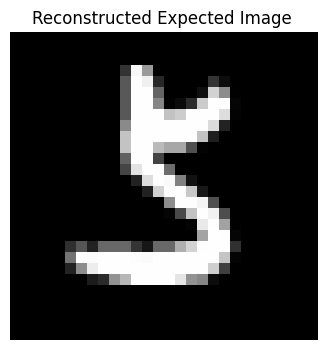

Expected Output   : 5
Predicted Output : 3


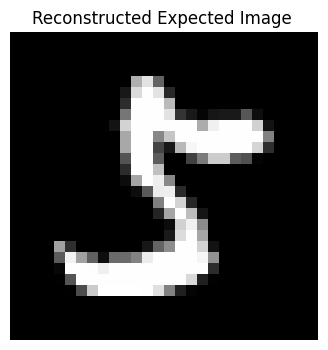

Expected Output   : 4
Predicted Output : 9


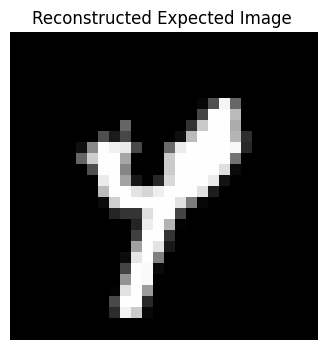

Expected Output   : 9
Predicted Output : 4


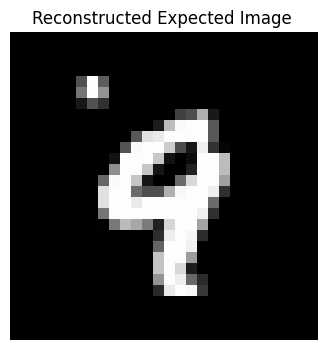

Expected Output   : 3
Predicted Output : 8


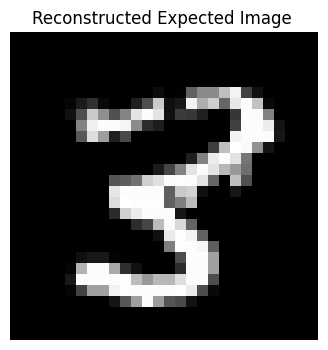

Expected Output   : 0
Predicted Output : 3


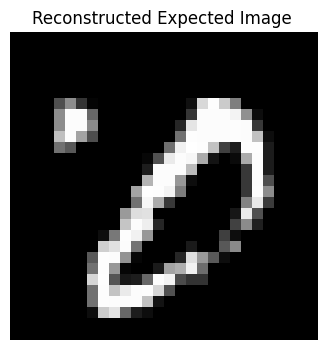

Expected Output   : 9
Predicted Output : 7


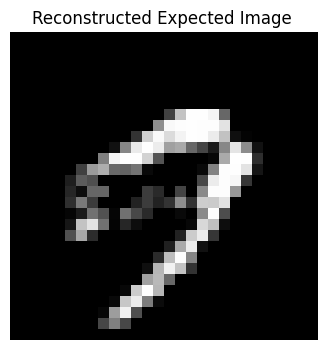

Expected Output   : 1
Predicted Output : 7


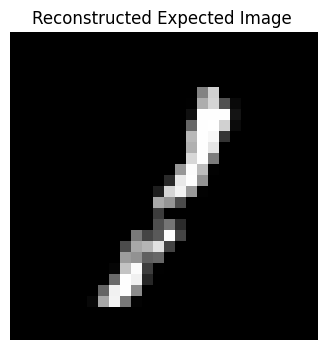

Expected Output   : 1
Predicted Output : 7


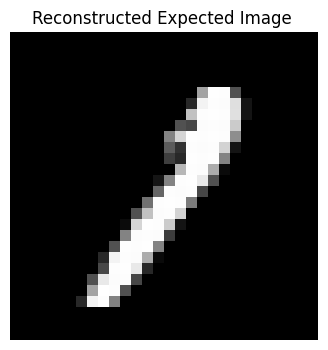

Expected Output   : 2
Predicted Output : 7


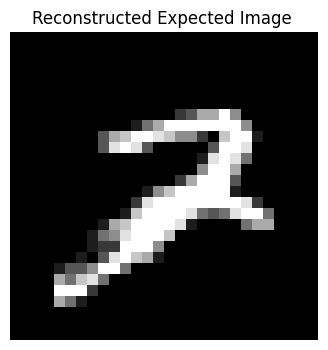

Expected Output   : 6
Predicted Output : 5


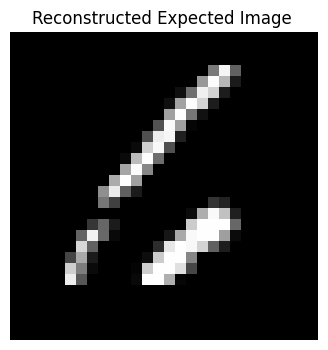

Expected Output   : 8
Predicted Output : 5


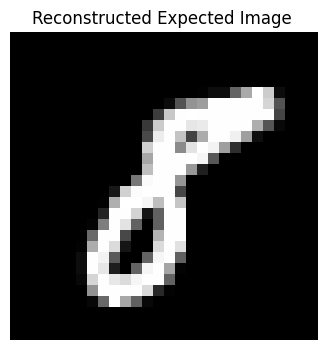

Expected Output   : 5
Predicted Output : 0


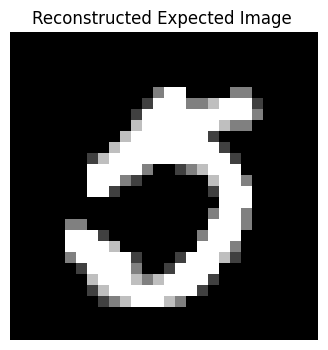

Expected Output   : 5
Predicted Output : 6


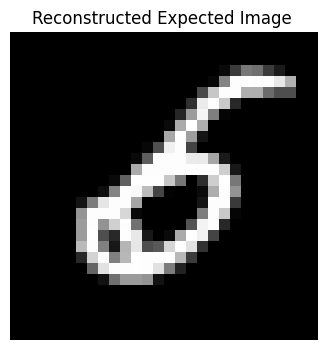

Expected Output   : 4
Predicted Output : 6


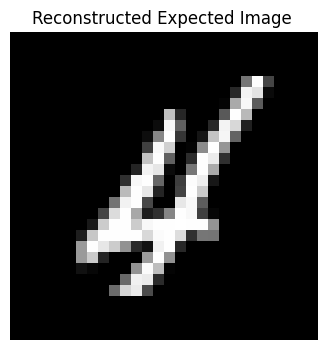

Expected Output   : 8
Predicted Output : 1


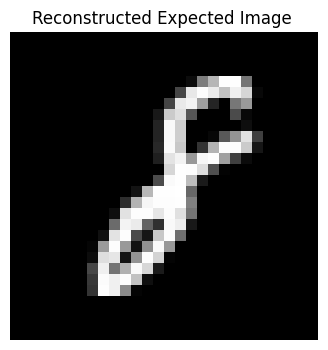

Expected Output   : 4
Predicted Output : 2


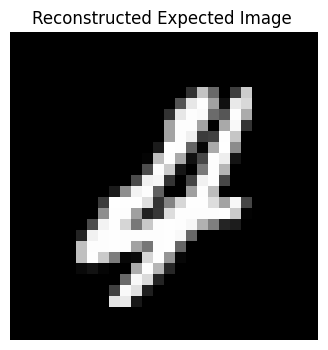

Expected Output   : 4
Predicted Output : 9


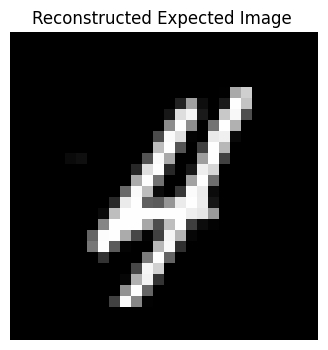

Expected Output   : 2
Predicted Output : 0


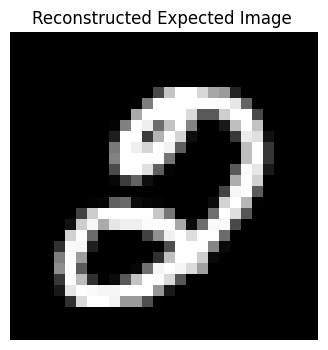

Expected Output   : 5
Predicted Output : 0


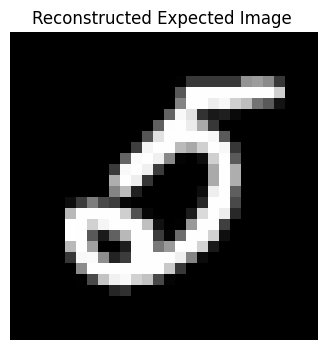

Expected Output   : 2
Predicted Output : 0


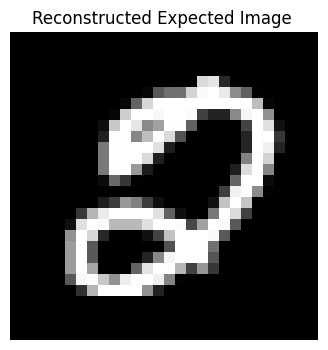

Expected Output   : 4
Predicted Output : 9


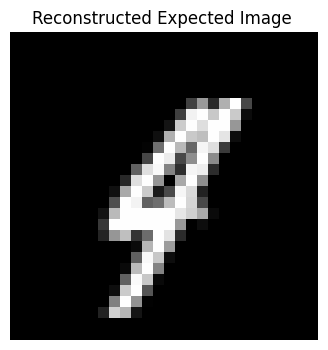

Expected Output   : 9
Predicted Output : 4


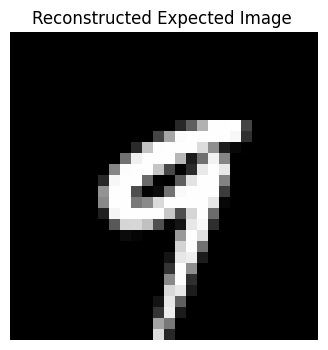

Expected Output   : 2
Predicted Output : 7


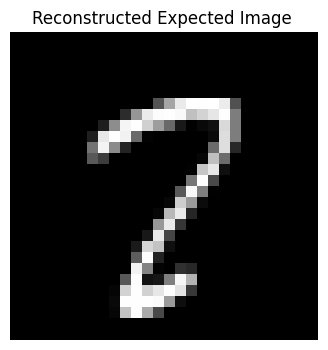

Expected Output   : 6
Predicted Output : 8


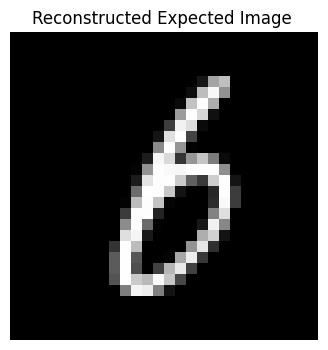

Expected Output   : 6
Predicted Output : 0


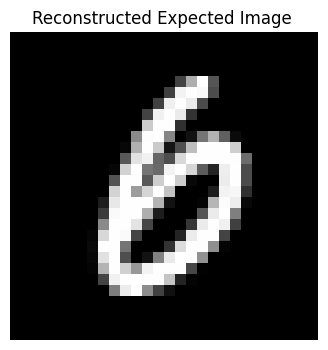

Expected Output   : 9
Predicted Output : 4


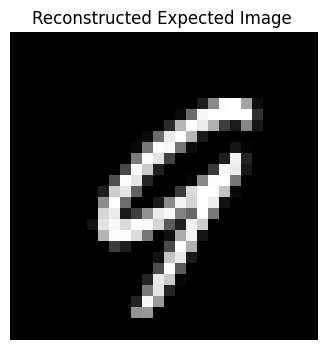

Expected Output   : 8
Predicted Output : 5


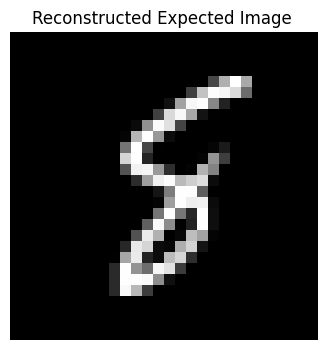

Expected Output   : 3
Predicted Output : 7


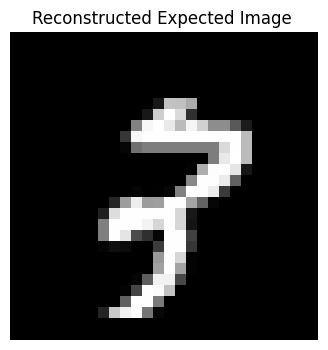

Expected Output   : 3
Predicted Output : 5


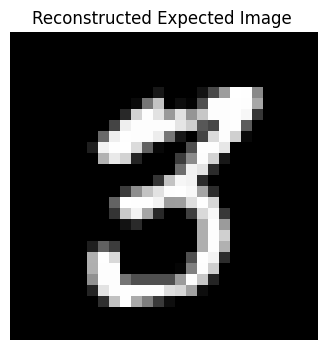

Expected Output   : 3
Predicted Output : 9


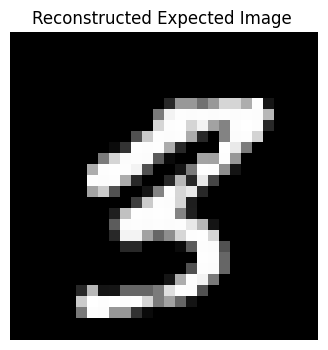

Expected Output   : 3
Predicted Output : 2


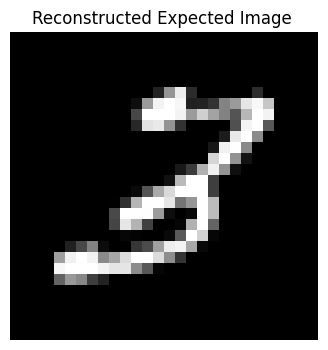

Expected Output   : 5
Predicted Output : 6


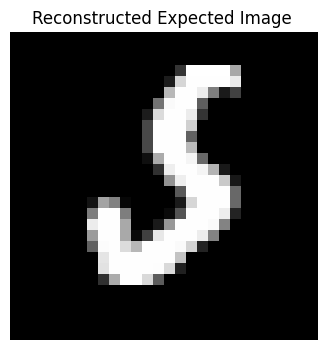

In [44]:
for m in range(len(a)):
  c=a[m]
  not_detected= test.iloc[c]
  print('Expected Output   :',real_out[m] )
  print('Predicted Output :',predicted_out[m])
  no_detect_img = np.array(not_detected[1:]).reshape(28, 28)
  plt.figure(figsize=(4, 4))
  plt.imshow(no_detect_img, cmap='gray')
  plt.axis('off')
  plt.title('Reconstructed Expected Image ')
  plt.show()